In [1]:
import re

import polars as pl

In [2]:
files = [
    # "../output/exp044a/run3/submission_model-val_r2=0.7551.csv",  # light_cnn_v2
    # "../output/exp046a/single/submission_model-val_r2=0.7546.csv",  # light_cnn_v2
    # "../output/exp047a/run1/submission_model-val_r2=0.7513.csv",  # transformer
    # "../output/exp049a/run0/submission_model-val_r2=0.7632.csv",  # light_cnn_v2
    # "../output/exp052a/run0/submission_model-val_r2=0.7630.csv",  # light_cnn_v2
    
    "../output/exp059a/run3/submission_model-val_r2=0.7653.csv",  # light_cnn_v2 with se_block
    # "../output/submissions/exp043b_submission_model-val_r20.7605.csv",    # unet with se_block
    "../output/exp076a/run0/submission_model-val_r2=0.7677.csv",  # light_cnn_v2 with se_block
    
    # "../output/exp092a/run1/submission_model-val_r2=0.7618.csv",  # light_cnn_v2 with se_block, standard + exp scaler
    "../output/exp095a/run0/submission_model-val_r2=0.7646.csv", # light_cnn_v2 with se_block, min-max scaler
    "../output/exp103a/run0/submission_model-val_r2=0.7656.csv",
    "../output/exp110a/run0/submission_model-val_r2=0.7654.csv",
    
    "../output/exp067a/run0/submission_model-val_r2=0.7661.csv",  # light_cnn_v2 with se_block
    "../output/exp068a/run0/submission_model-val_r2=0.7670.csv",  # light_cnn_v2 with se_block
    "../output/exp068a/run1/submission_model-val_r2=0.7661.csv",  # light_cnn_v2 with se_block
    "../output/exp092a/run0/submission_model-val_r2=0.7673.csv",  # light_cnn_v2 with se_block, standard scaler
    "../output/exp097a/run0/submission_model-val_r2=0.7685.csv", # light_cnn_v2 with se_block, standard scaler
    "../output/exp121a/run0/submission_model-val_r2=0.7688.csv",

    # "../output/exp135a/run0/submission_model-val_r2=0.7662.csv",
    "../output/exp135a/run1/submission_model-val_r2=0.7704.csv",
    # "../output/exp136a/run0/submission_model-val_r2=0.7693.csv",
    # "../output/exp136a/run1/submission_model-val_r2=0.7683.csv",
    "../output/exp141a/run0/submission_model-val_r2=0.7682.csv",
    "../output/exp142a/run0/submission_model-val_r2=0.7718.csv",
]
tags = [
    re.findall(r"exp[\d]{3}[abc]", filename)[0]
    for filename in files
]
tags

['exp059a',
 'exp076a',
 'exp095a',
 'exp103a',
 'exp110a',
 'exp067a',
 'exp068a',
 'exp068a',
 'exp092a',
 'exp097a',
 'exp121a',
 'exp135a',
 'exp141a',
 'exp142a']

In [3]:
dfs = []
for filename in files:
    dfs.append(
        pl.read_csv(filename)
    )
raw_df = pl.concat(dfs)

In [4]:
df = (
    raw_df
    .group_by("sample_id")
    .agg(pl.all().drop_nulls().mean())
)

In [5]:
sub_df = pl.read_csv("../data/sample_submission.csv", columns=["sample_id"])
sub_df = sub_df.join(df, on="sample_id", how="left")

In [6]:
input_df = pl.read_csv("../data/test.csv", columns=["state_q0002_27"])
sub_df = sub_df.with_columns(
    (-input_df["state_q0002_27"] / 1200).alias("ptend_q0002_27")
)

In [7]:
filename = "_".join(tags) + ".csv"
sub_df.write_csv(f"../output/ensemble/{filename}")

In [8]:
filename

'exp059a_exp076a_exp095a_exp103a_exp110a_exp067a_exp068a_exp068a_exp092a_exp097a_exp121a_exp135a_exp141a_exp142a.csv'

## 各サブの相関を見る

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

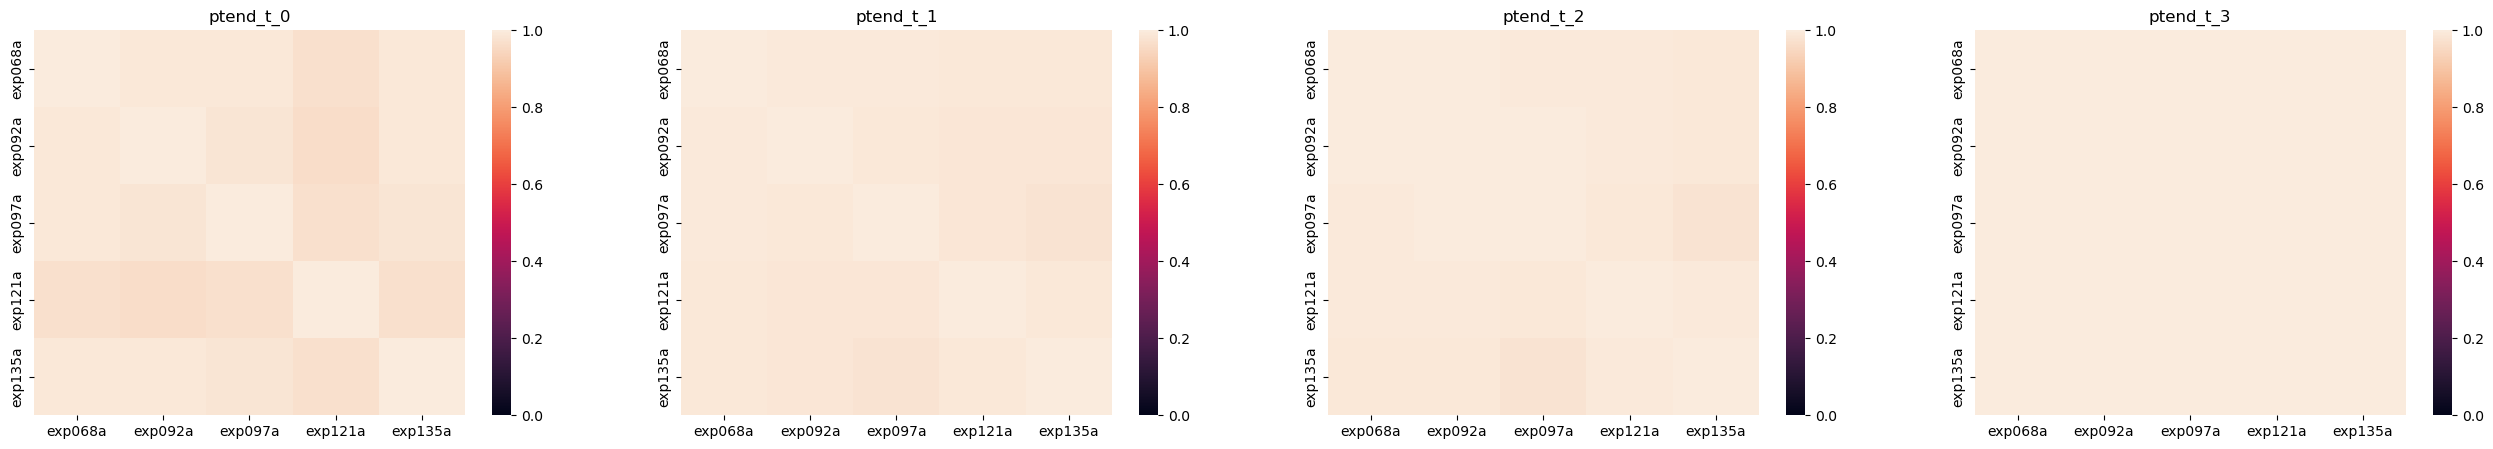

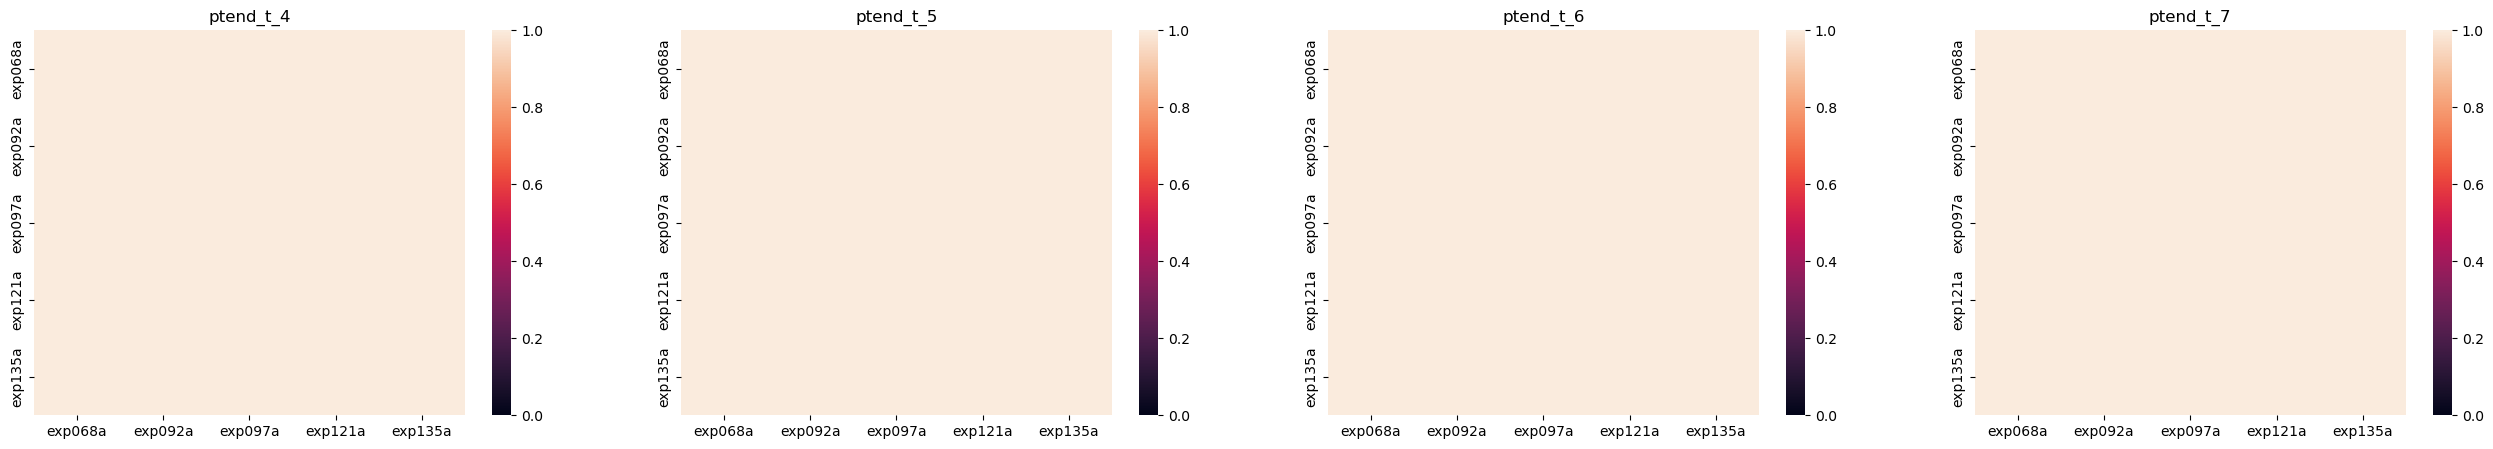

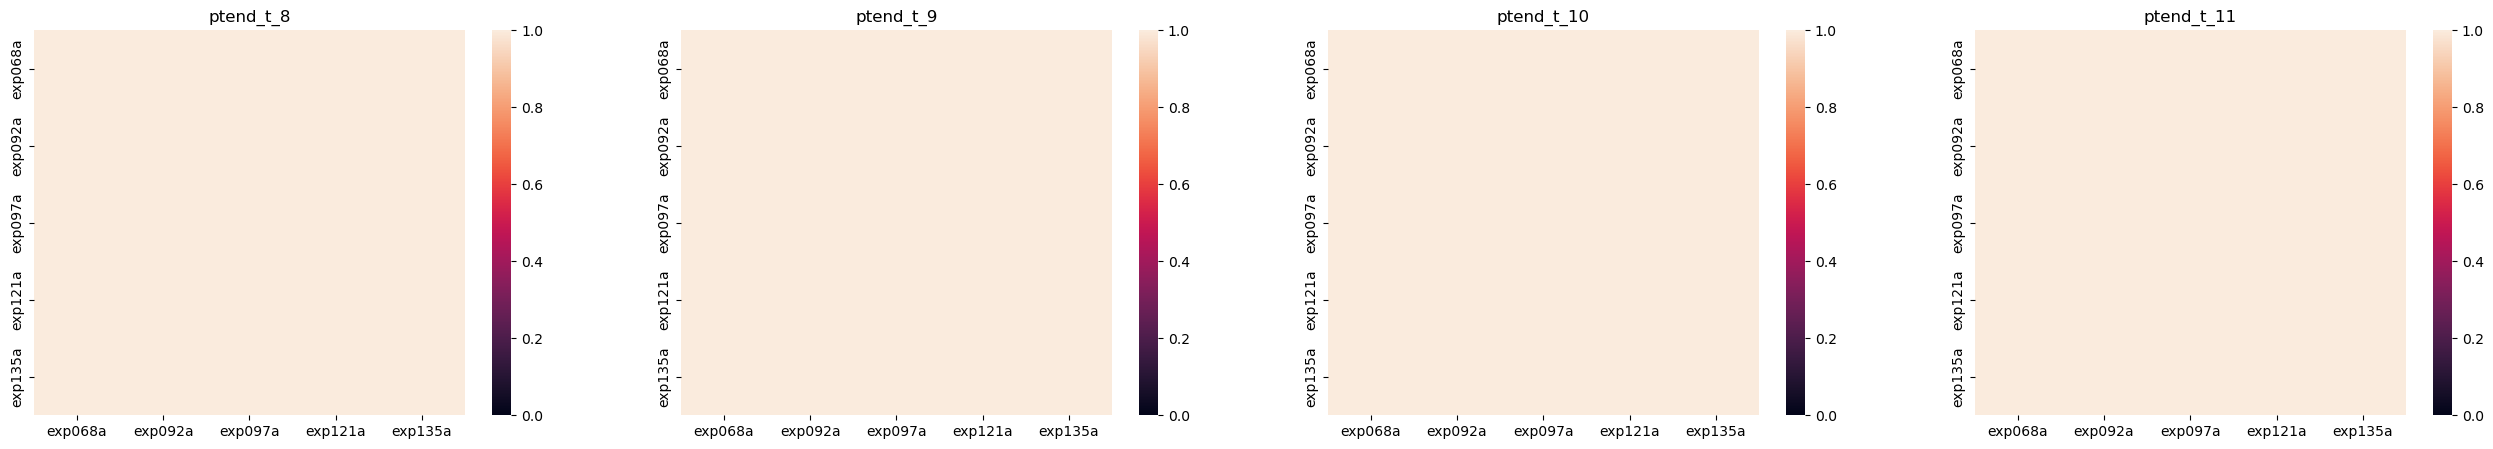

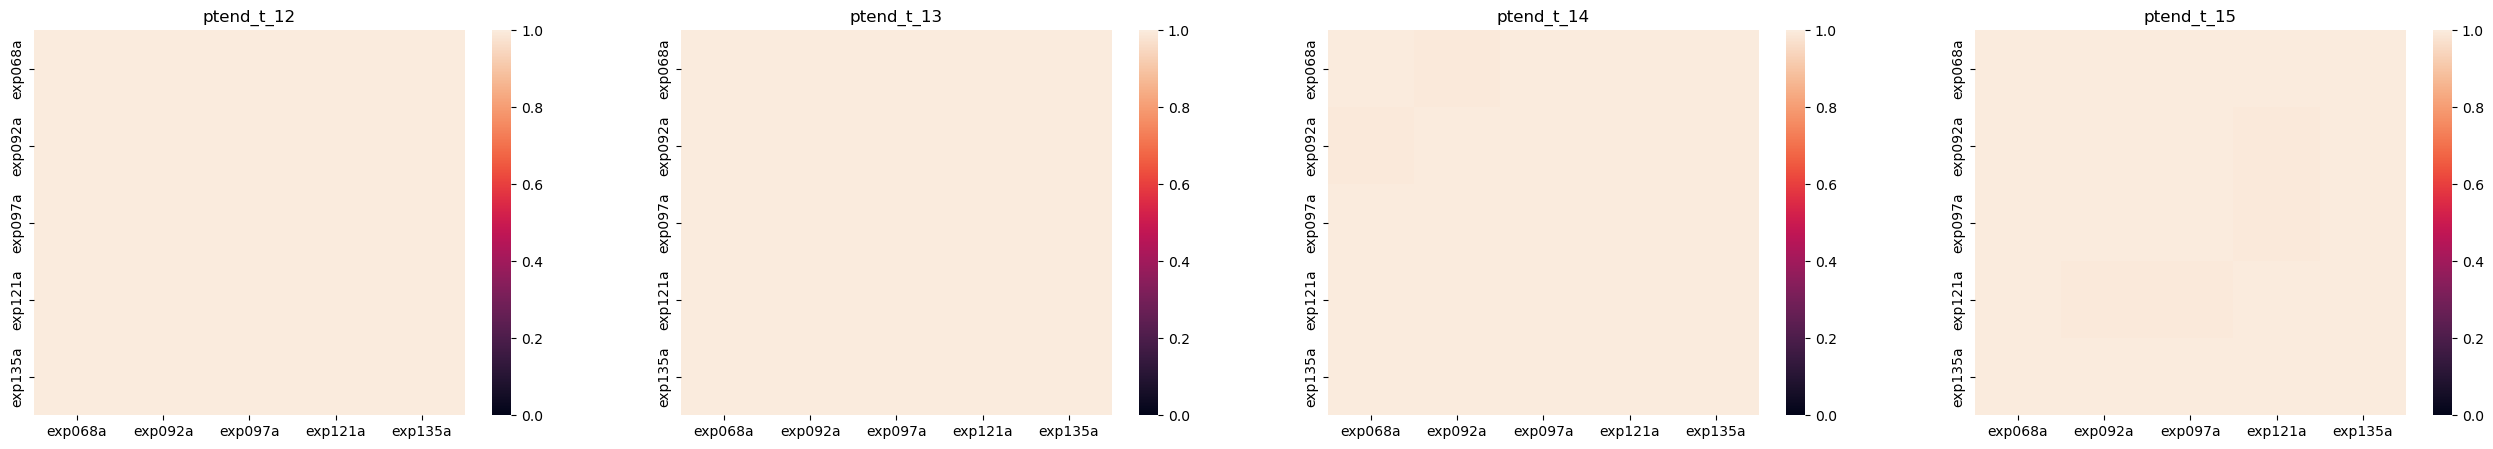

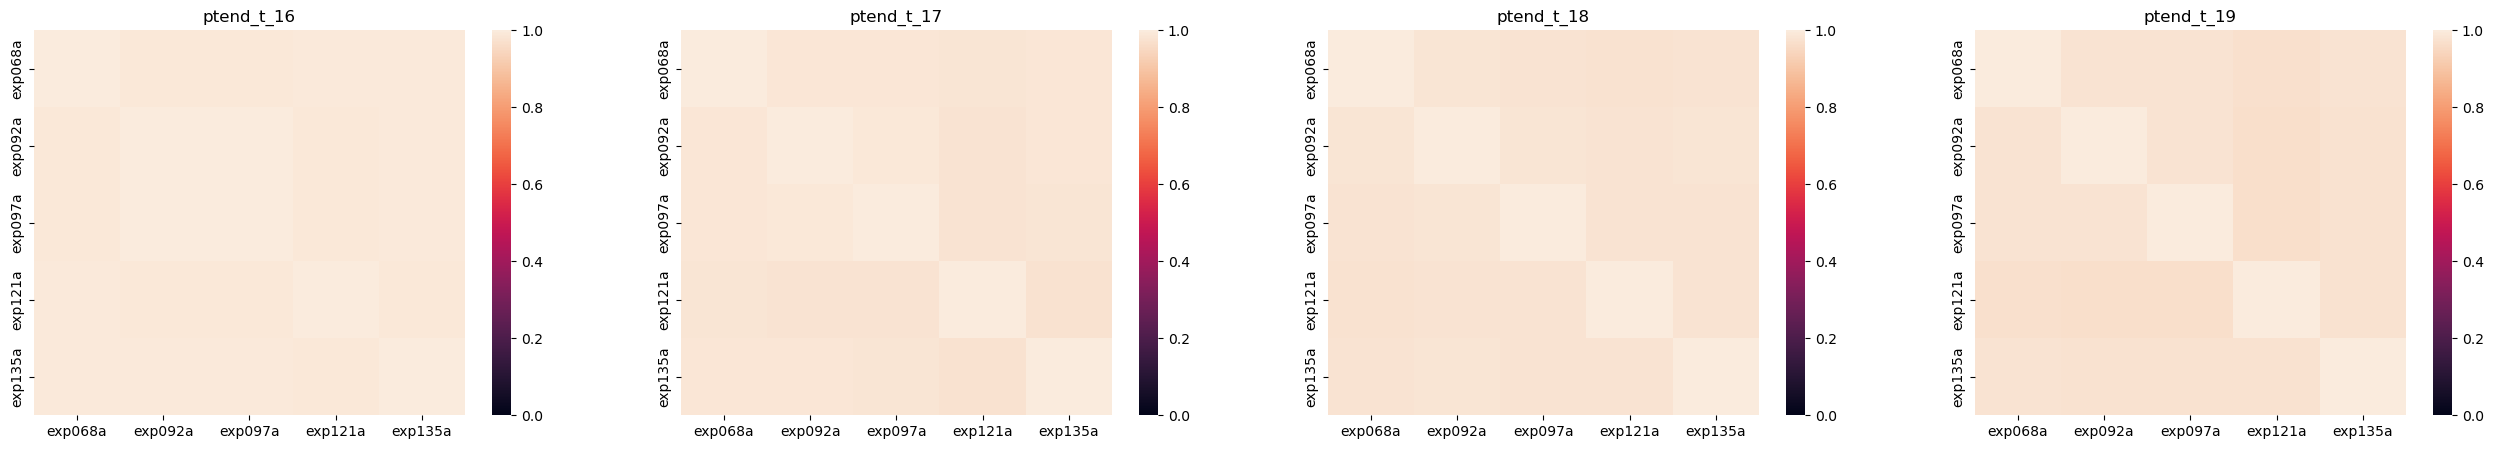

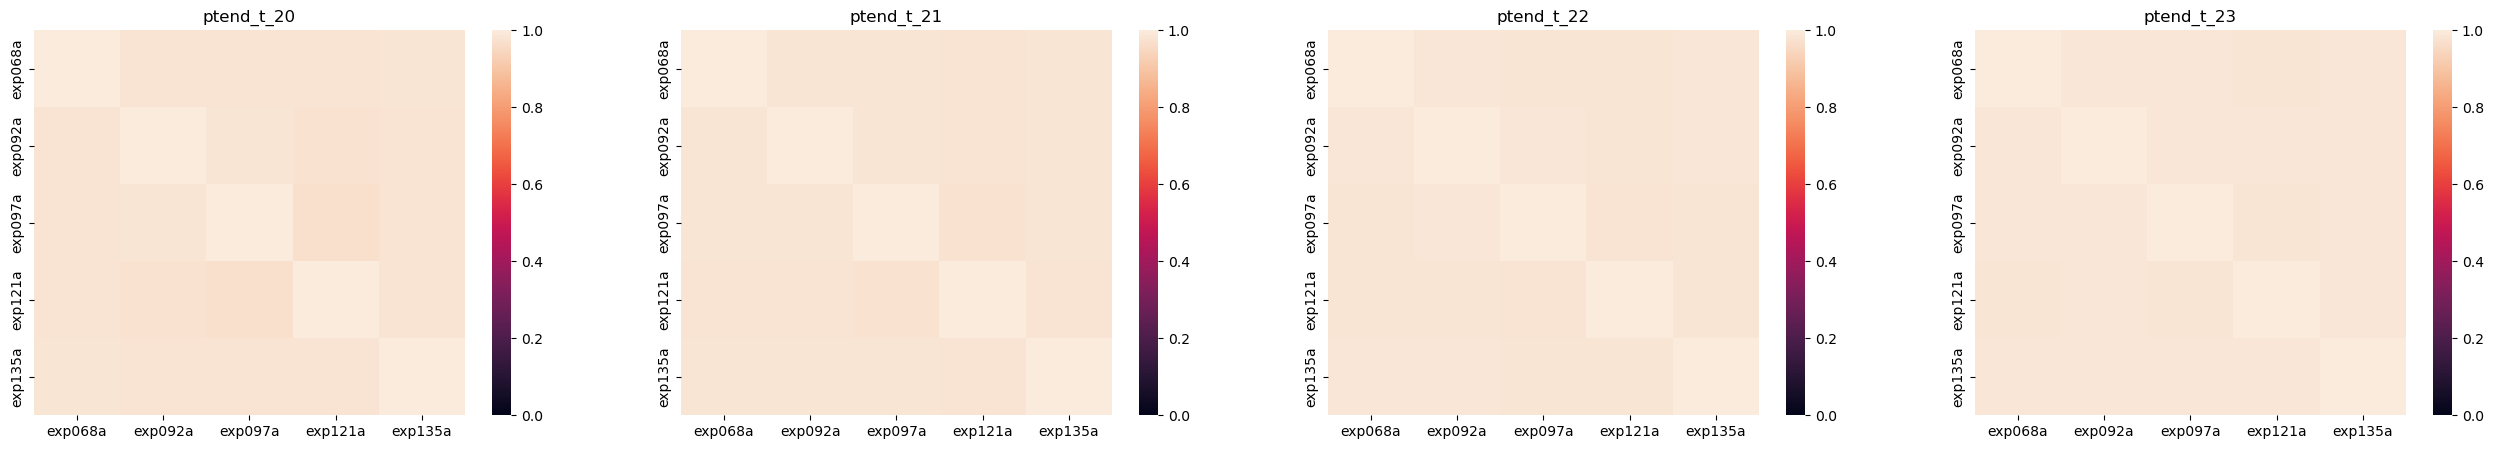

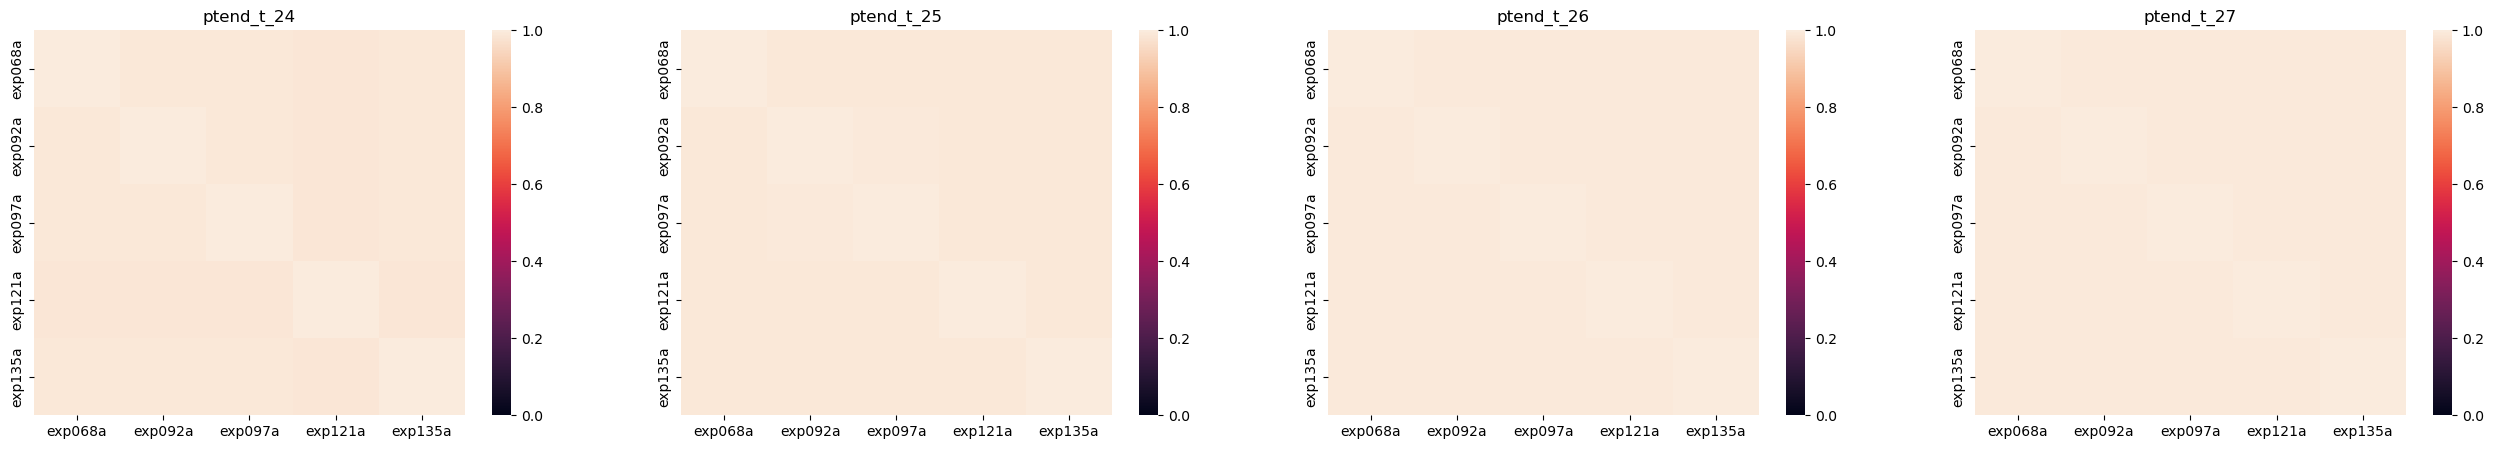

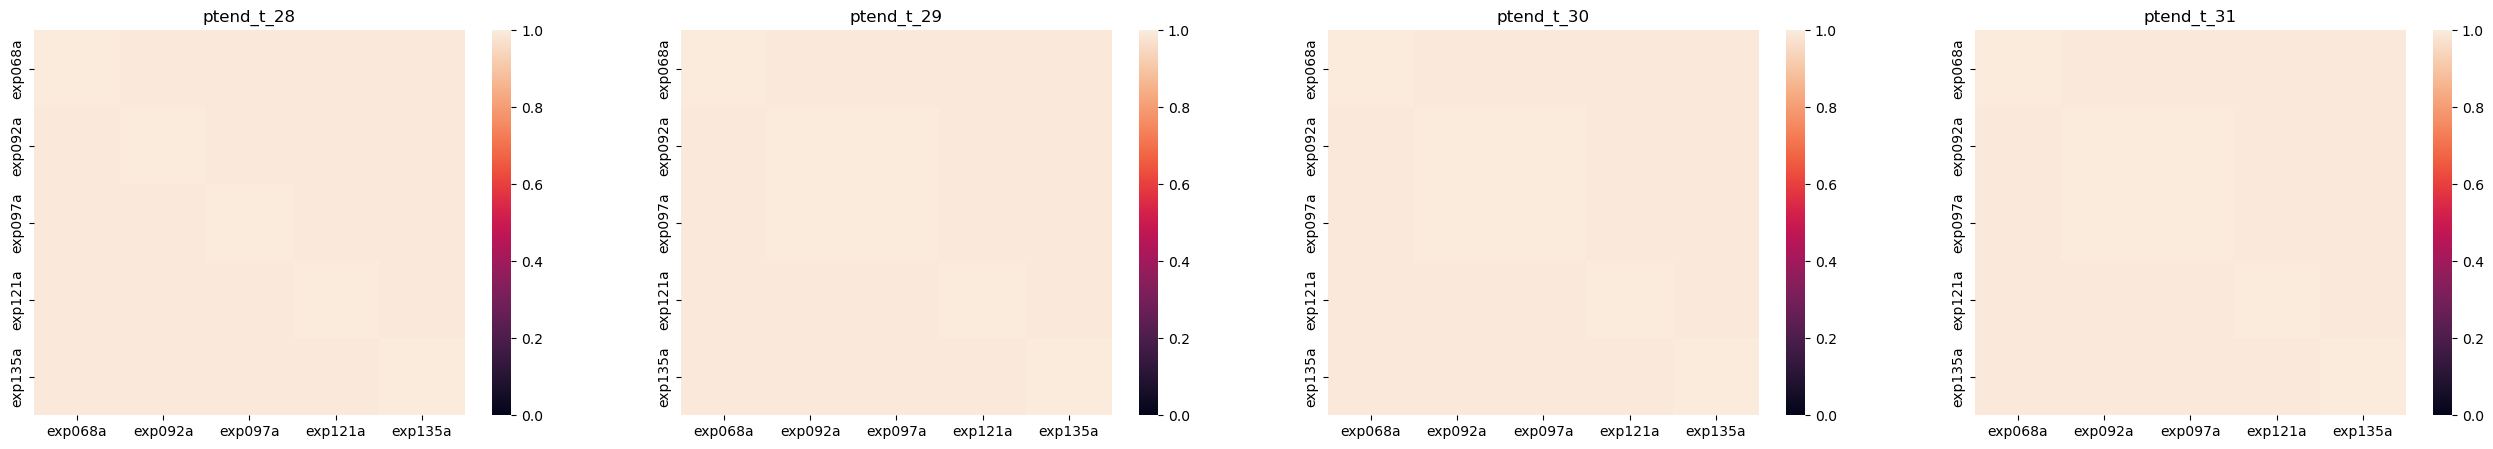

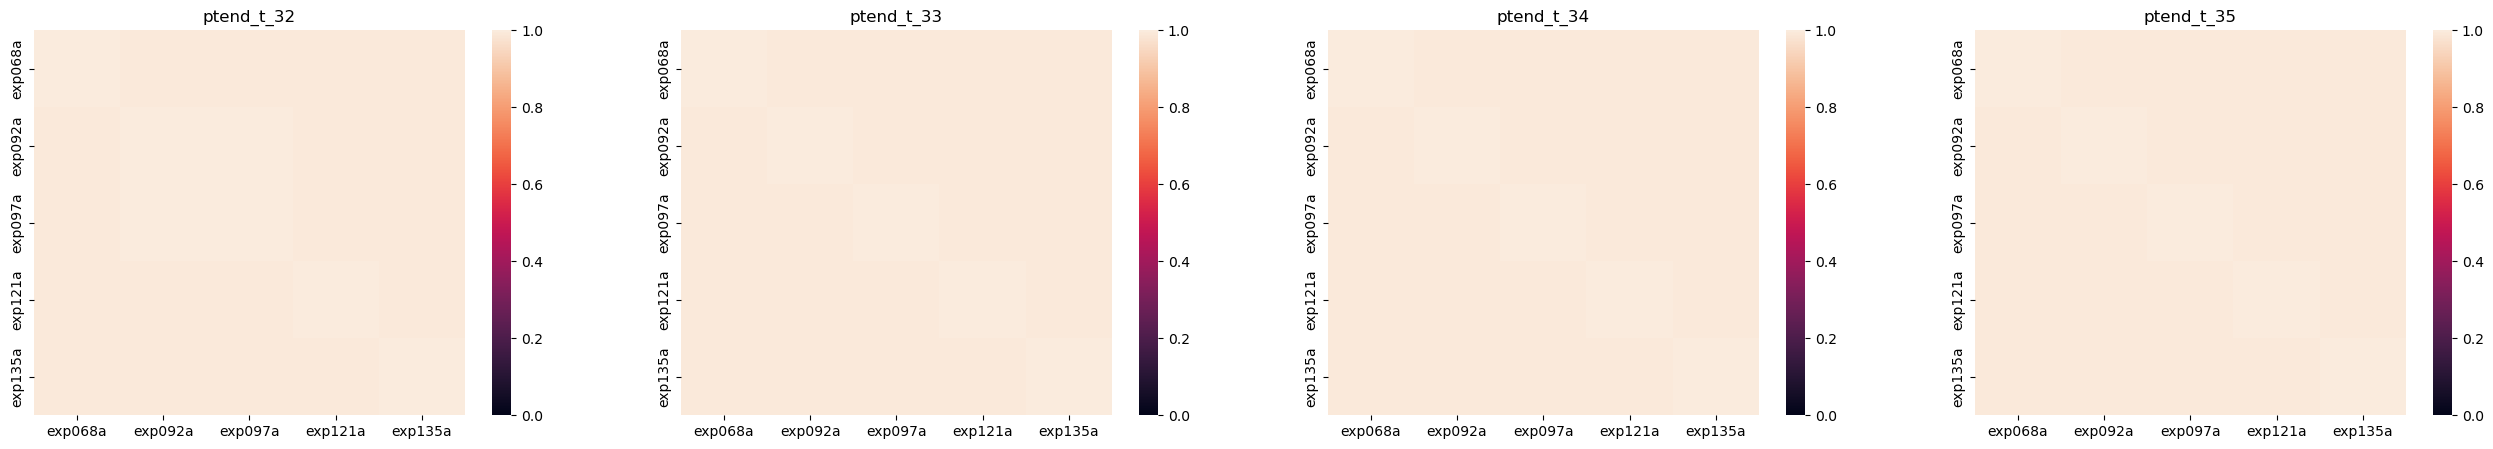

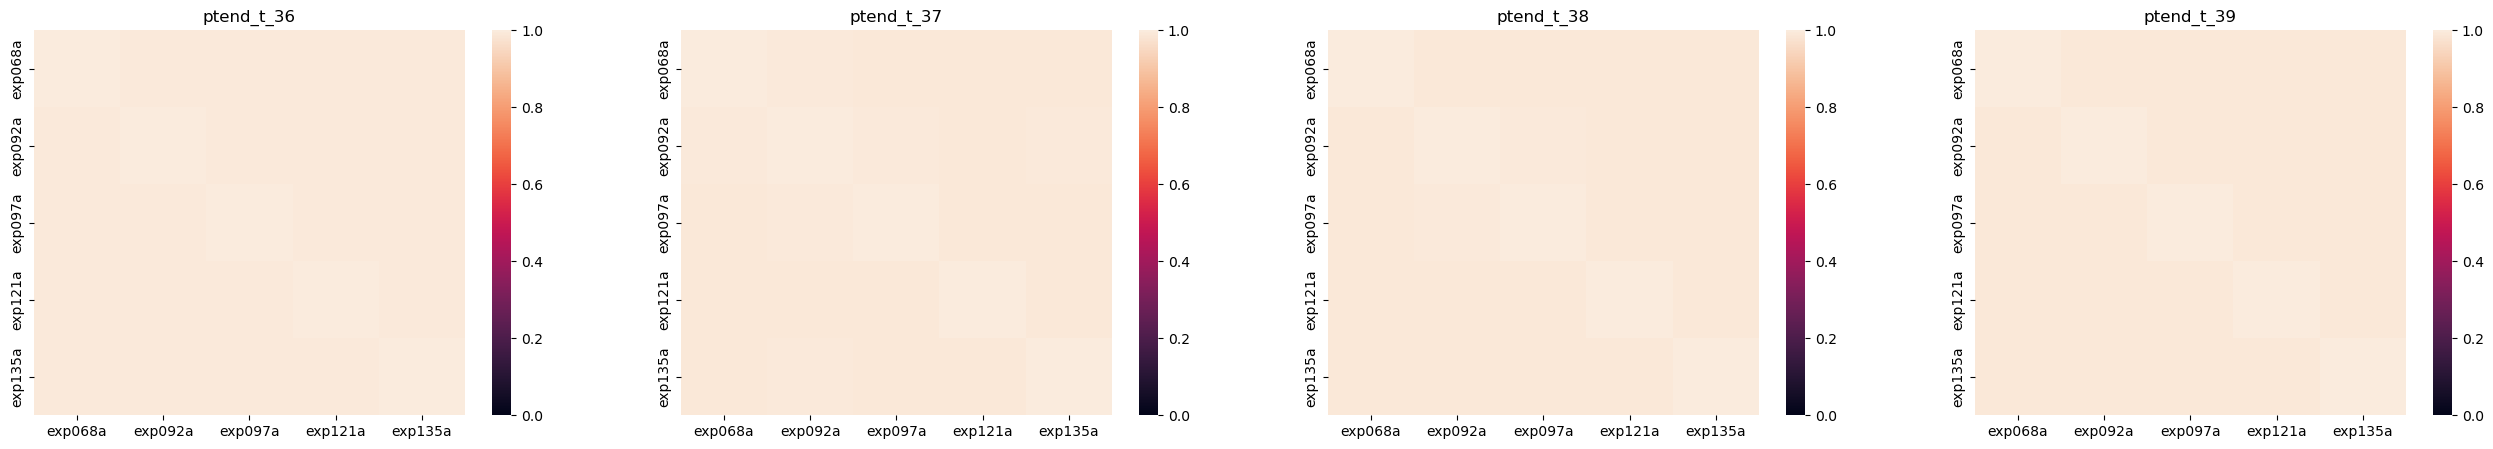

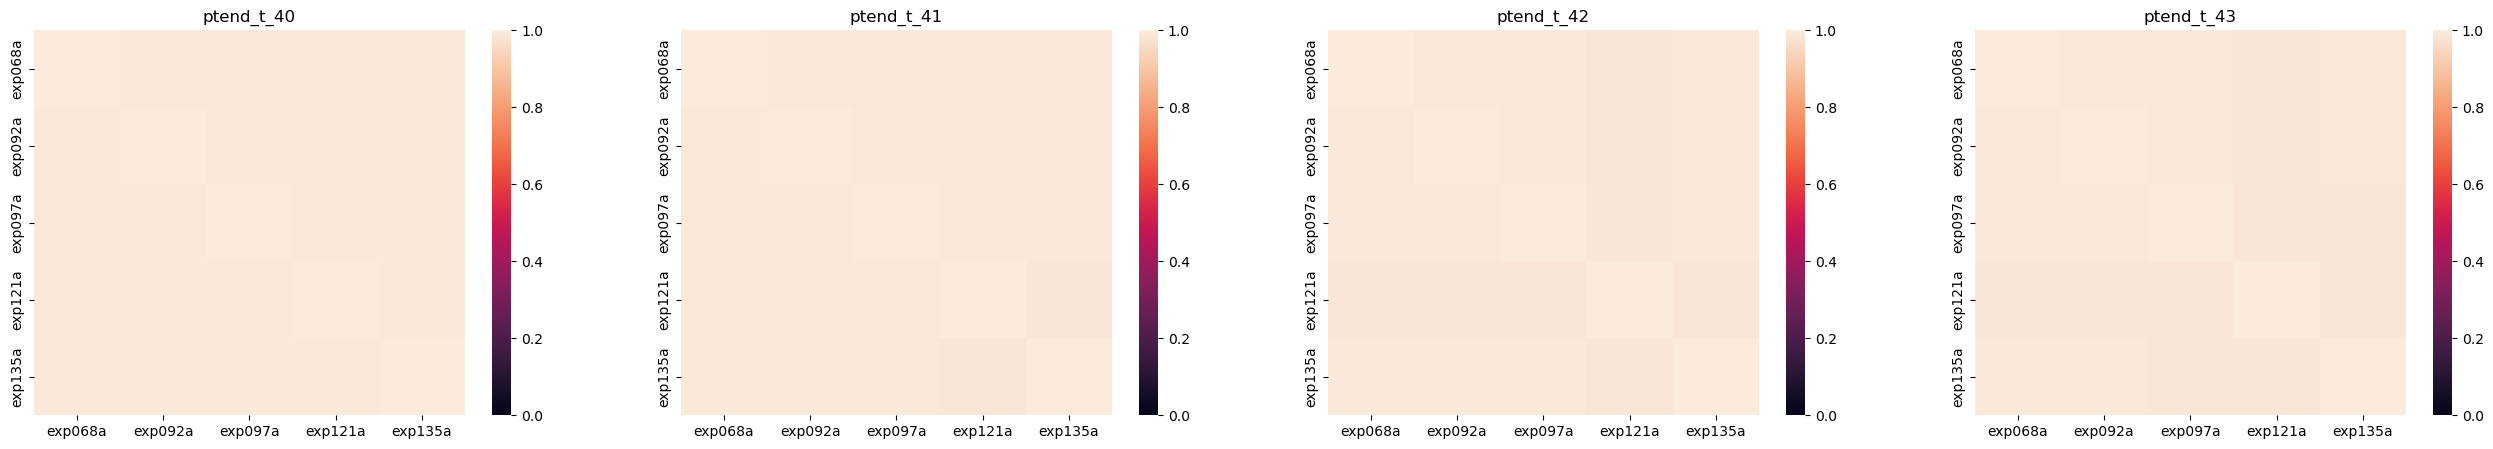

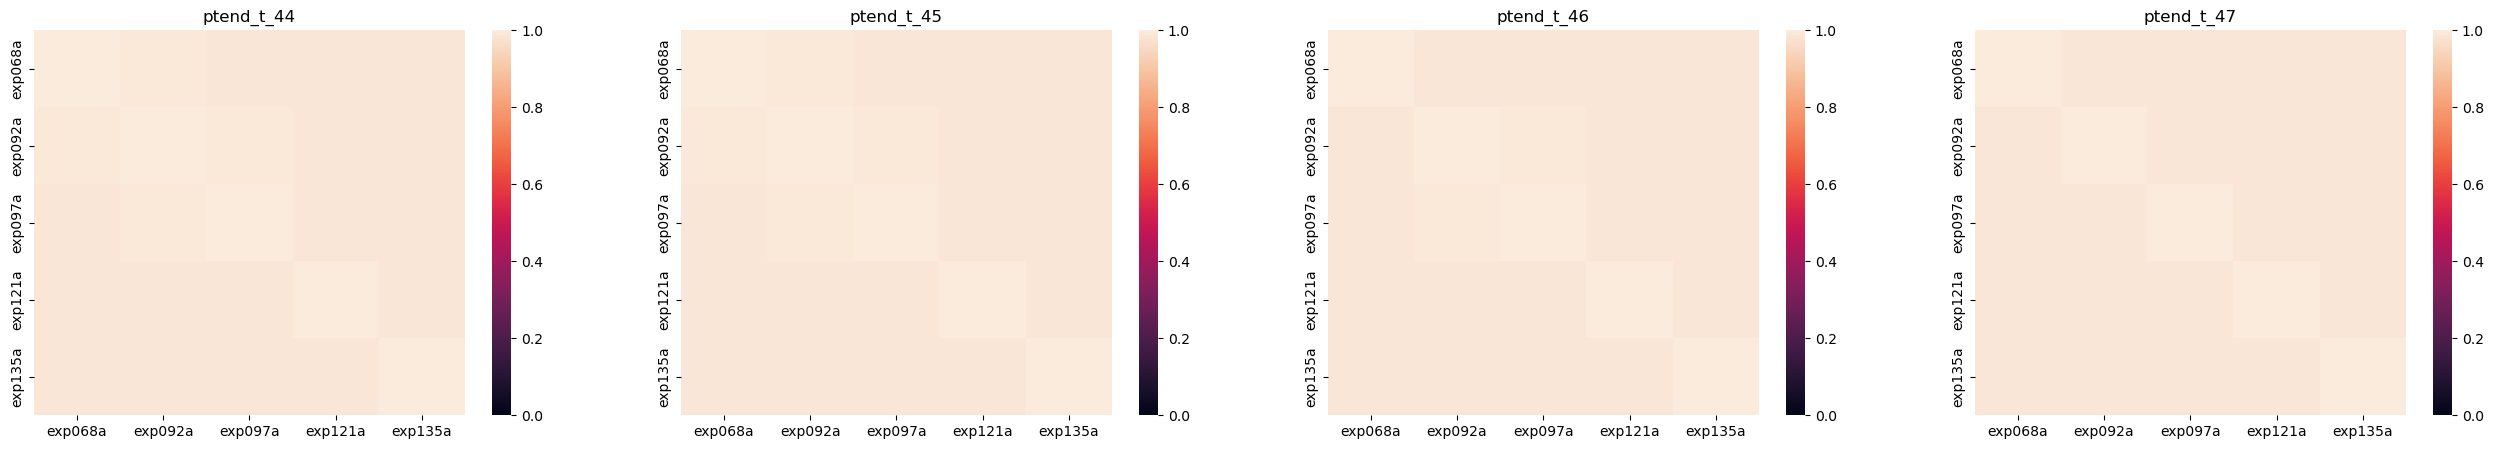

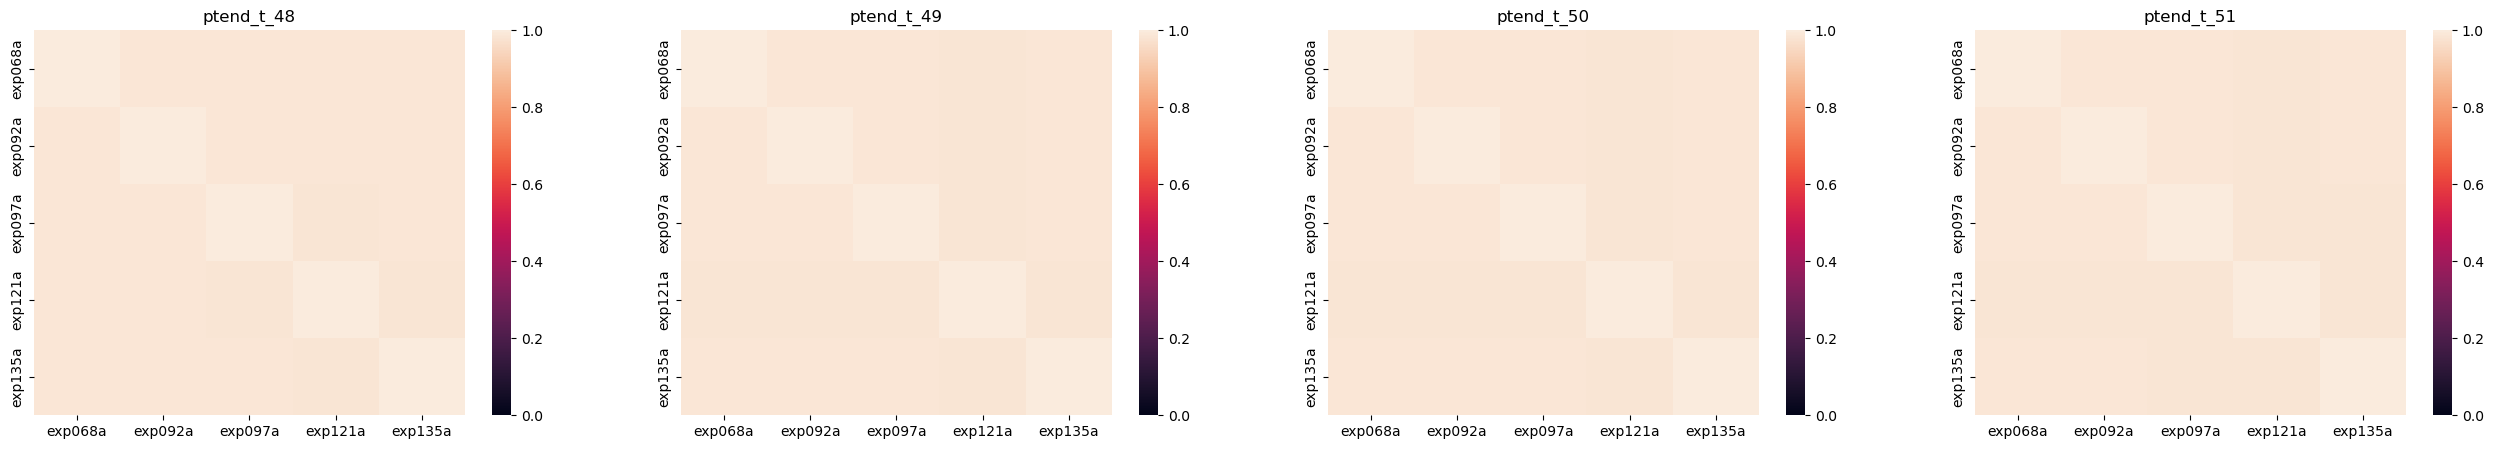

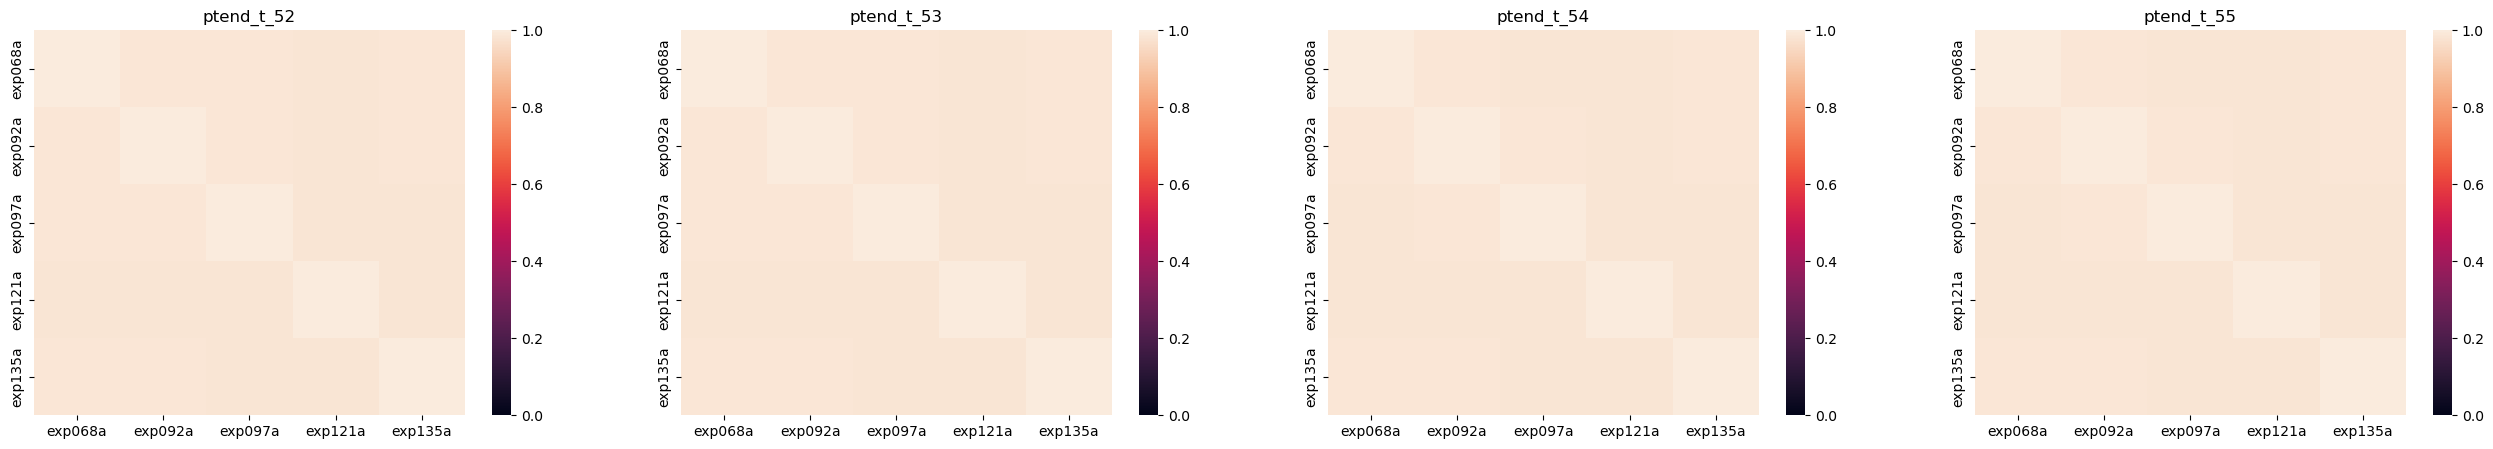

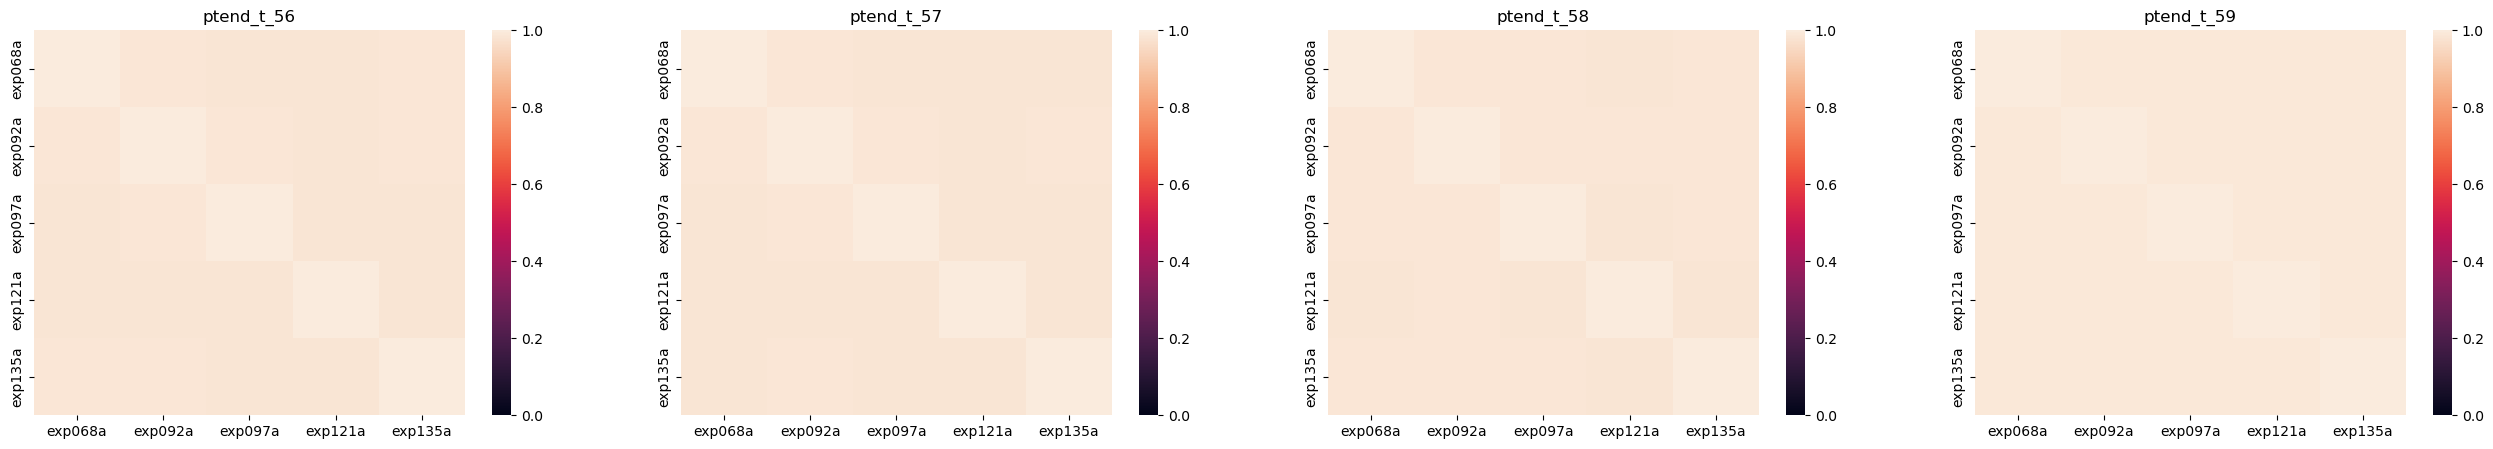

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


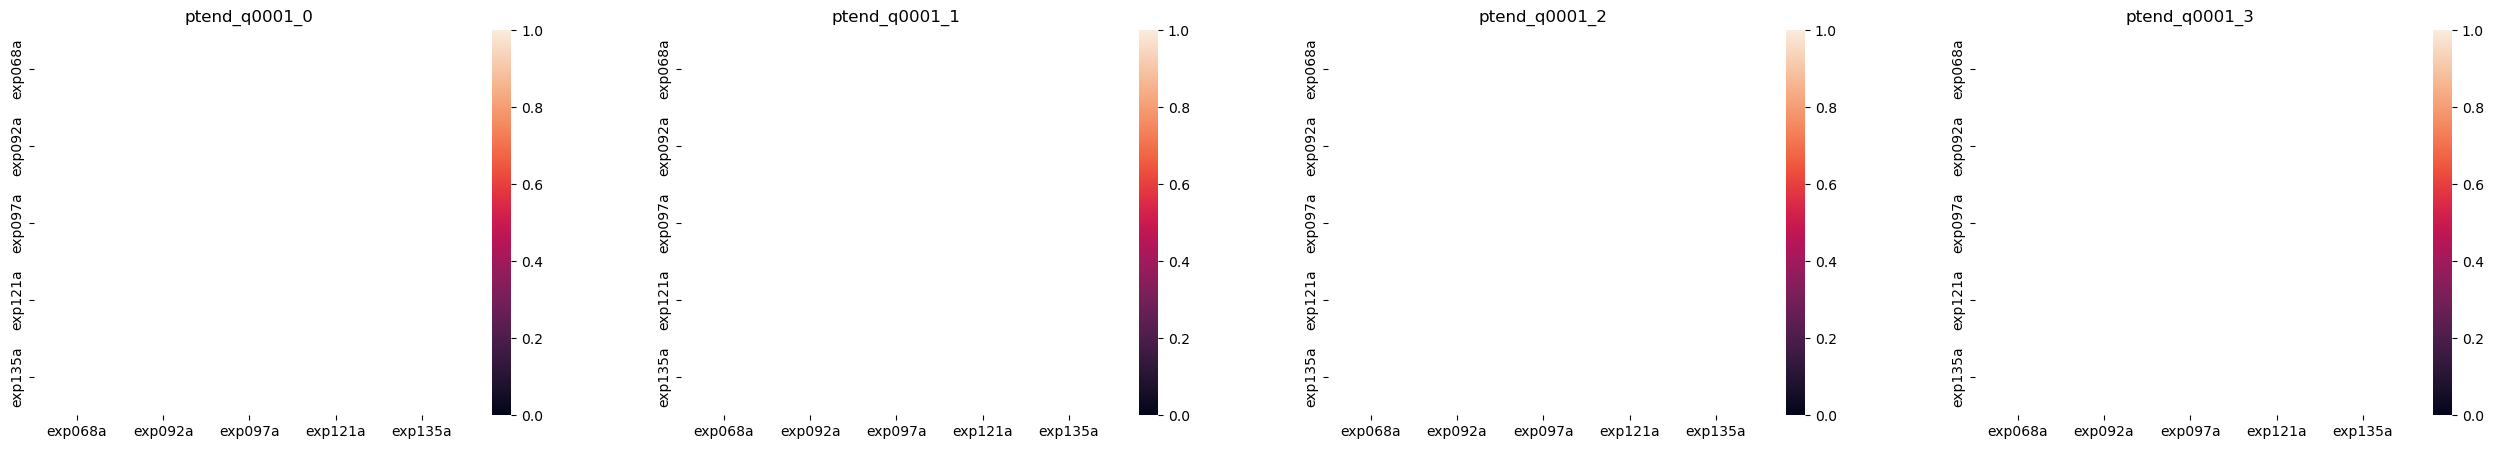

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


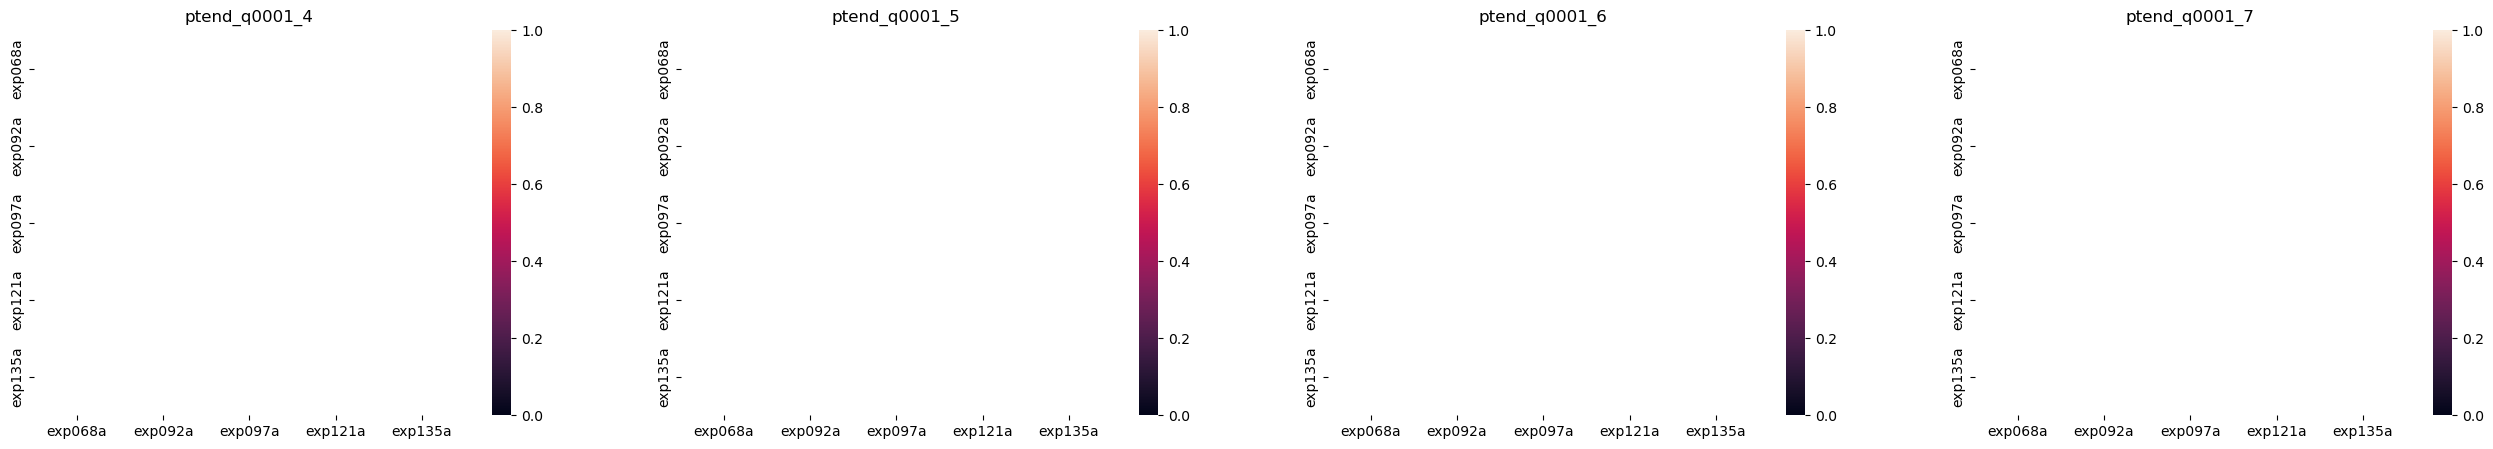

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


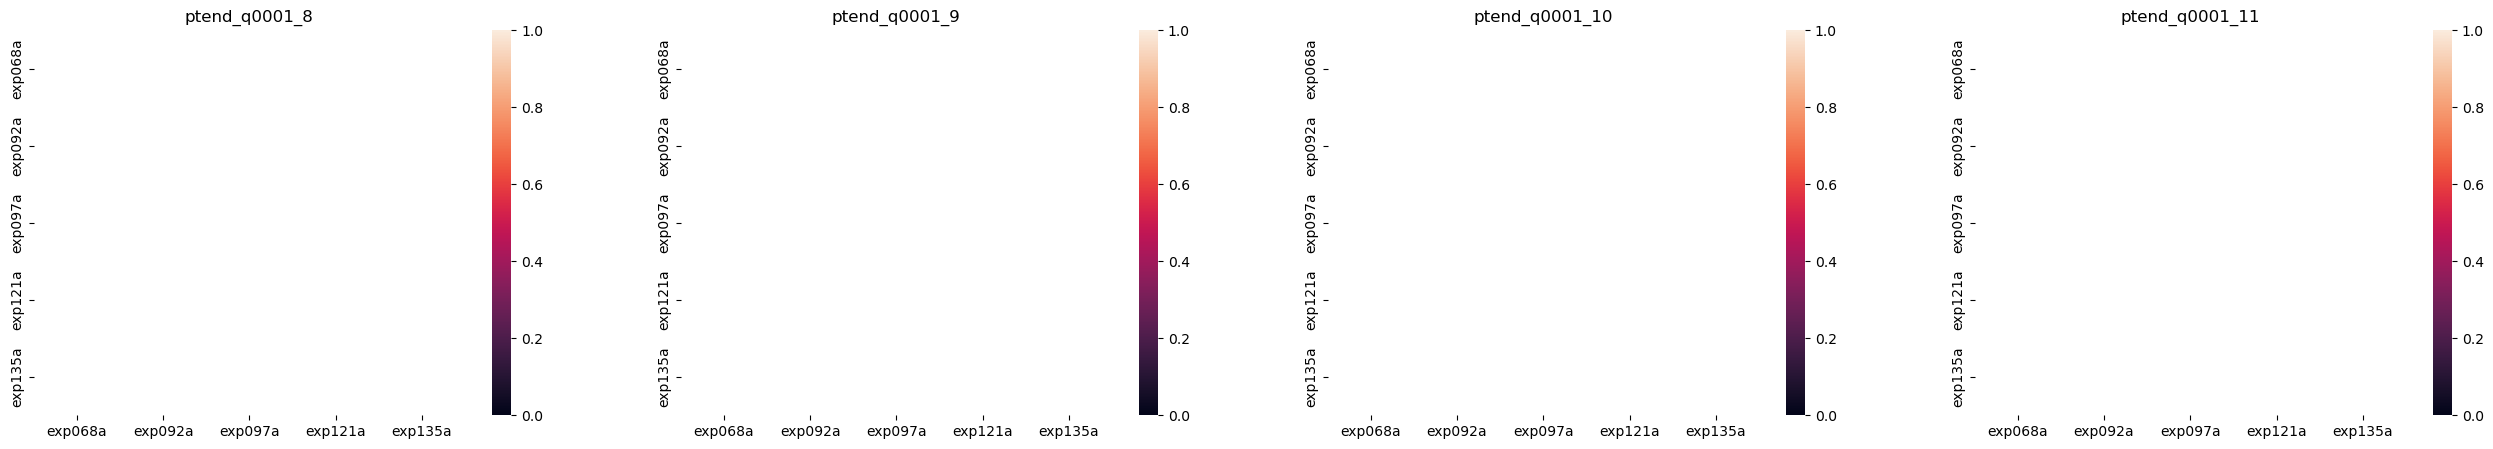

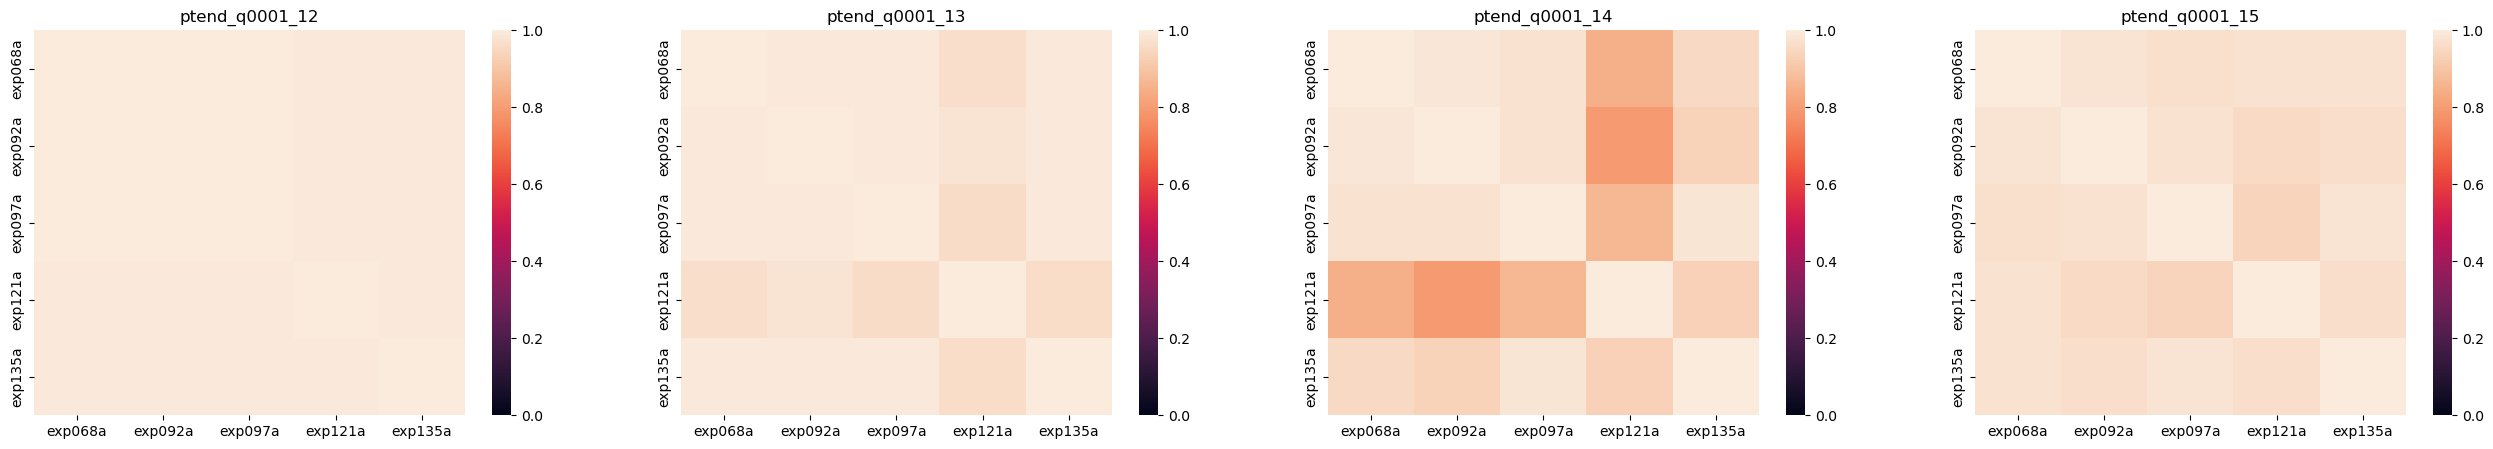

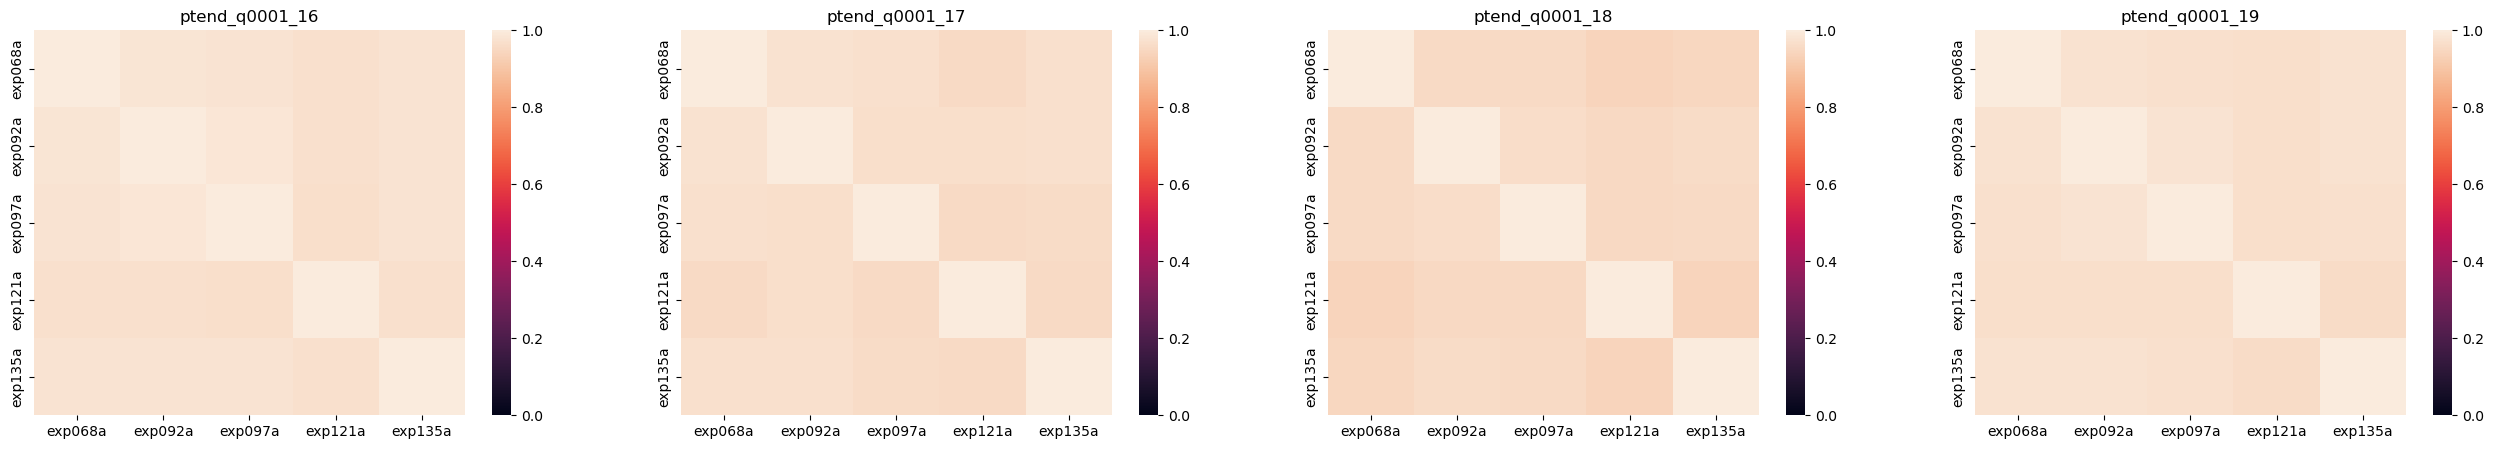

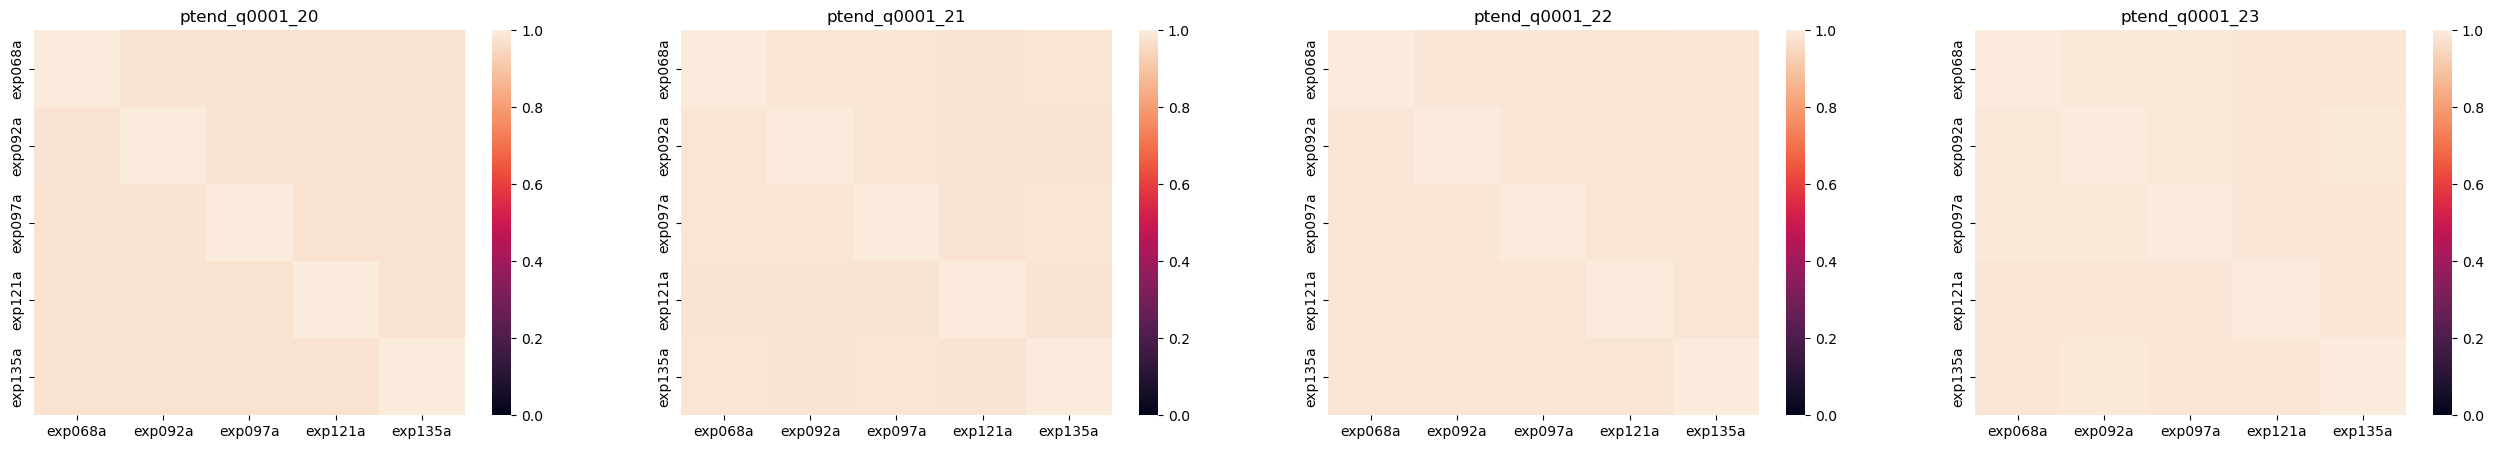

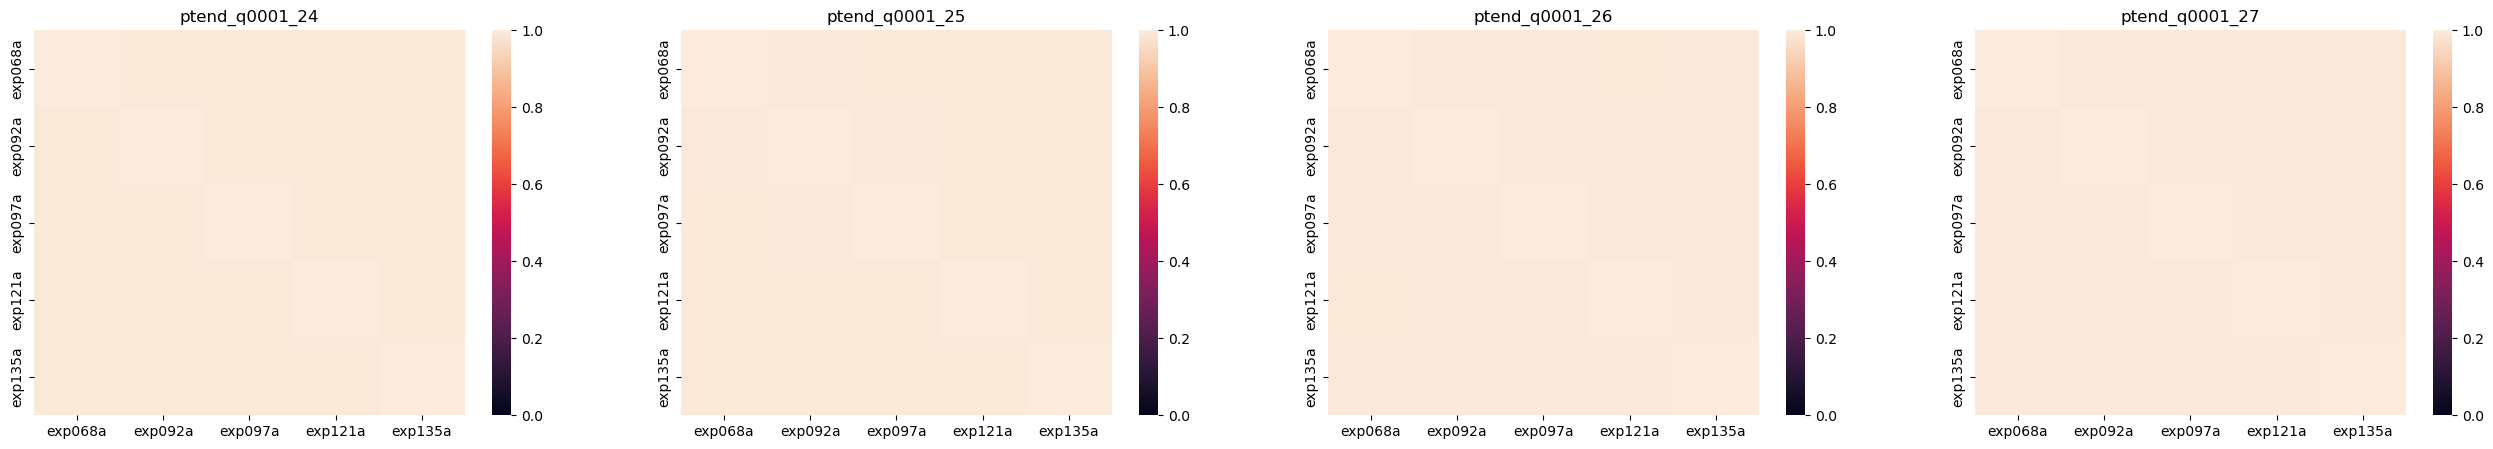

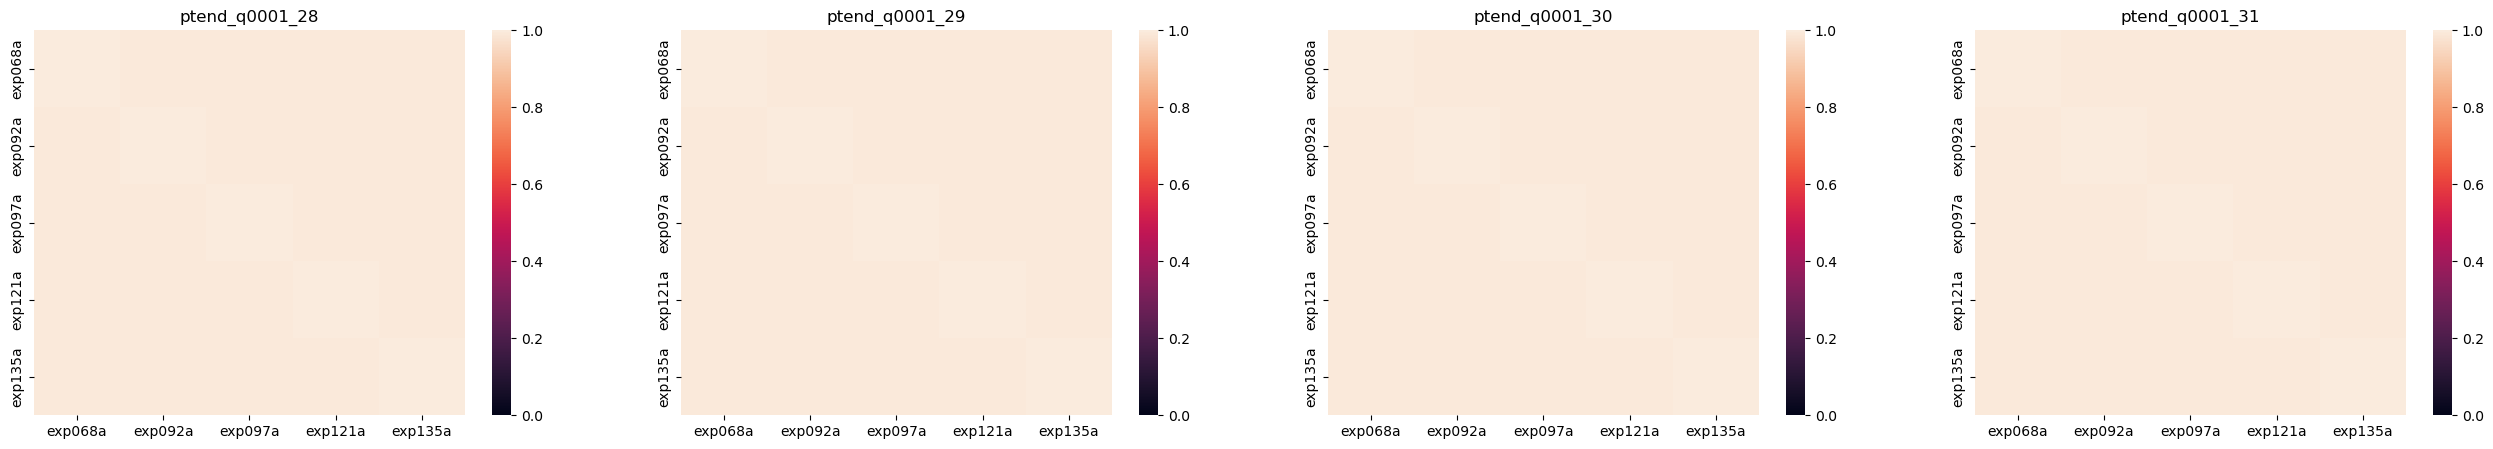

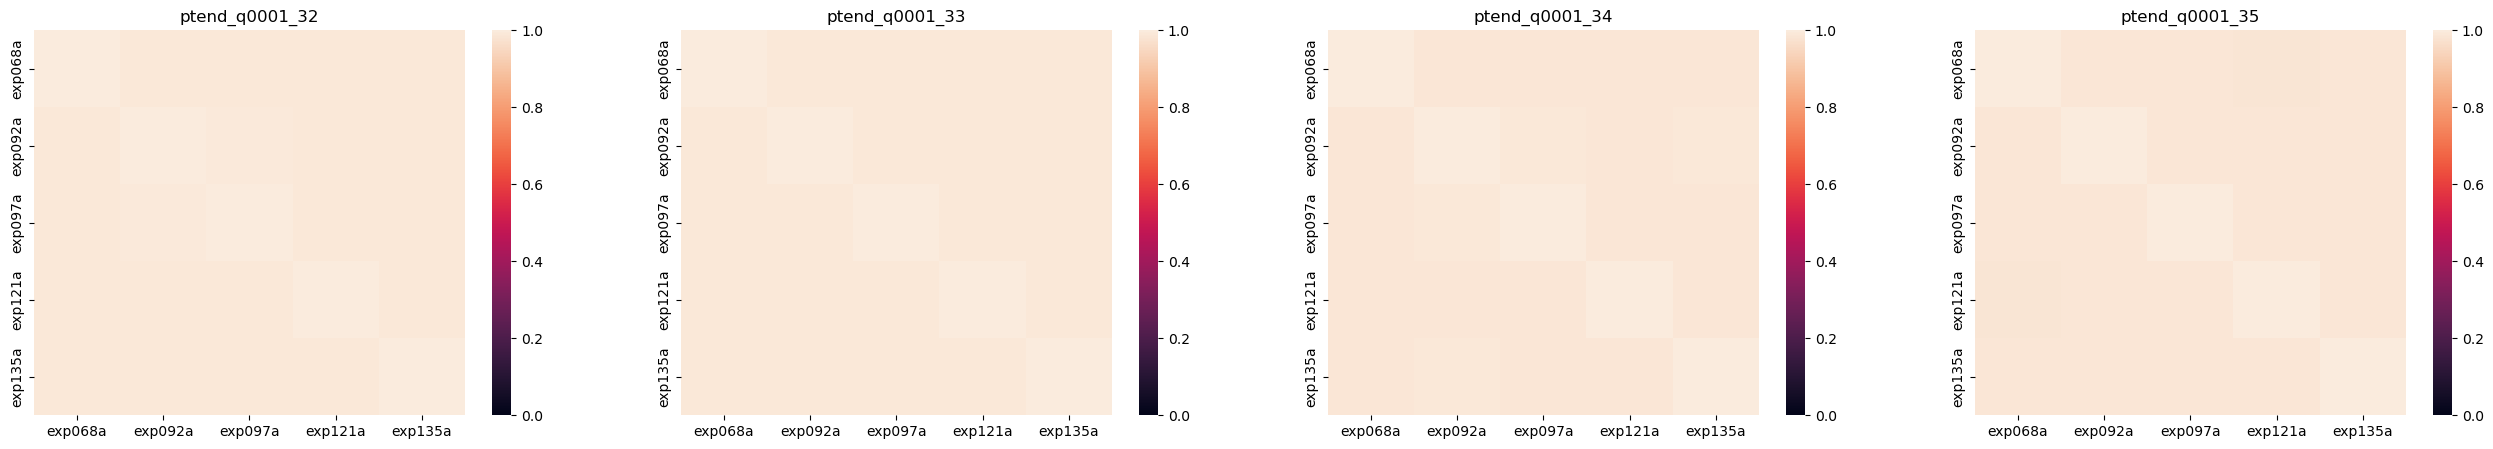

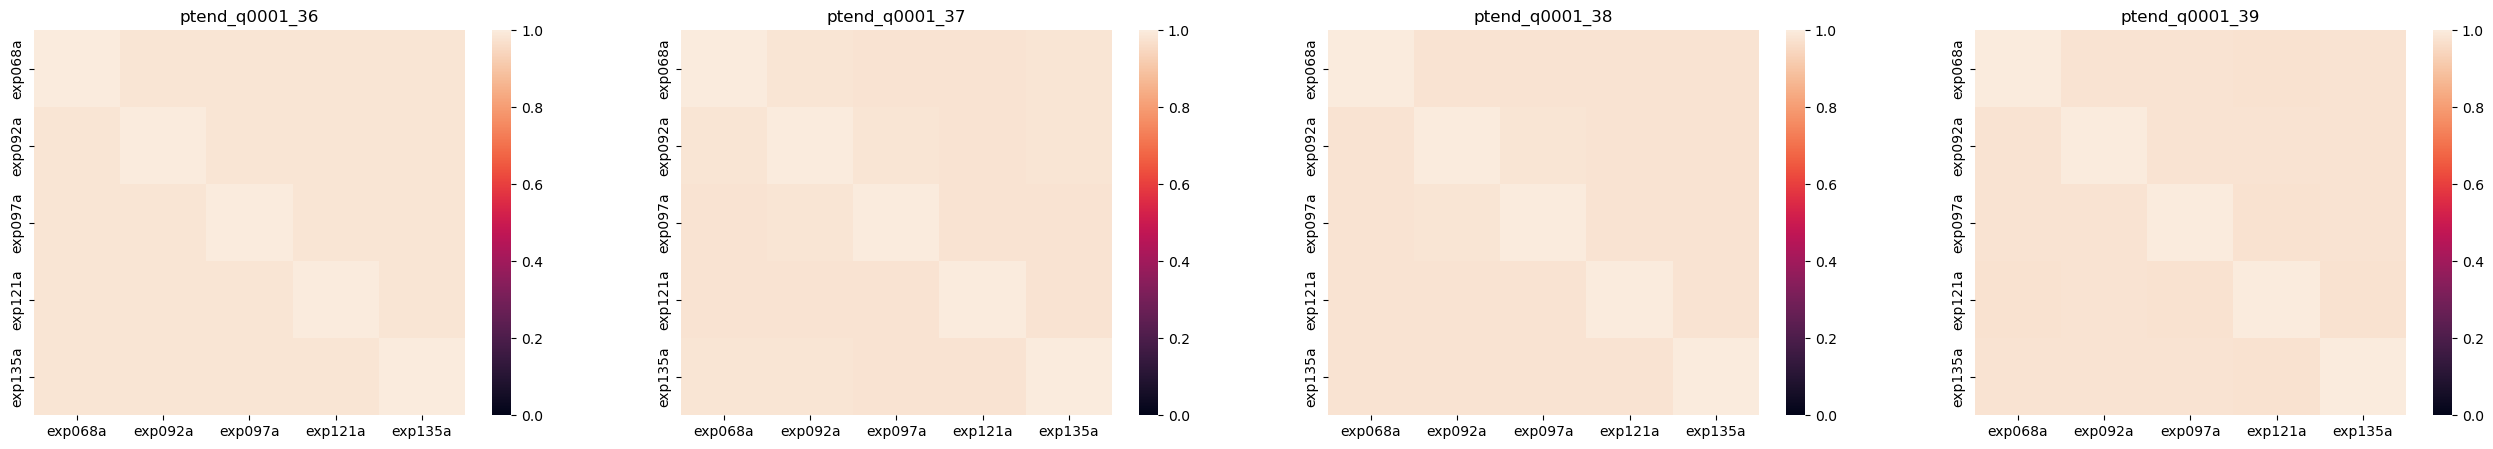

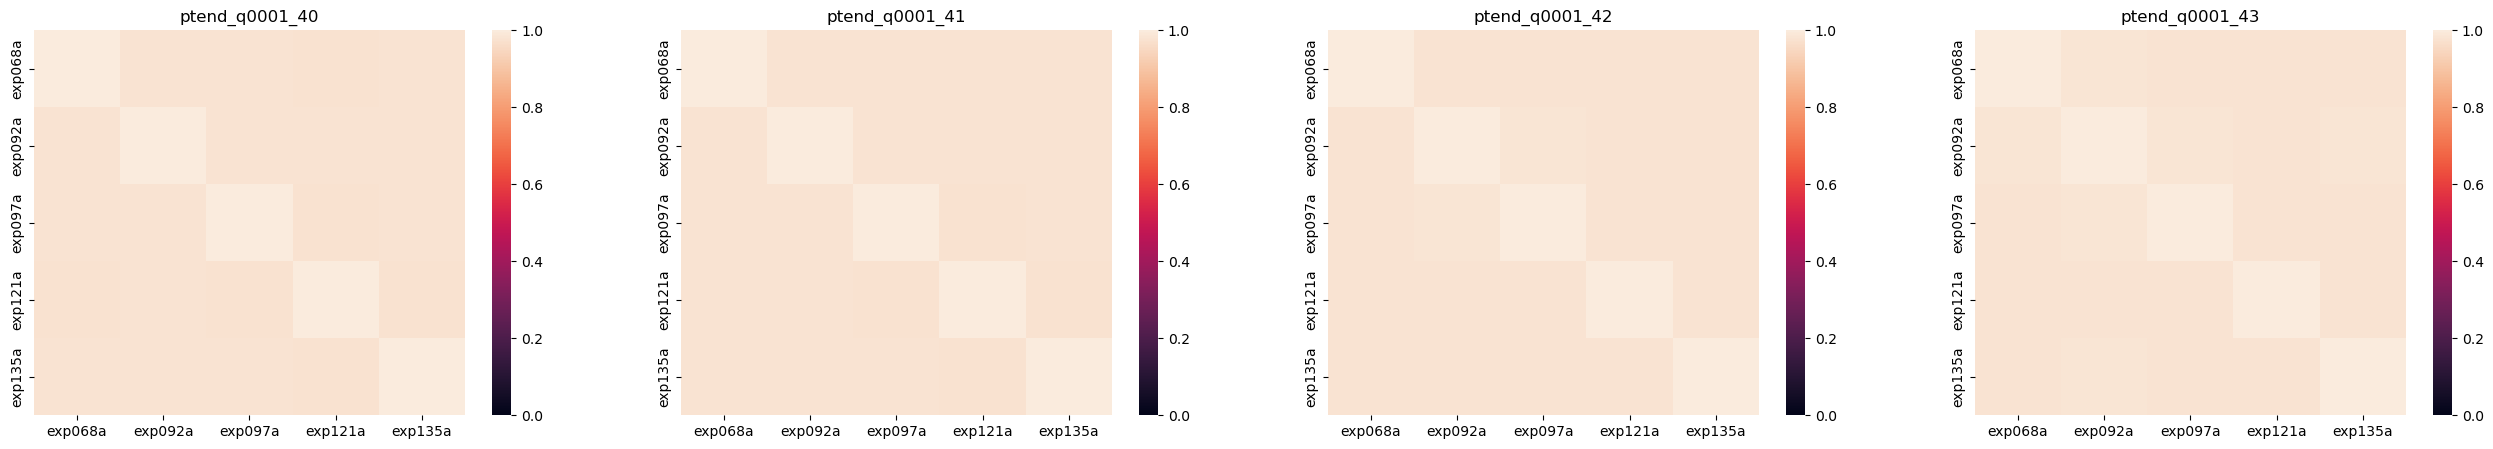

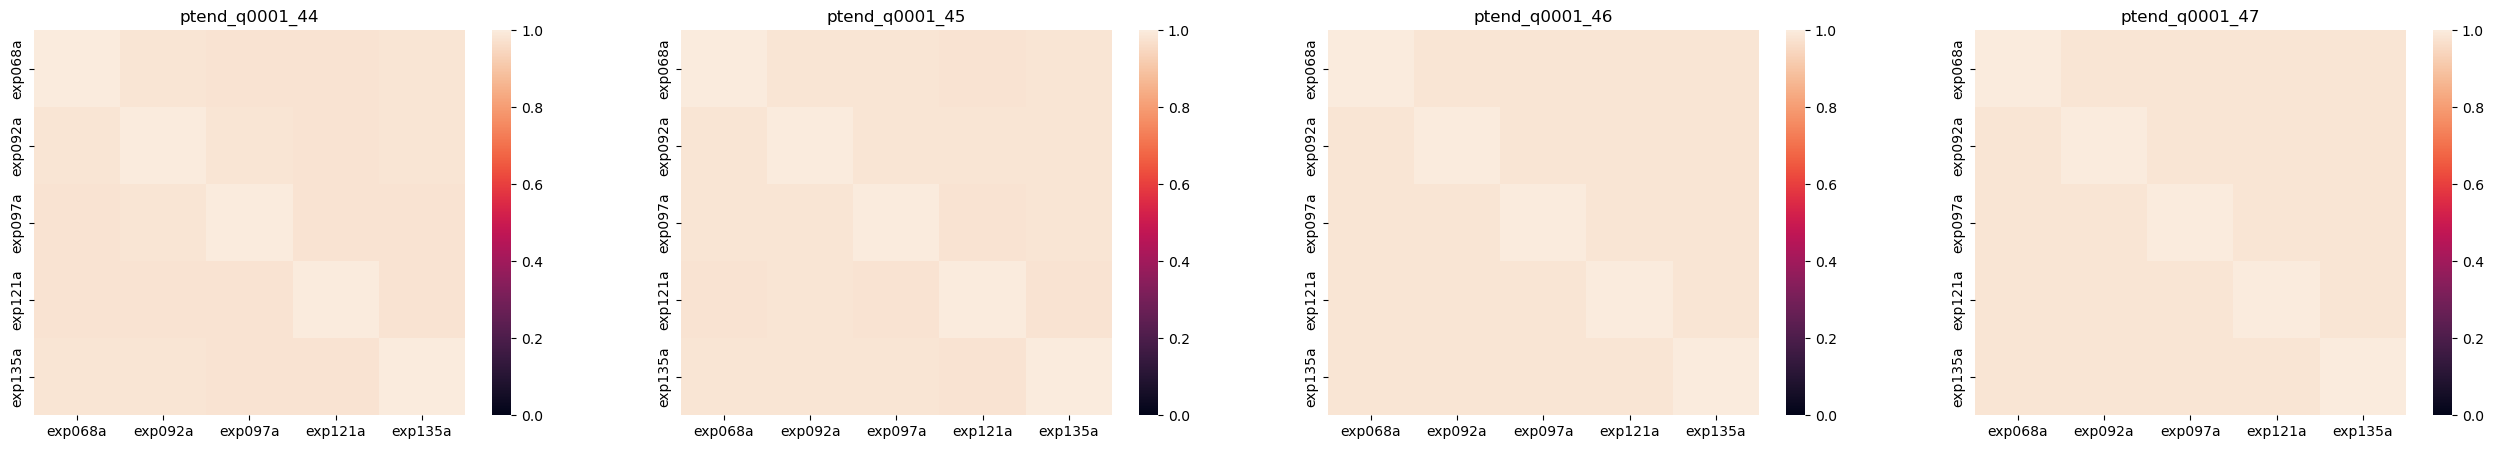

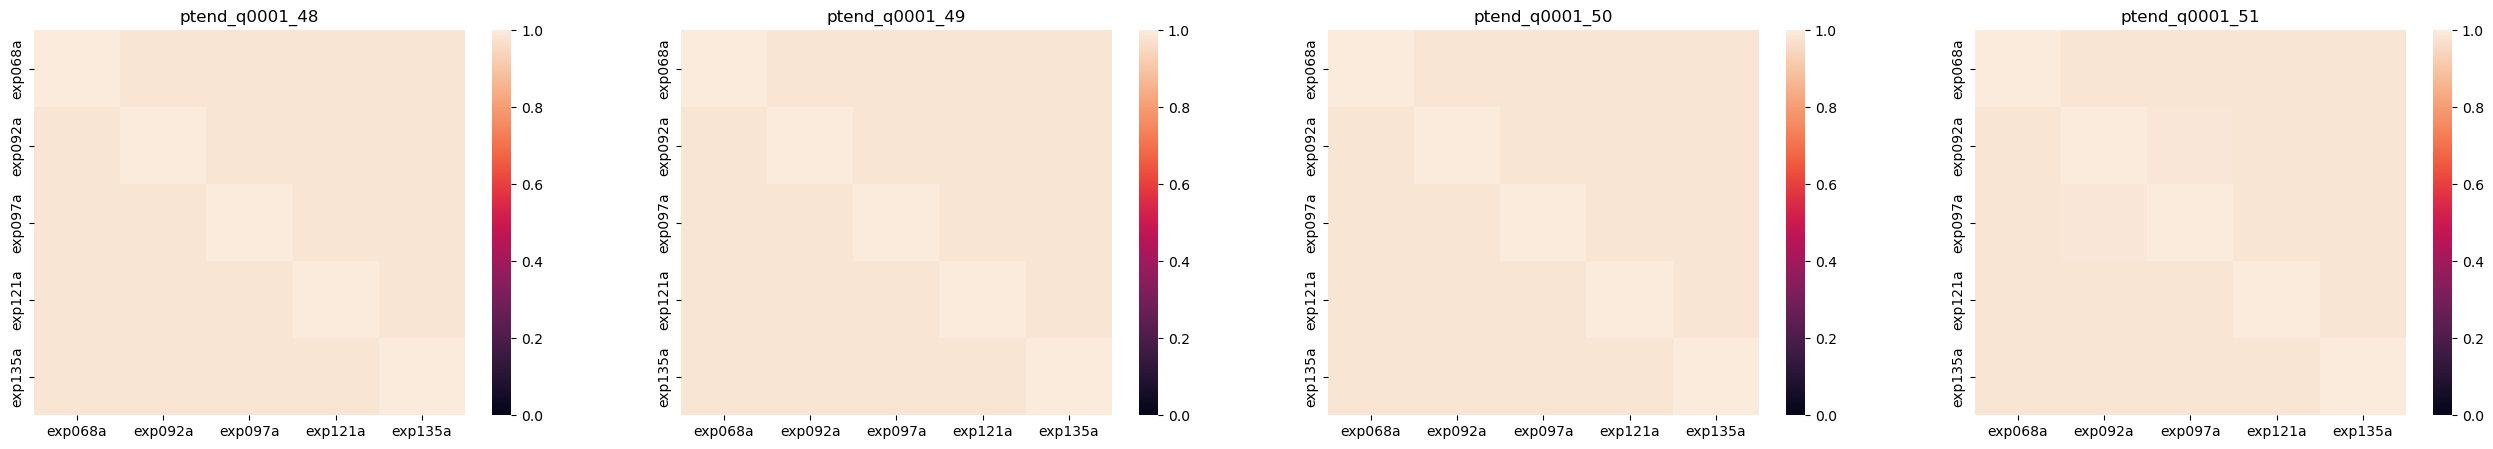

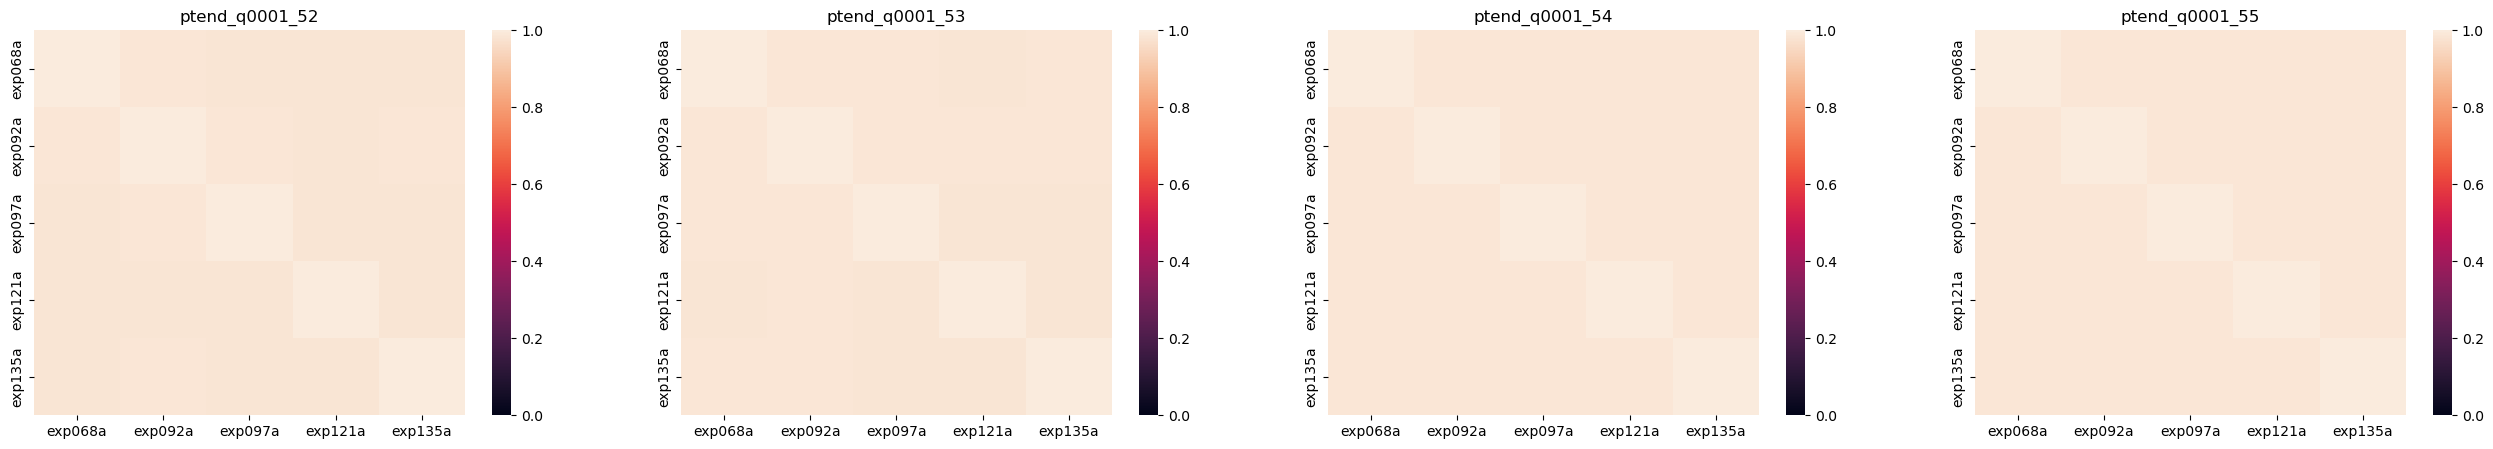

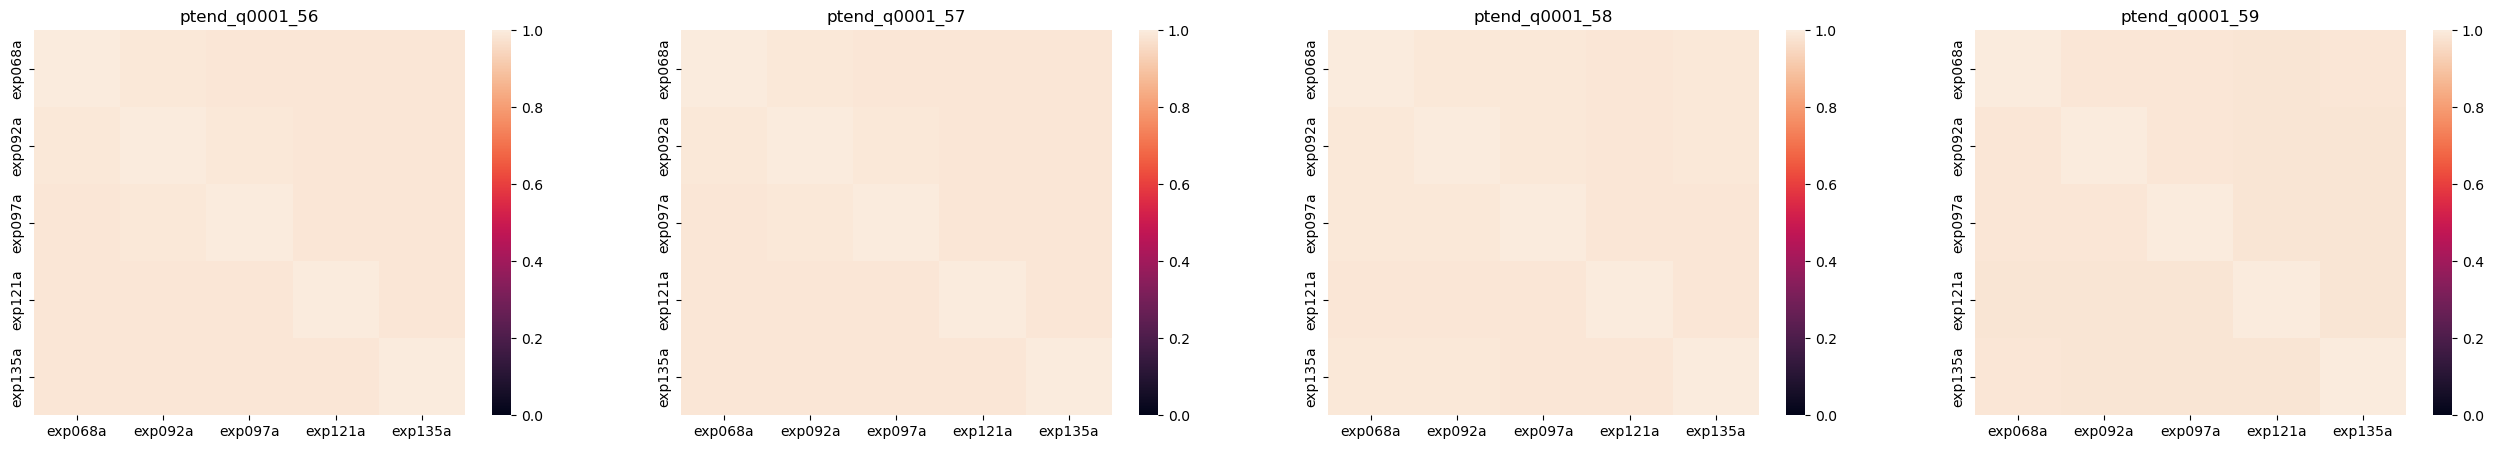

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


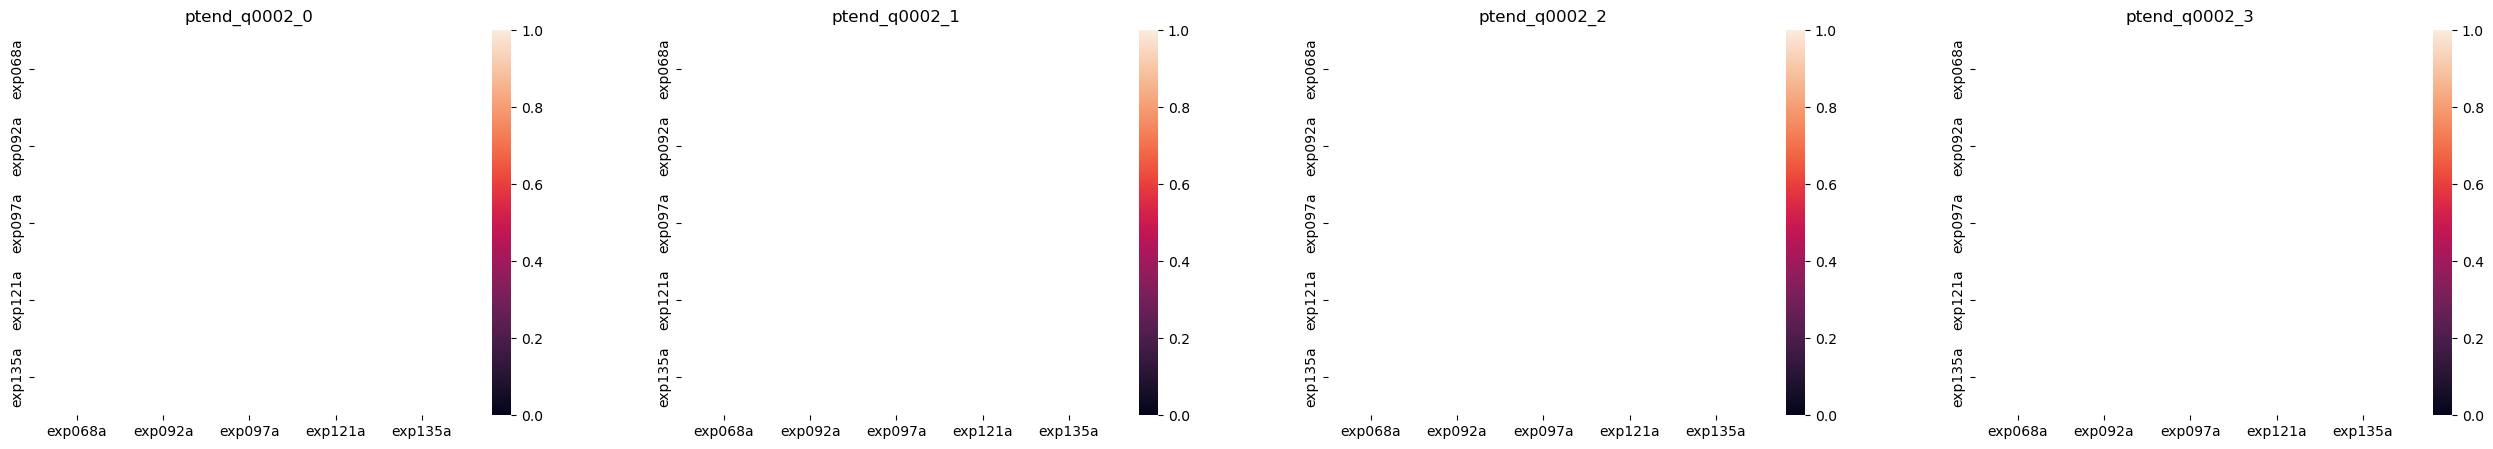

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


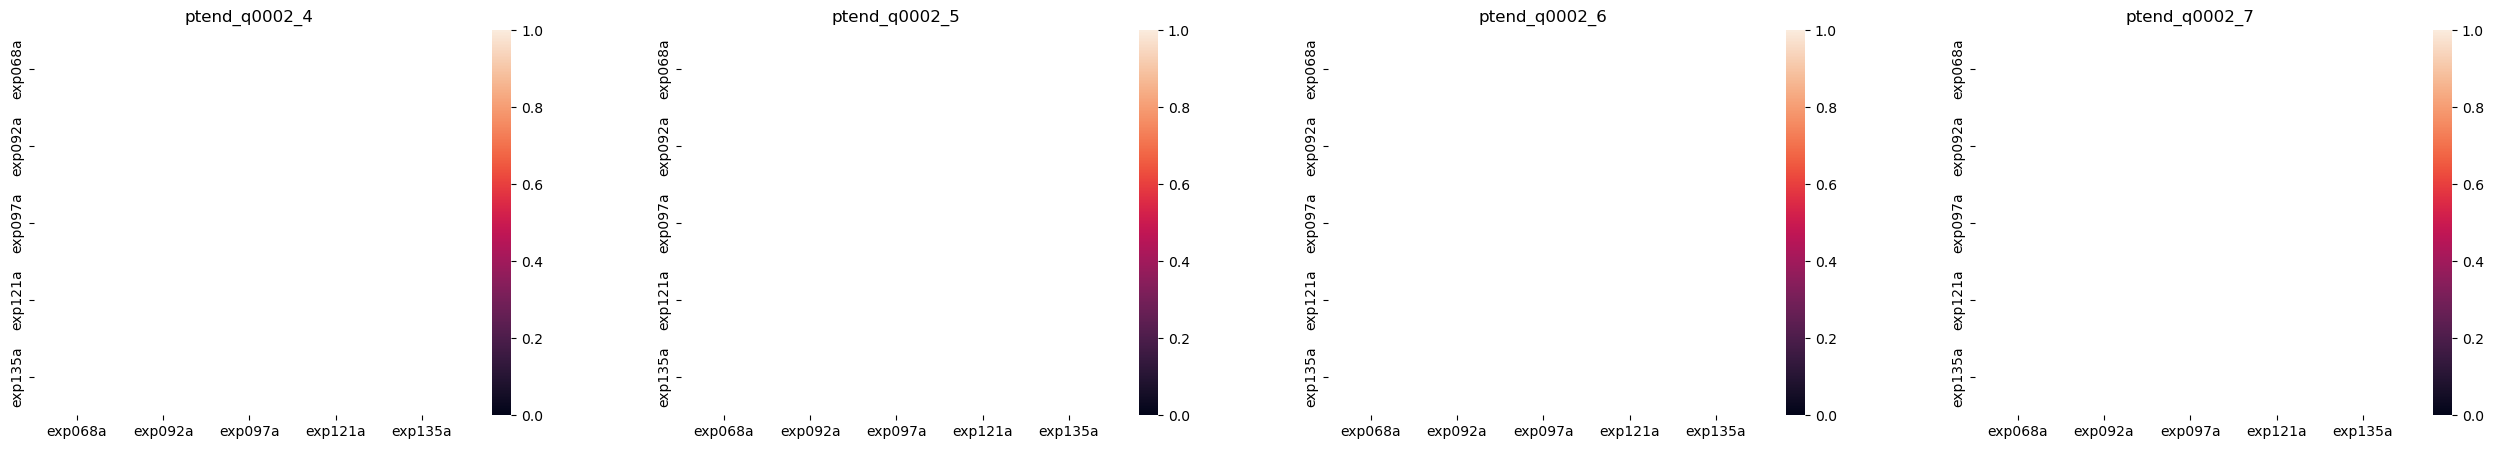

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


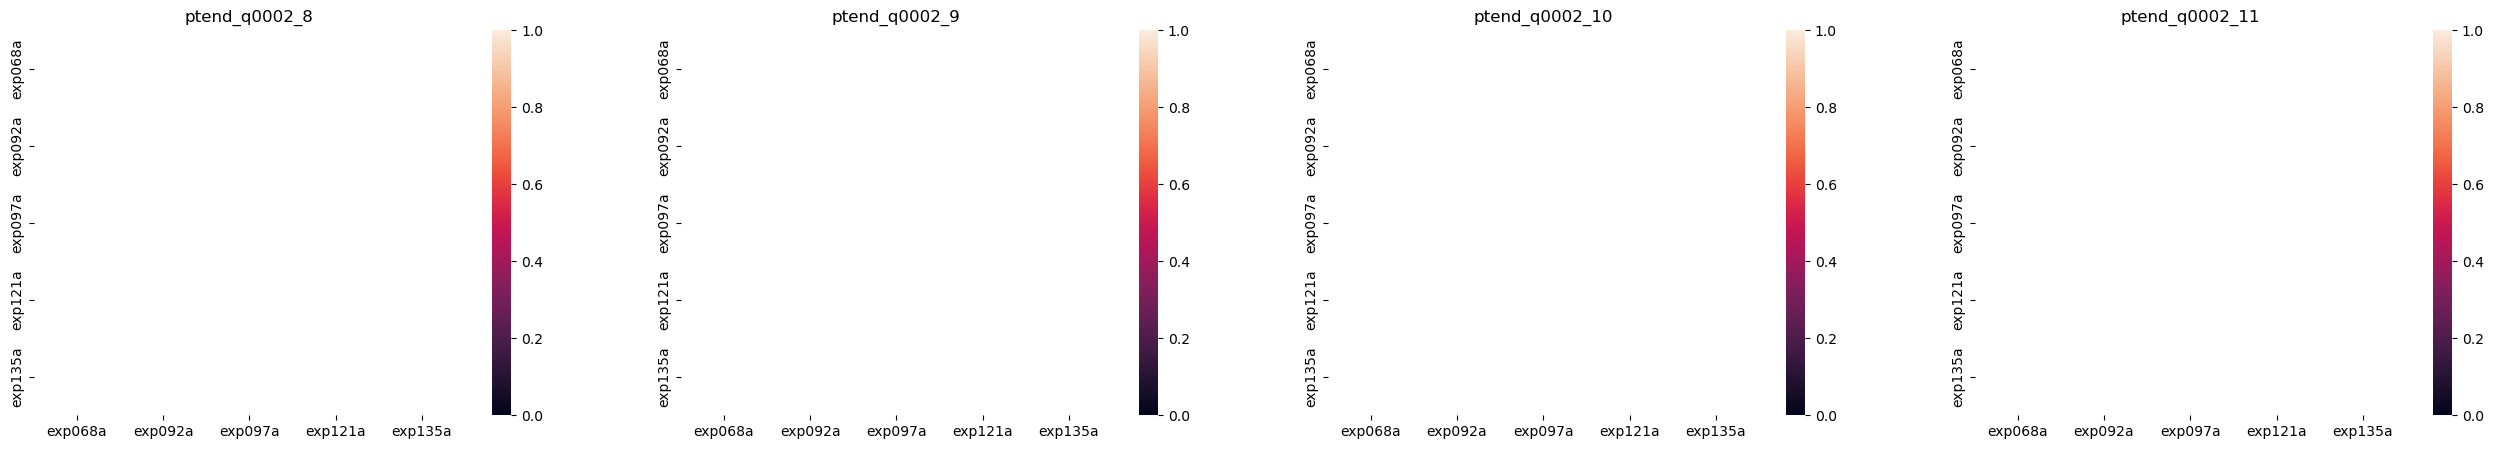

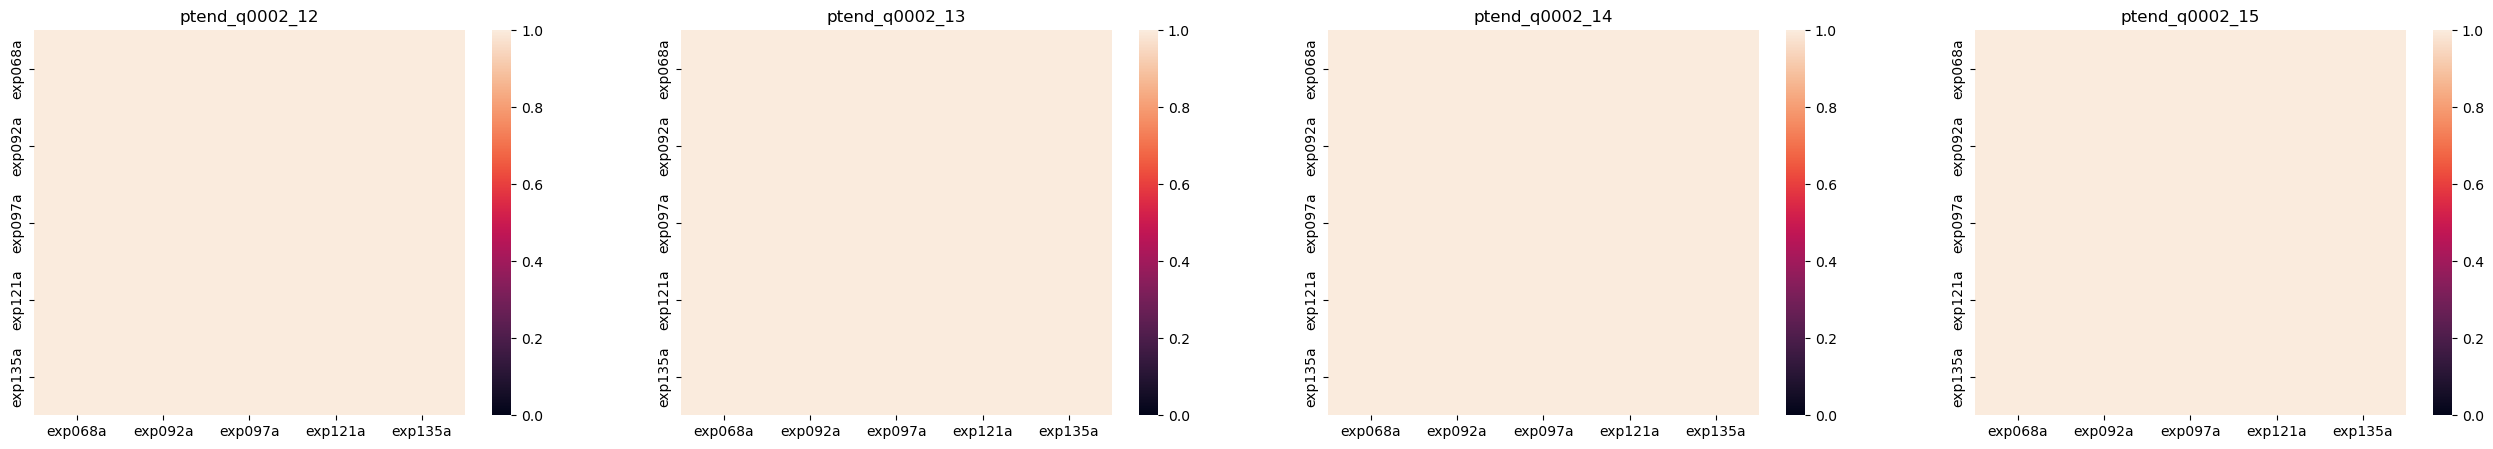

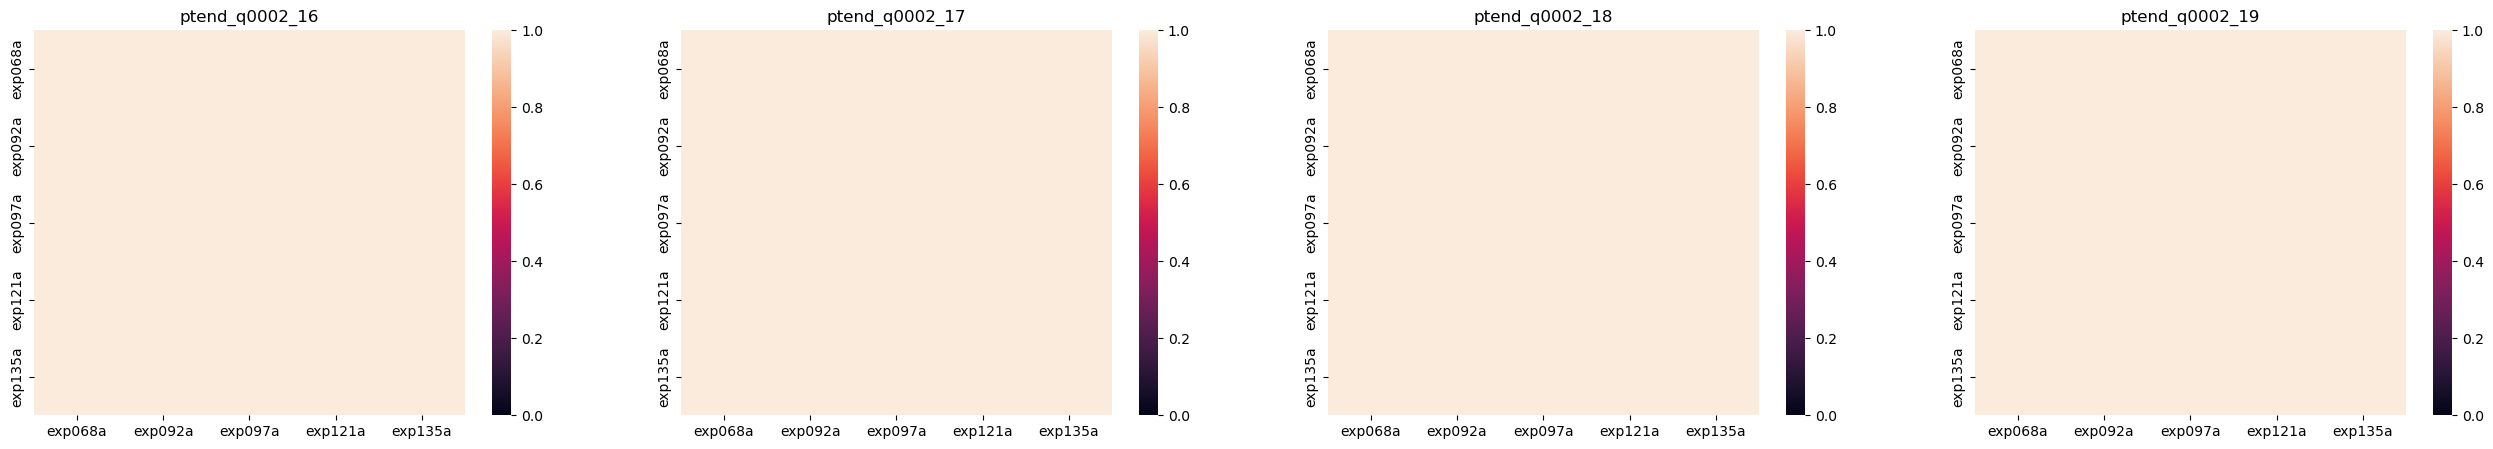

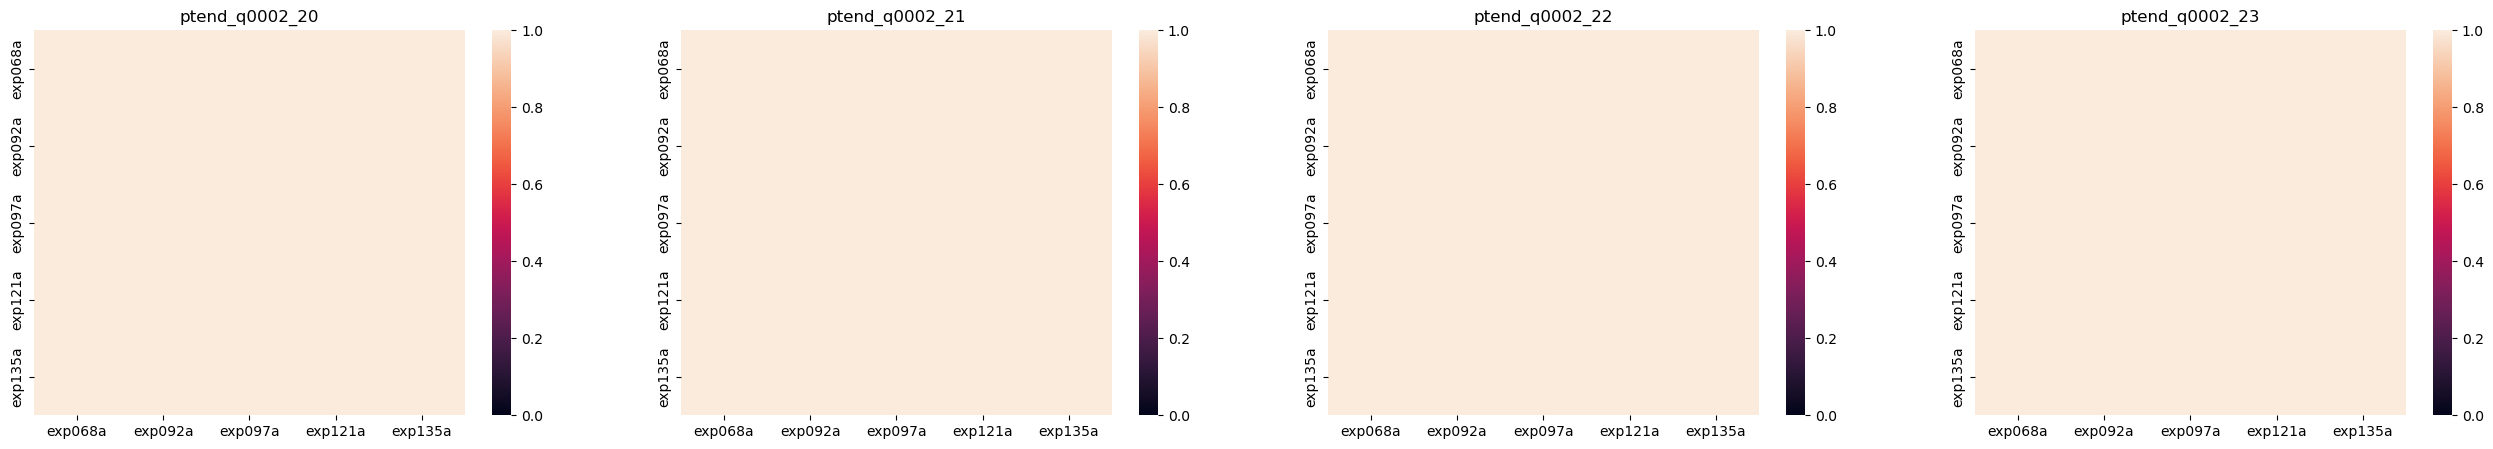

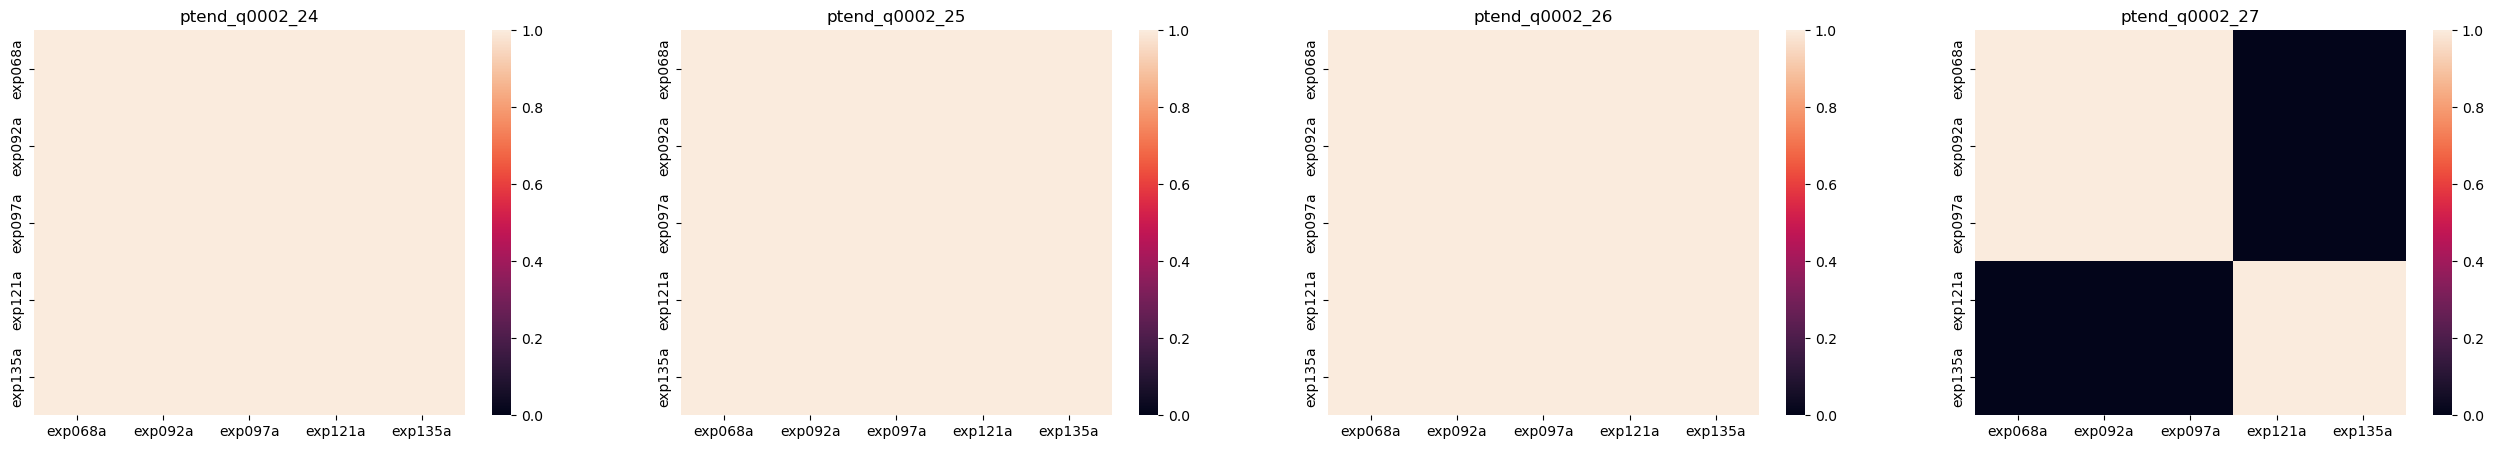

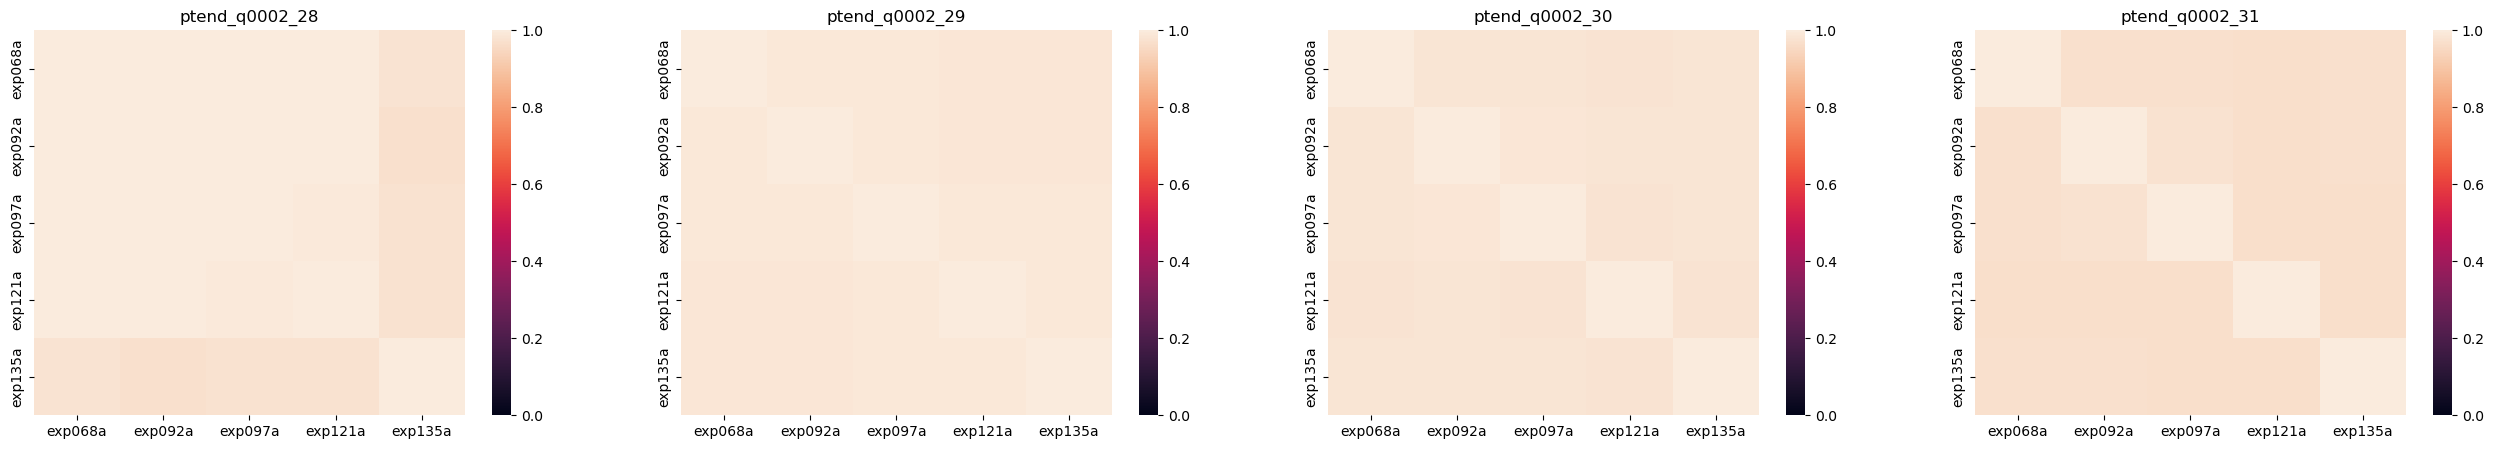

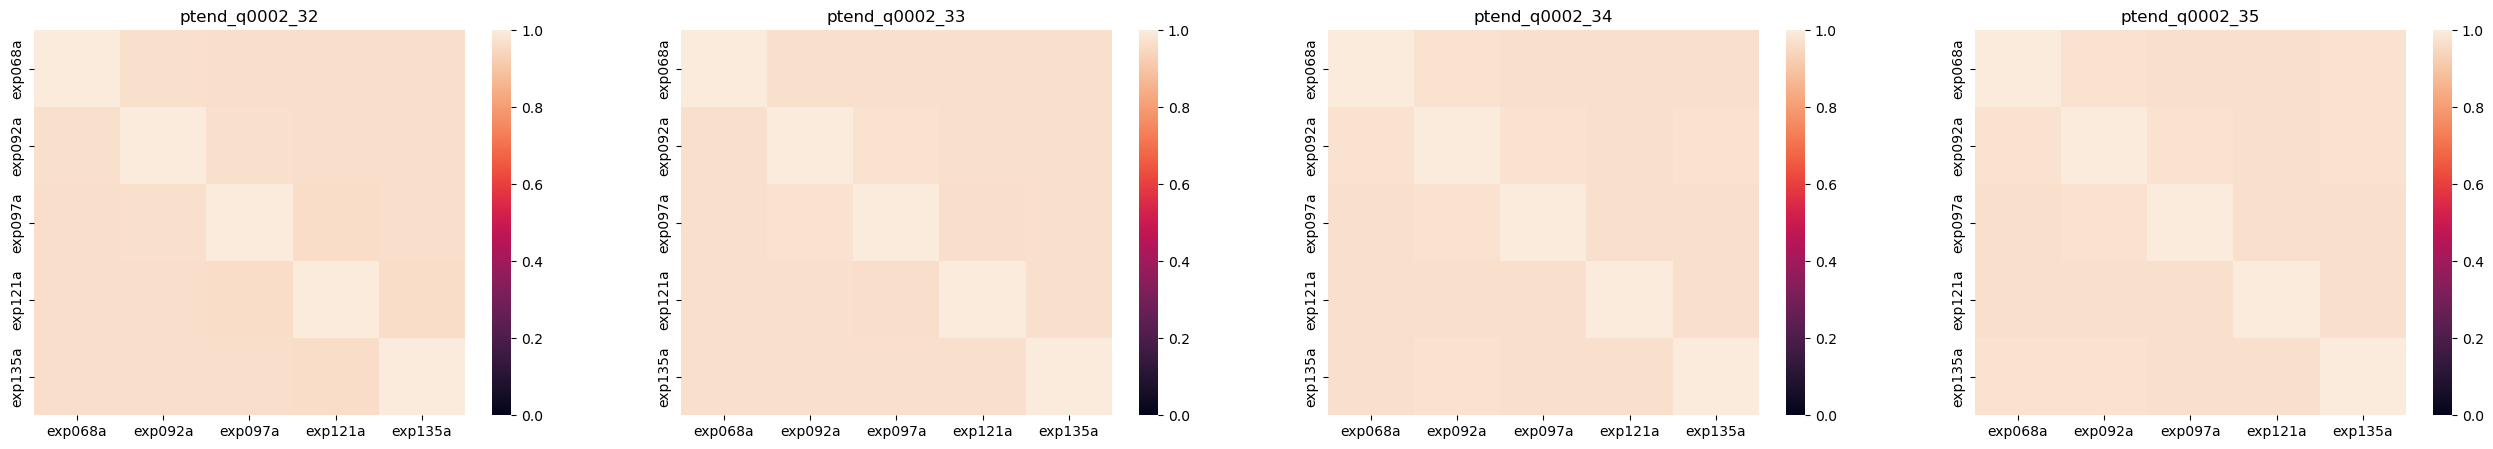

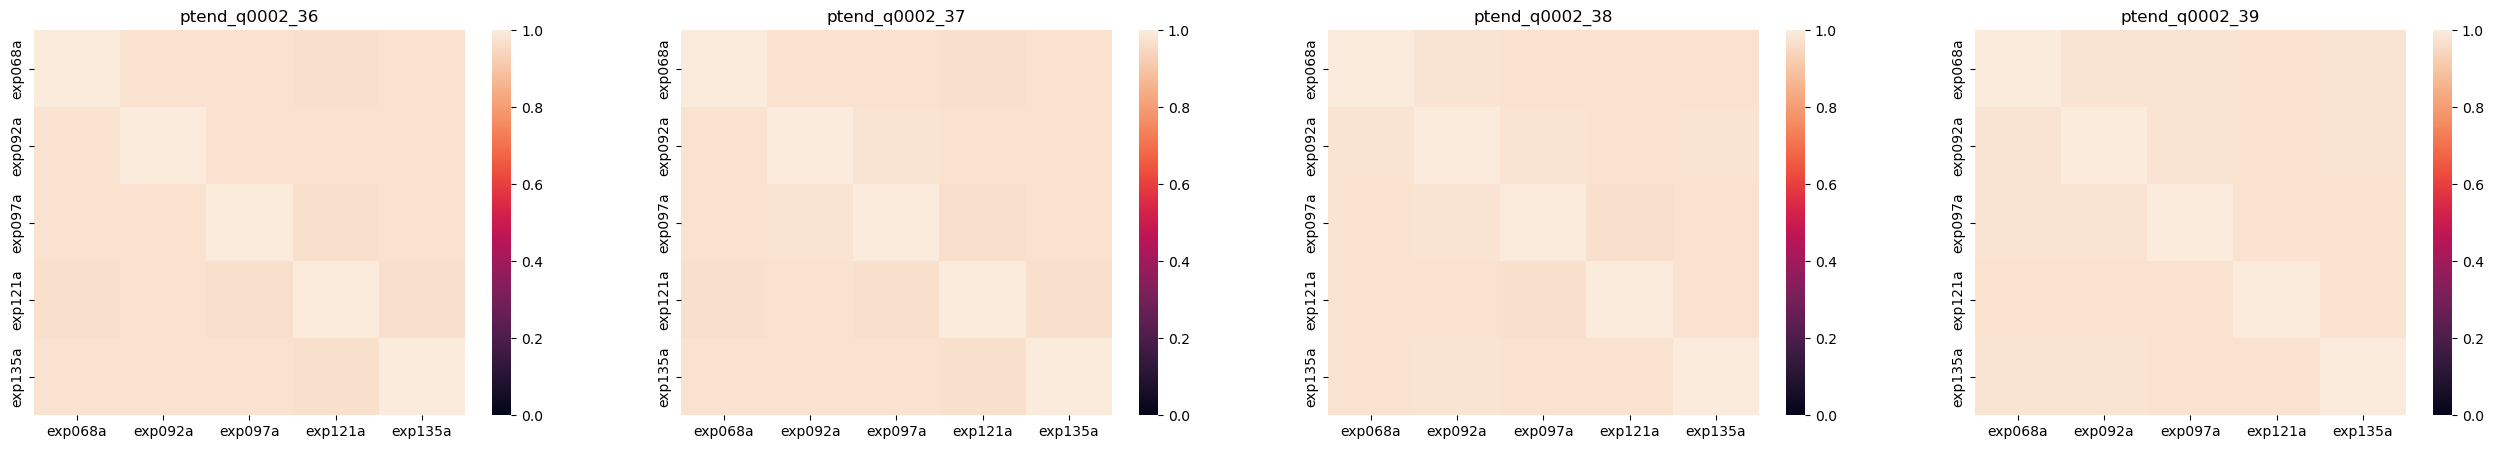

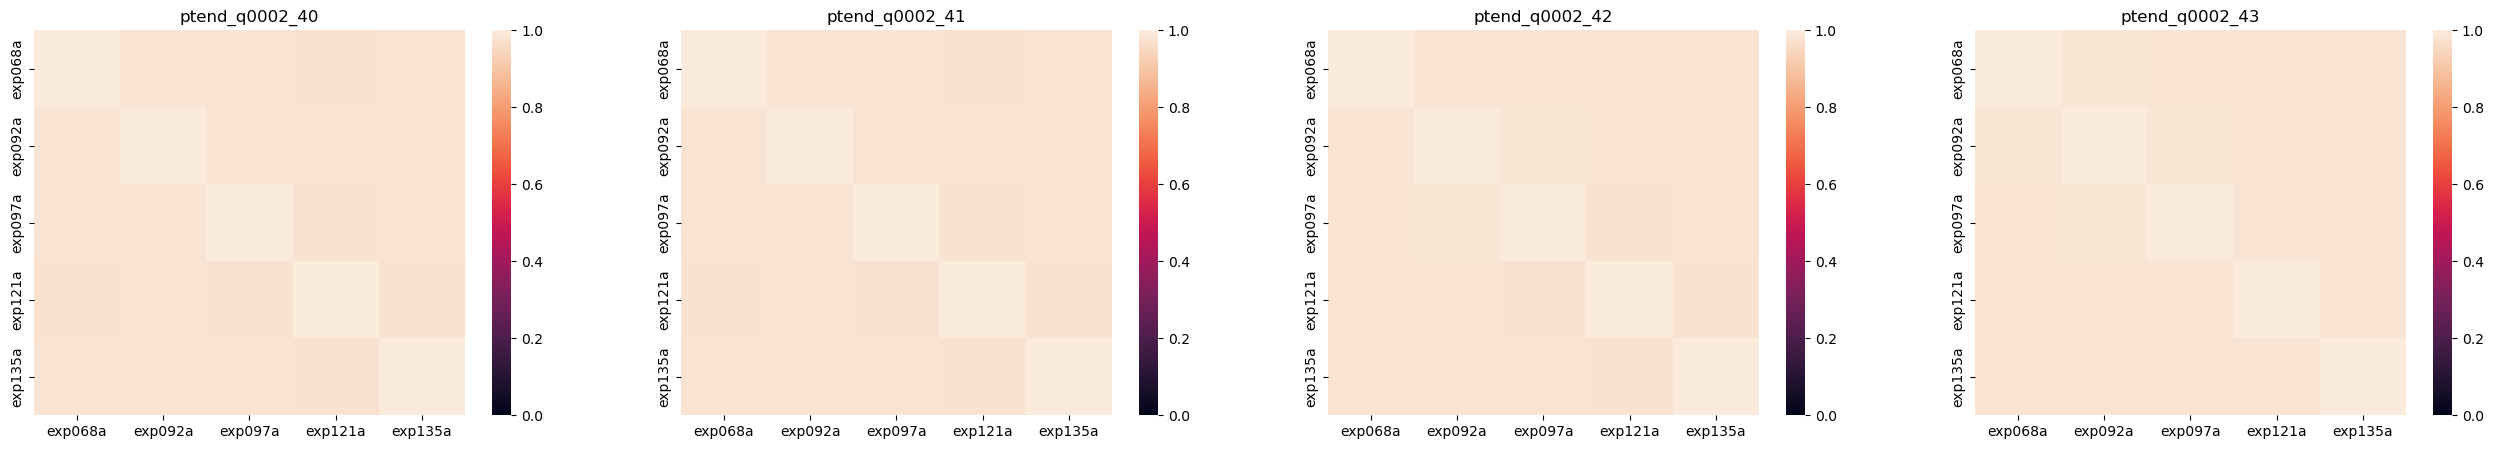

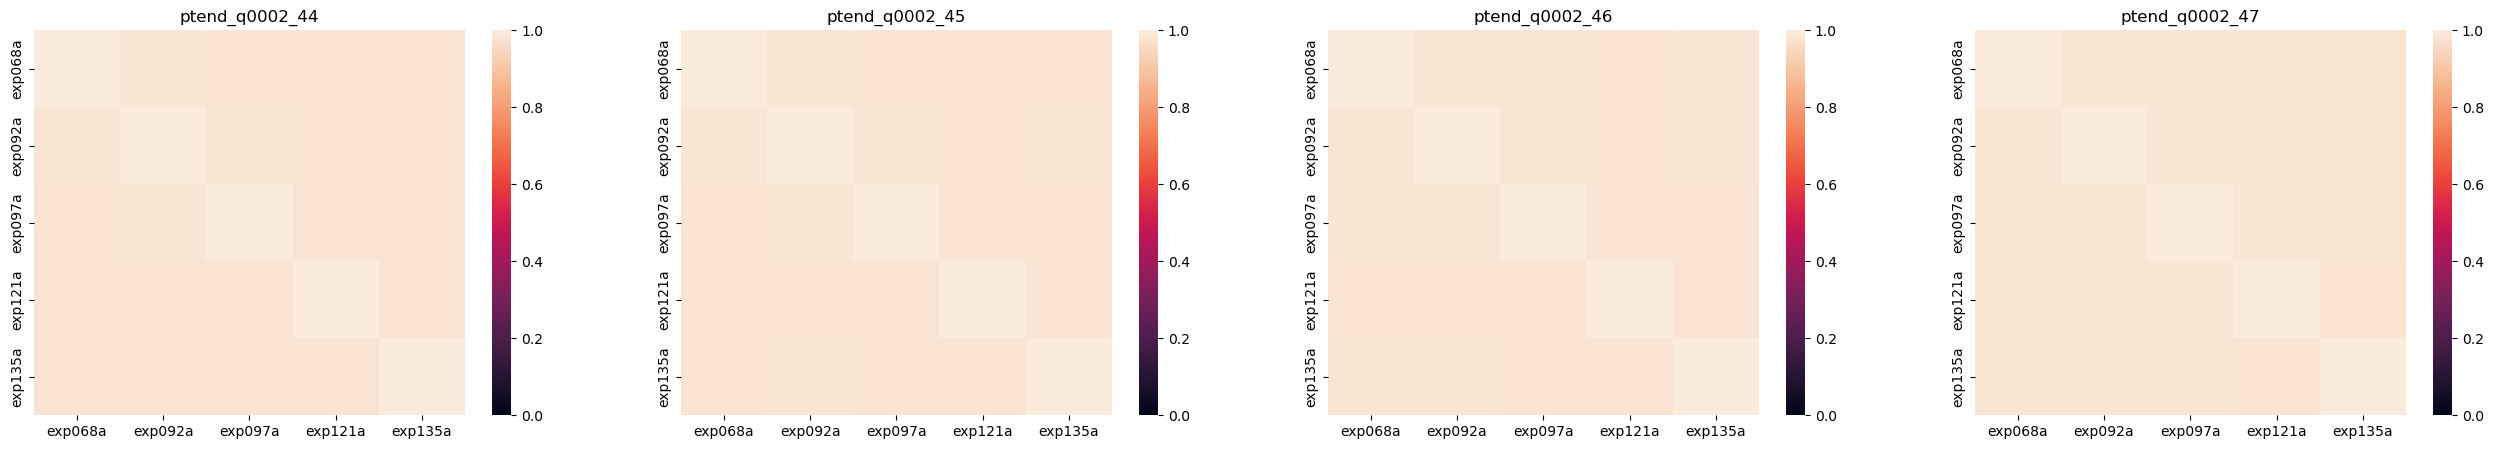

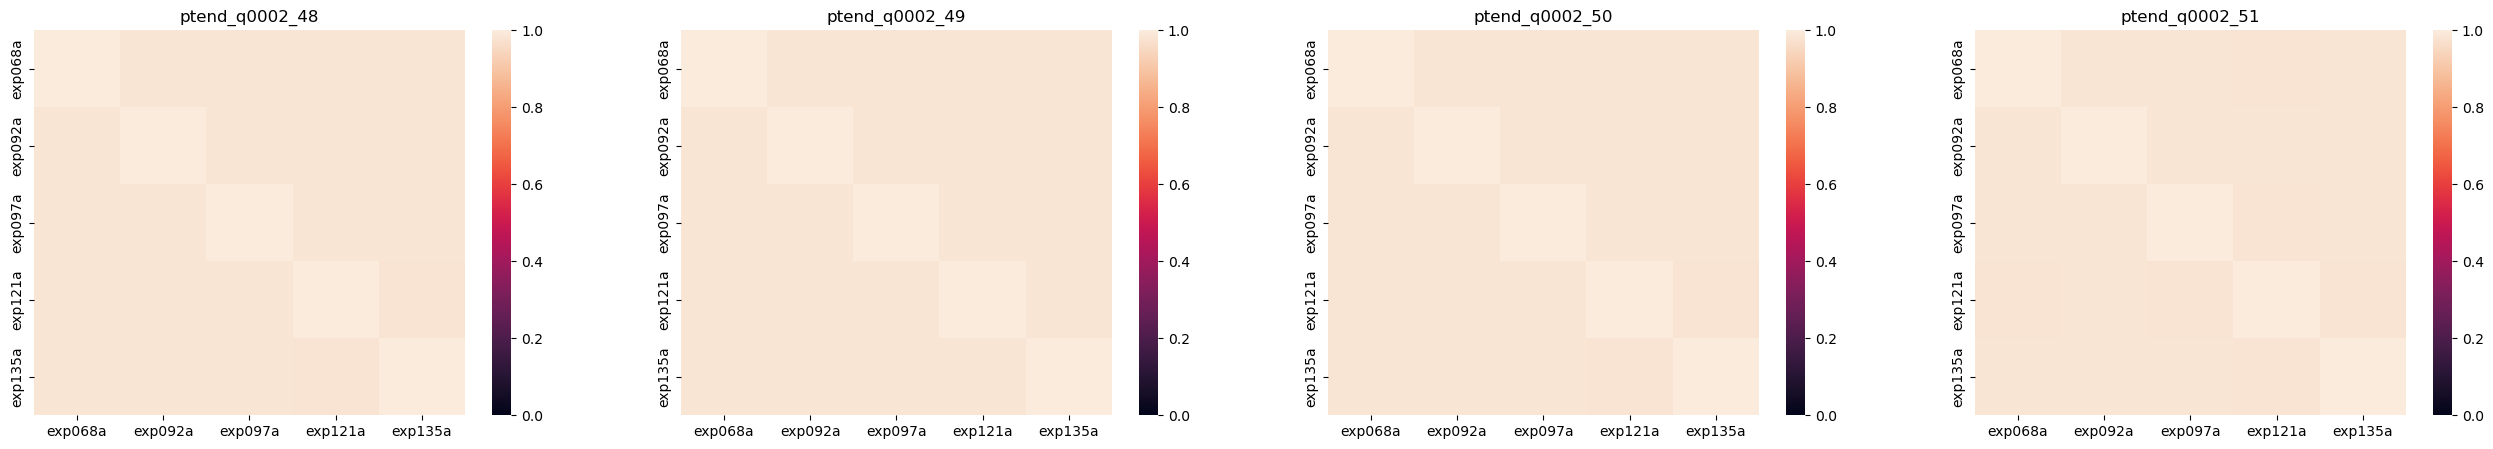

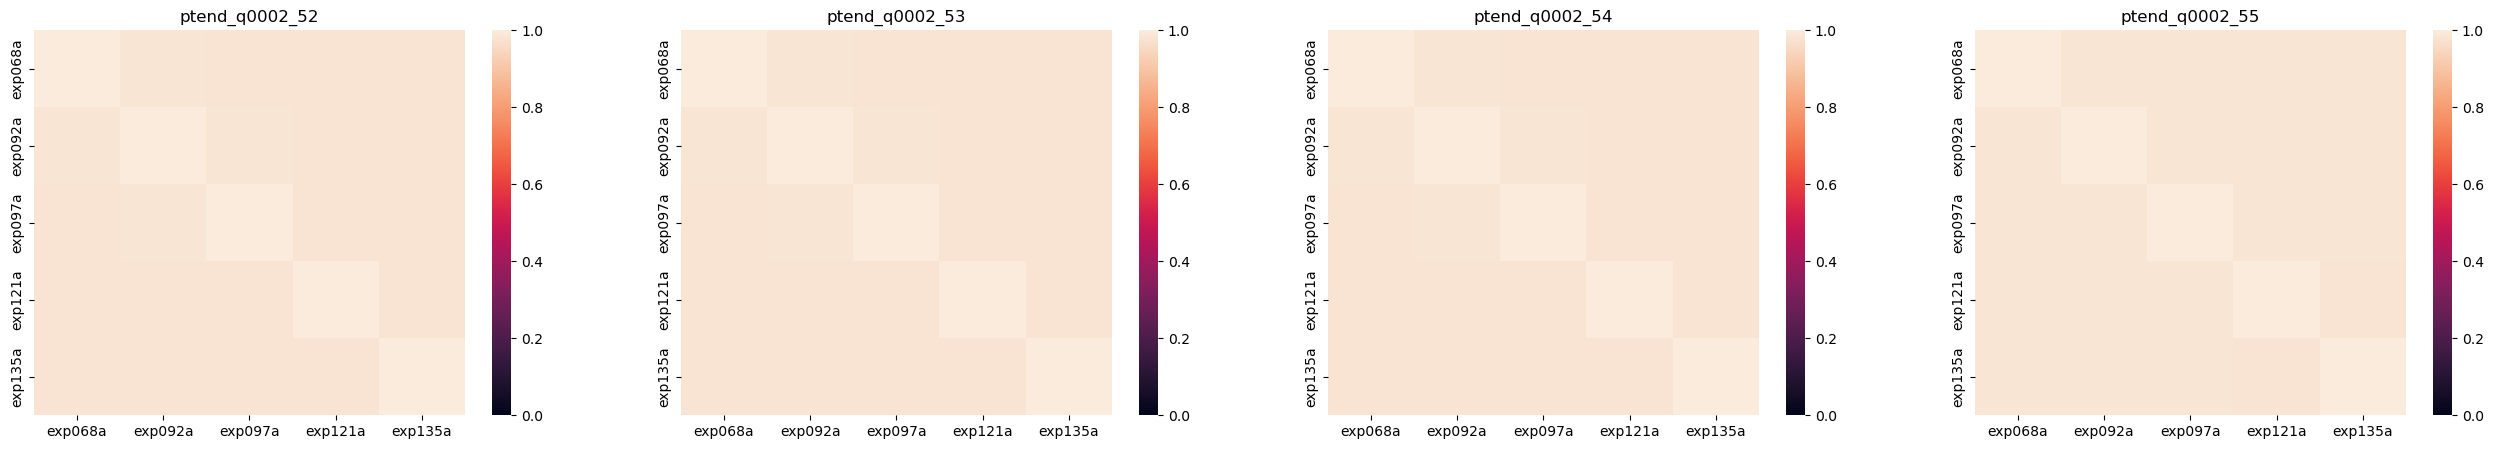

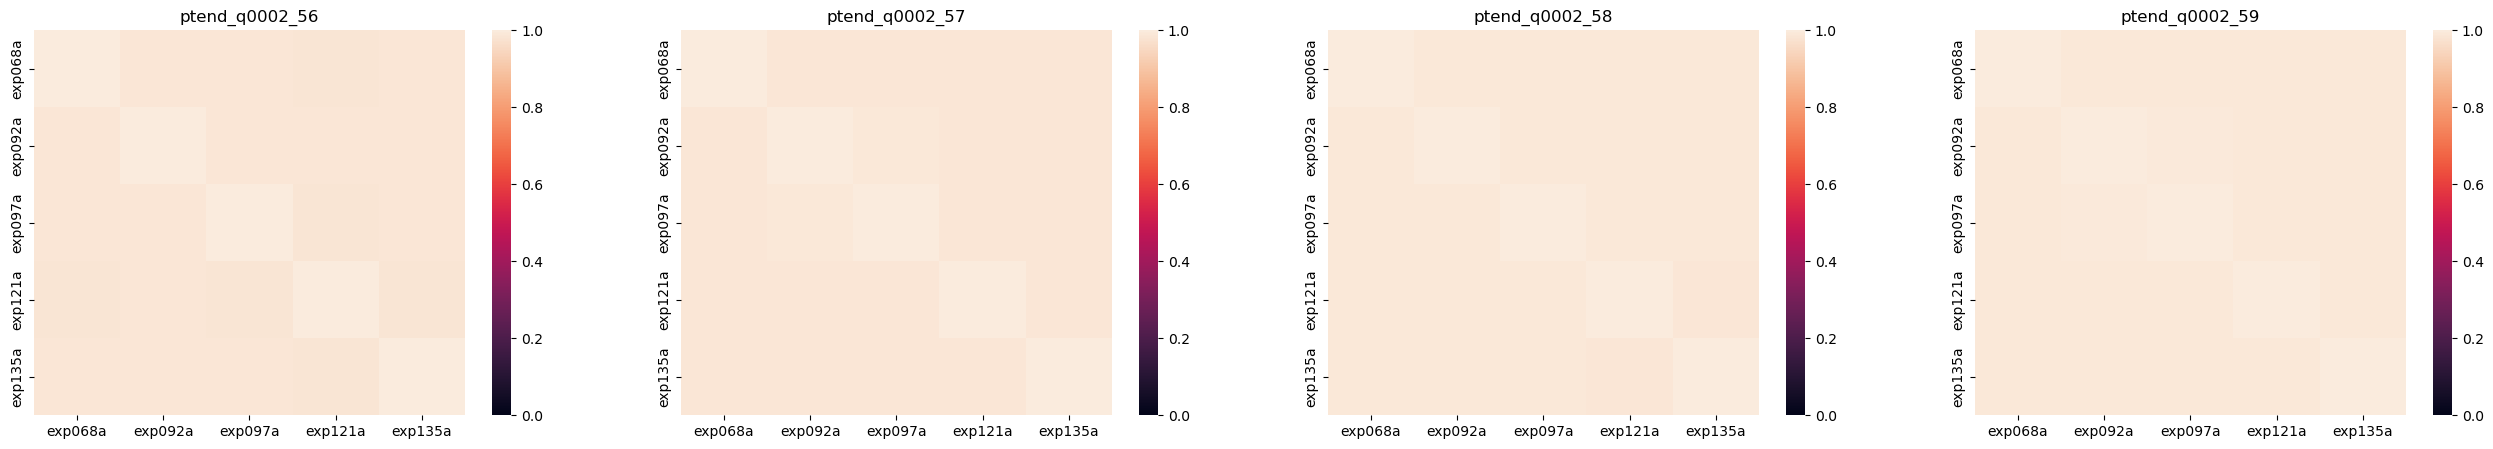

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


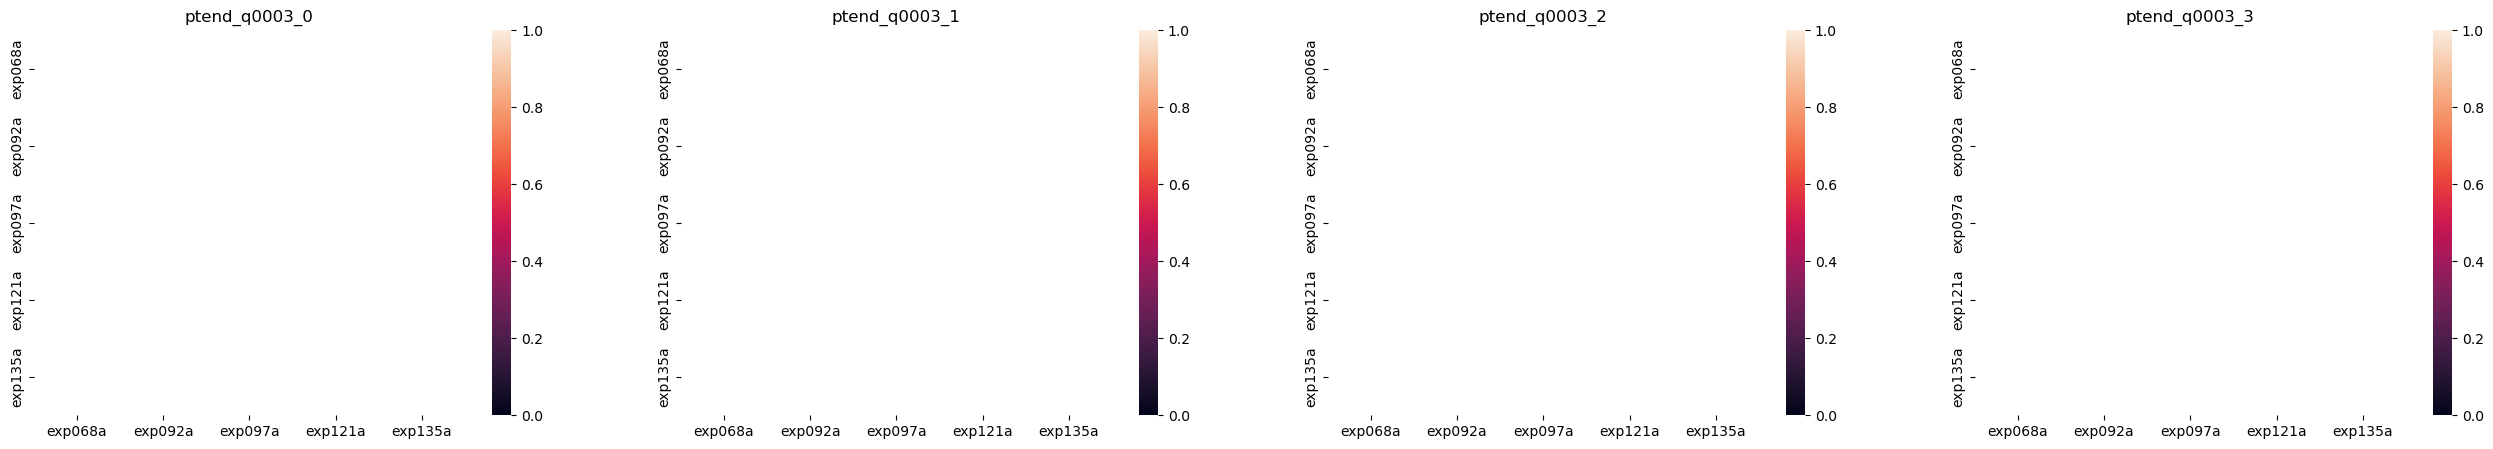

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


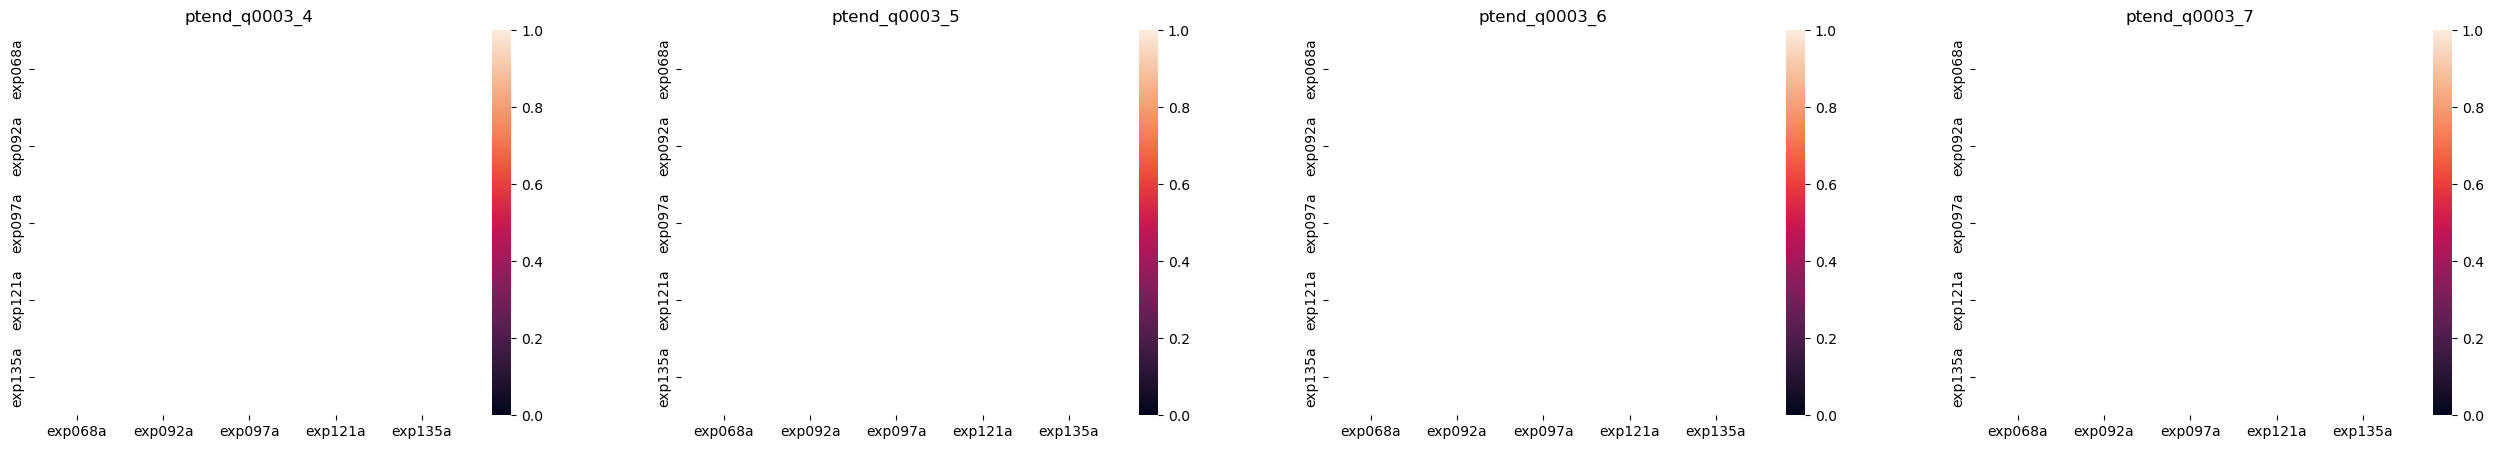

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


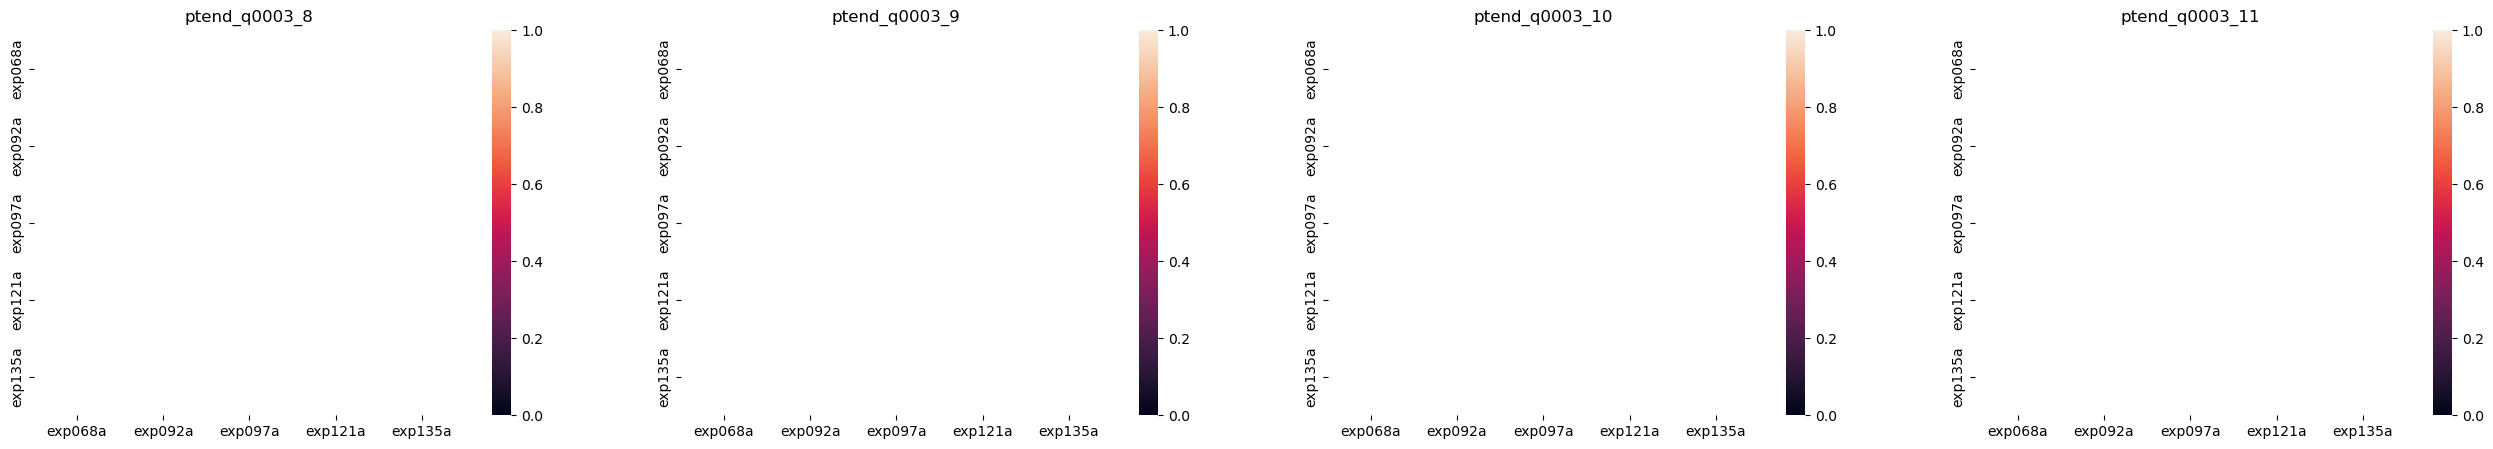

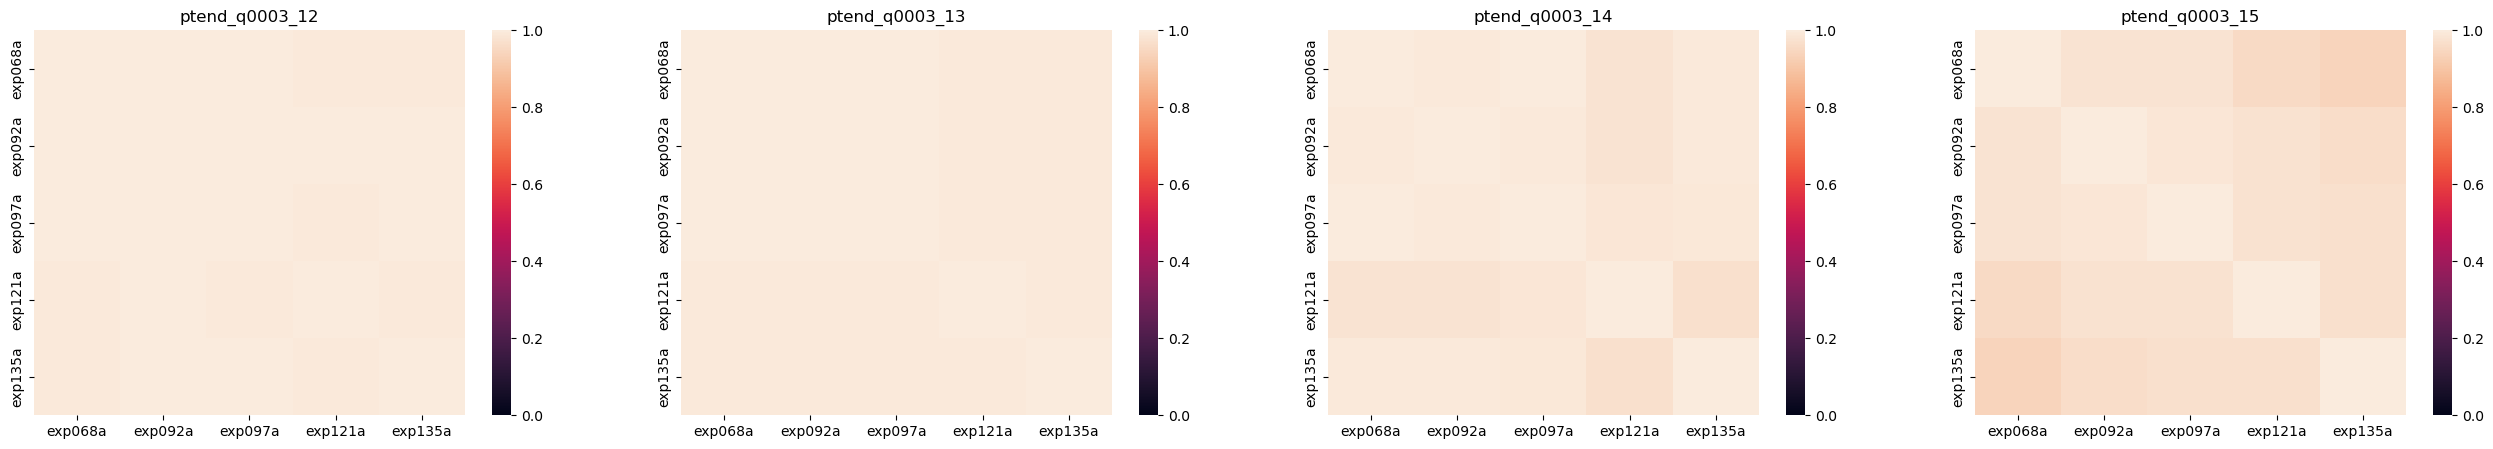

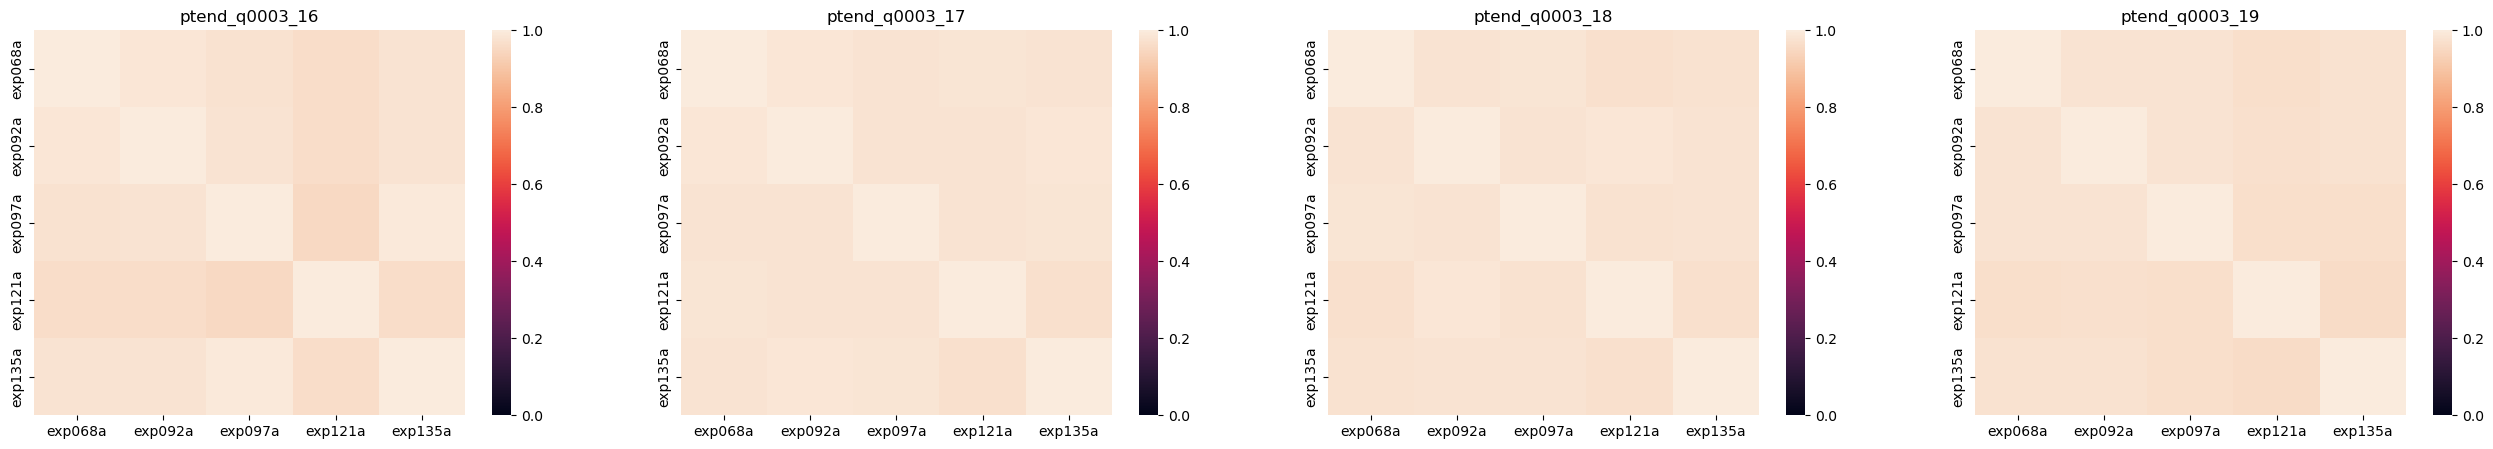

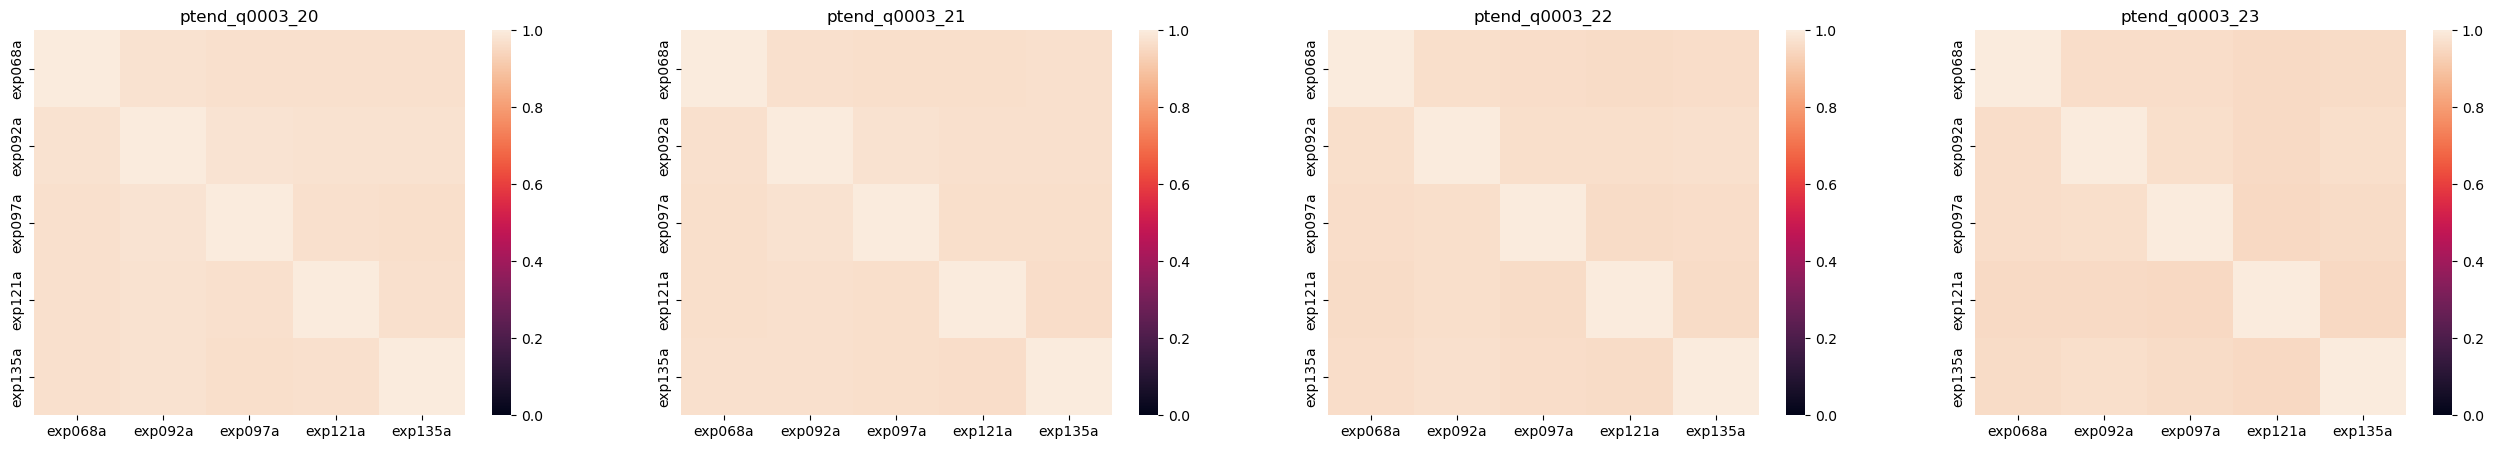

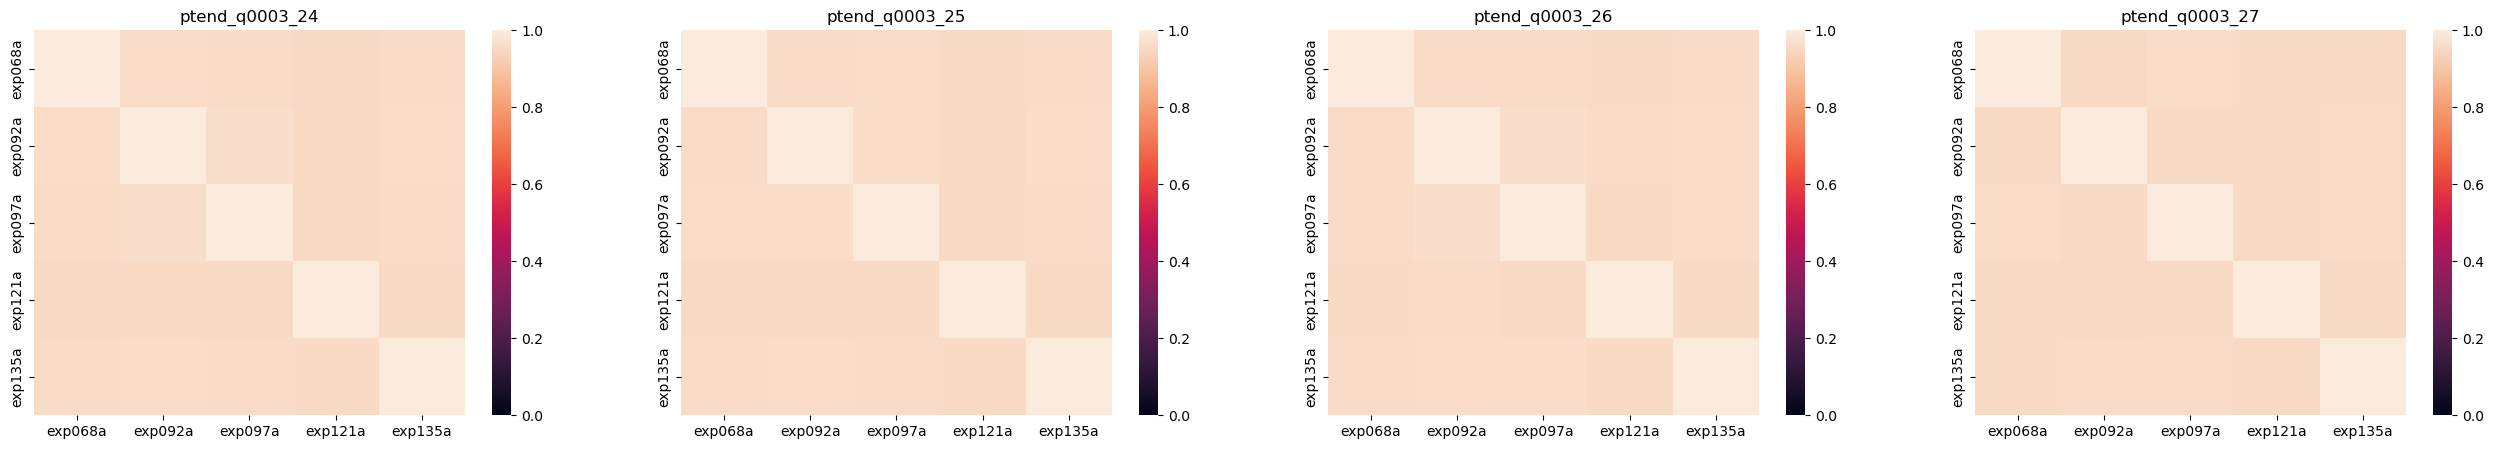

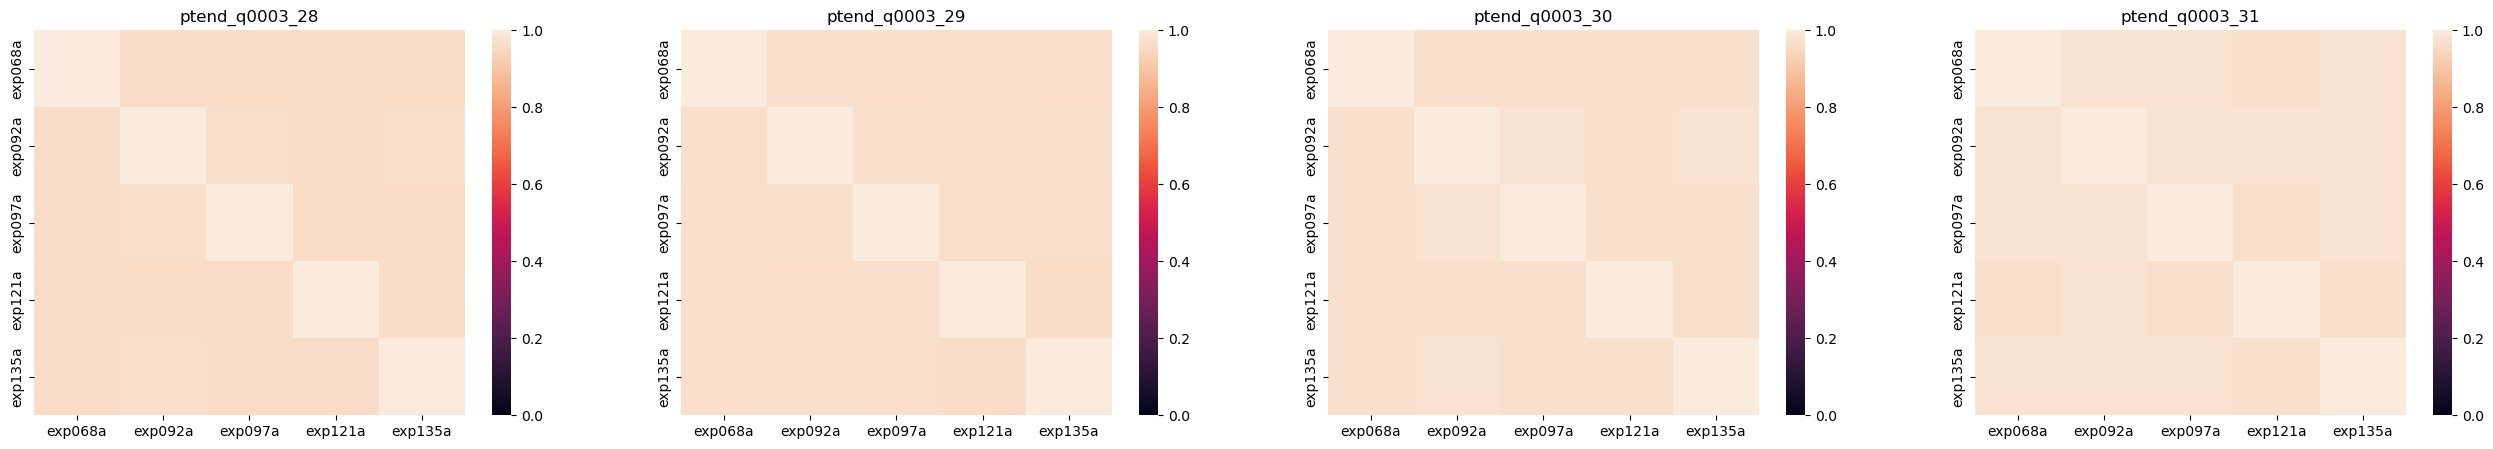

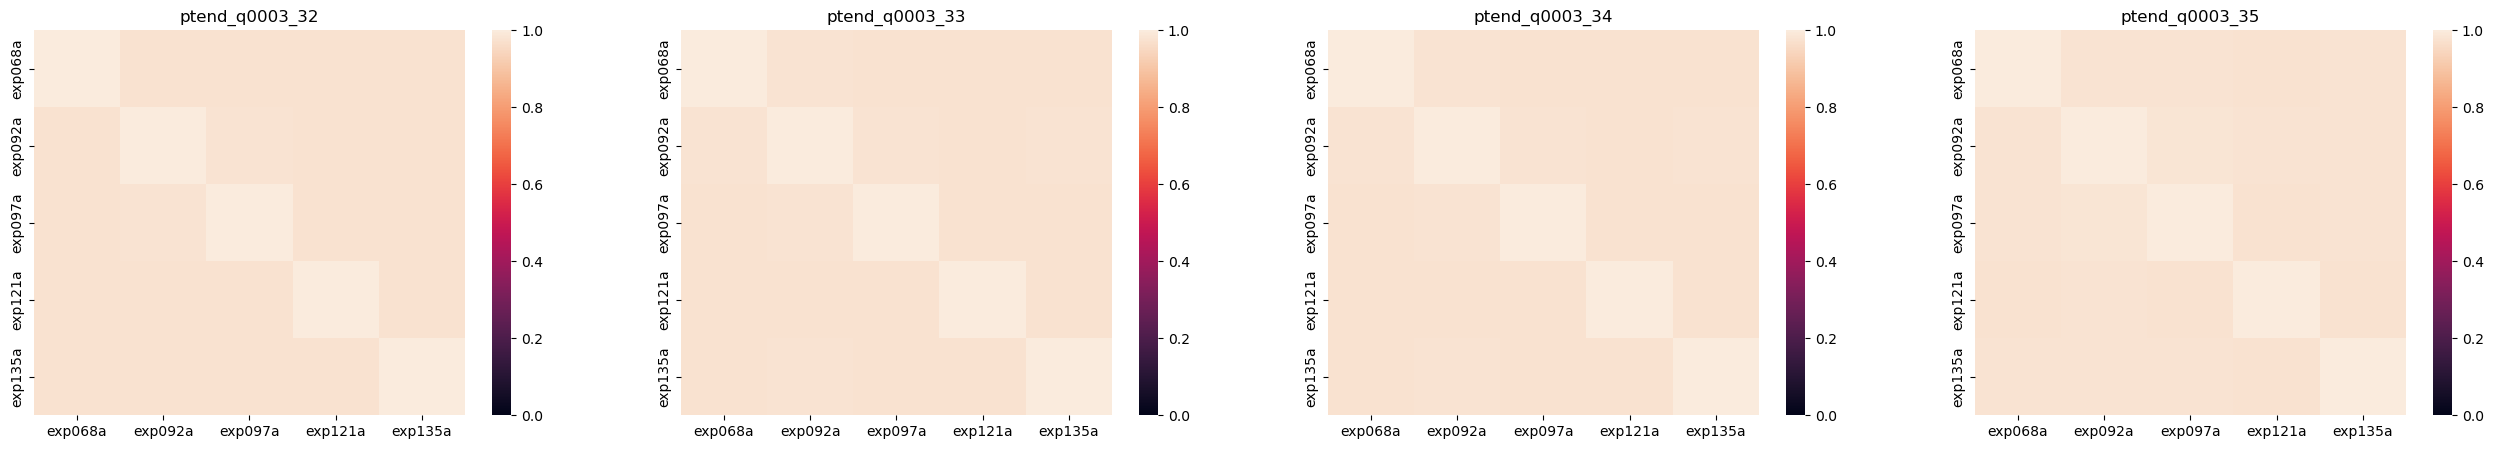

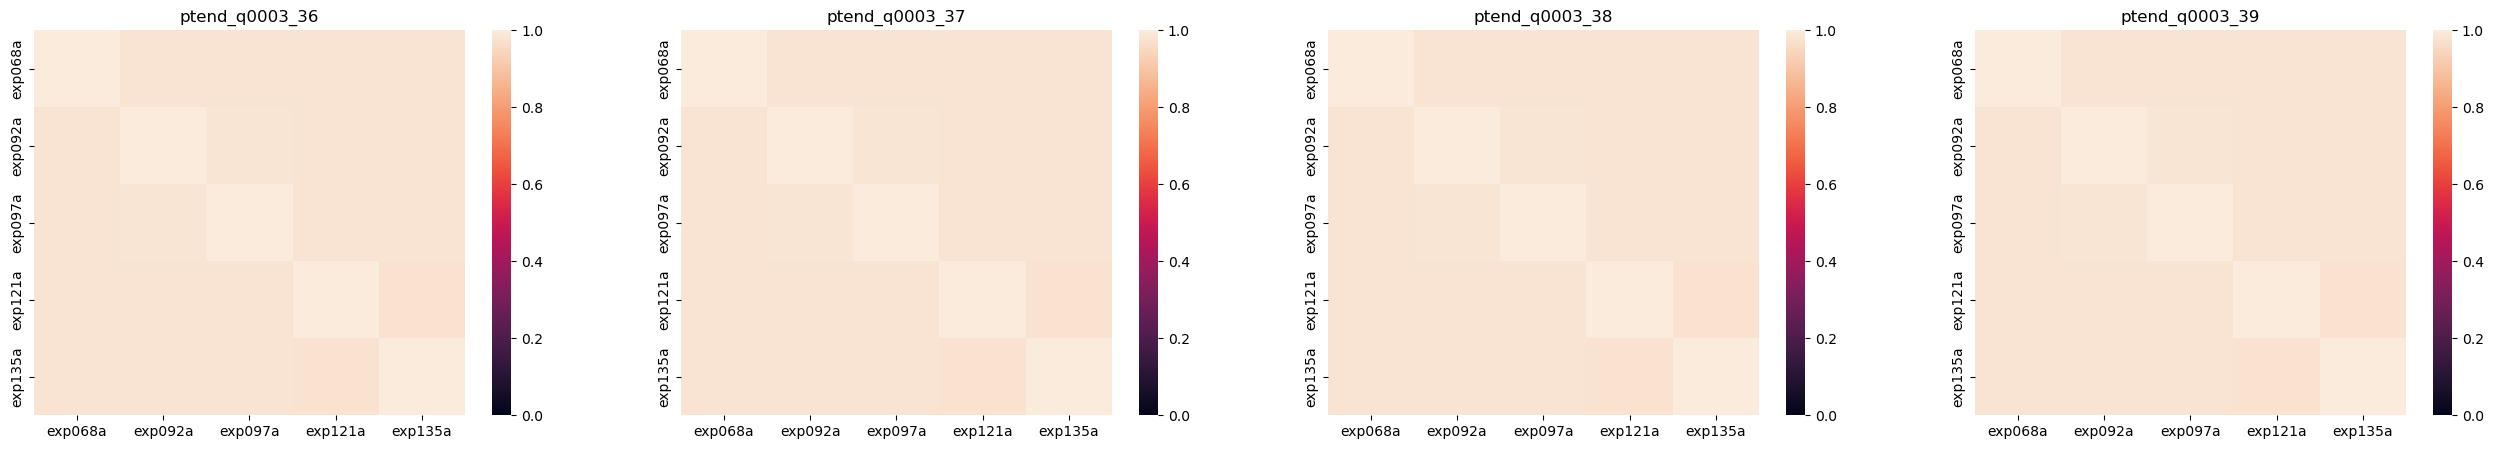

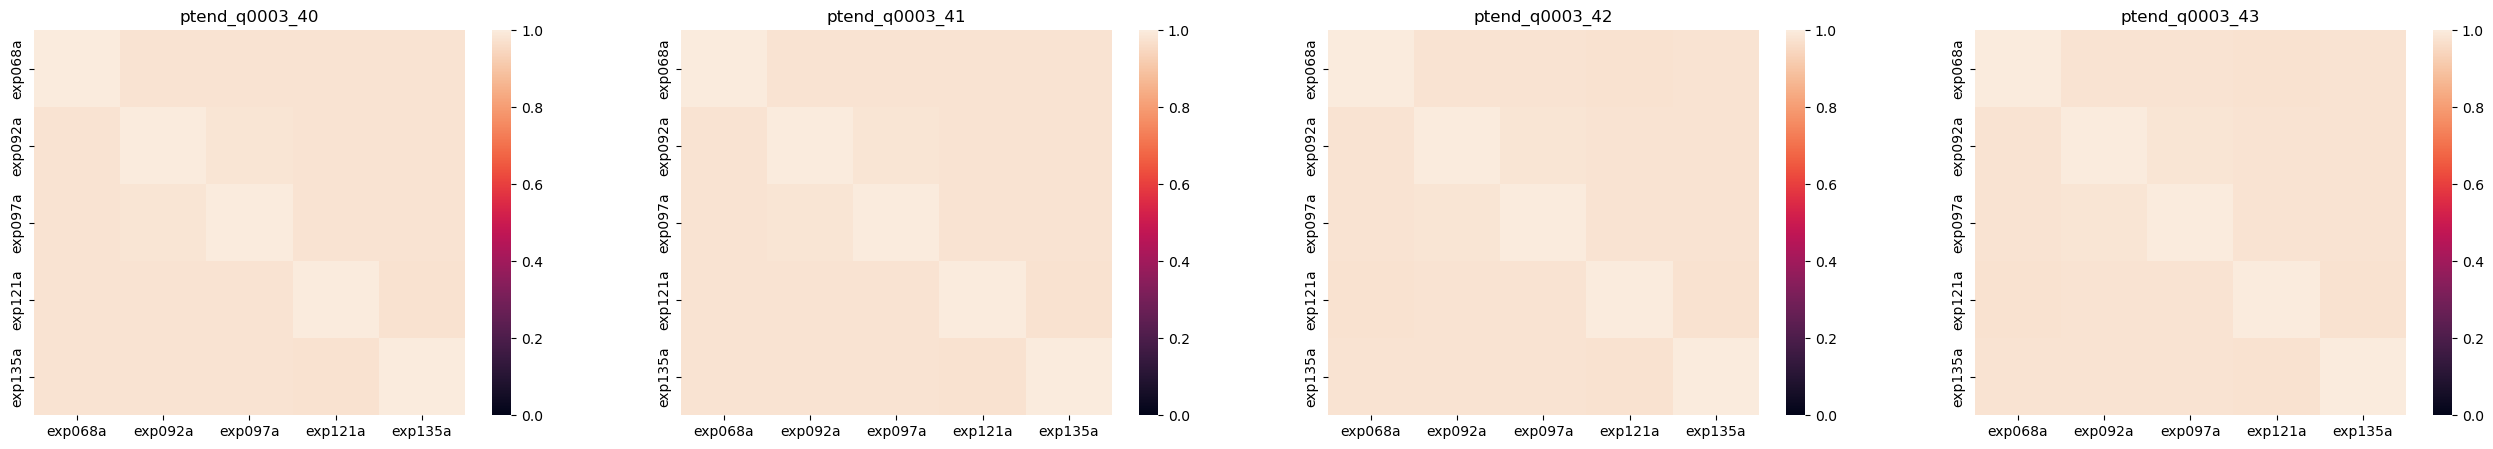

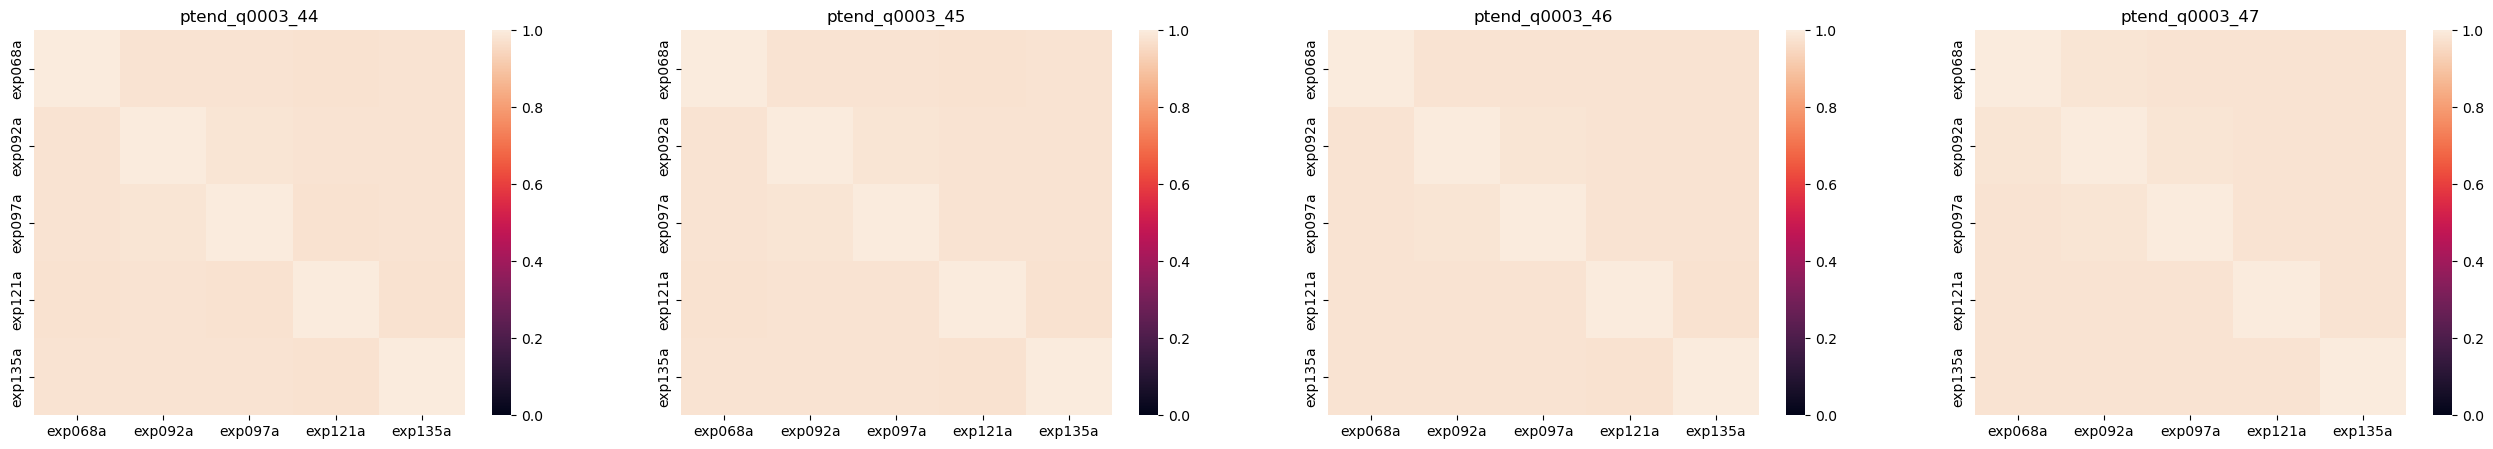

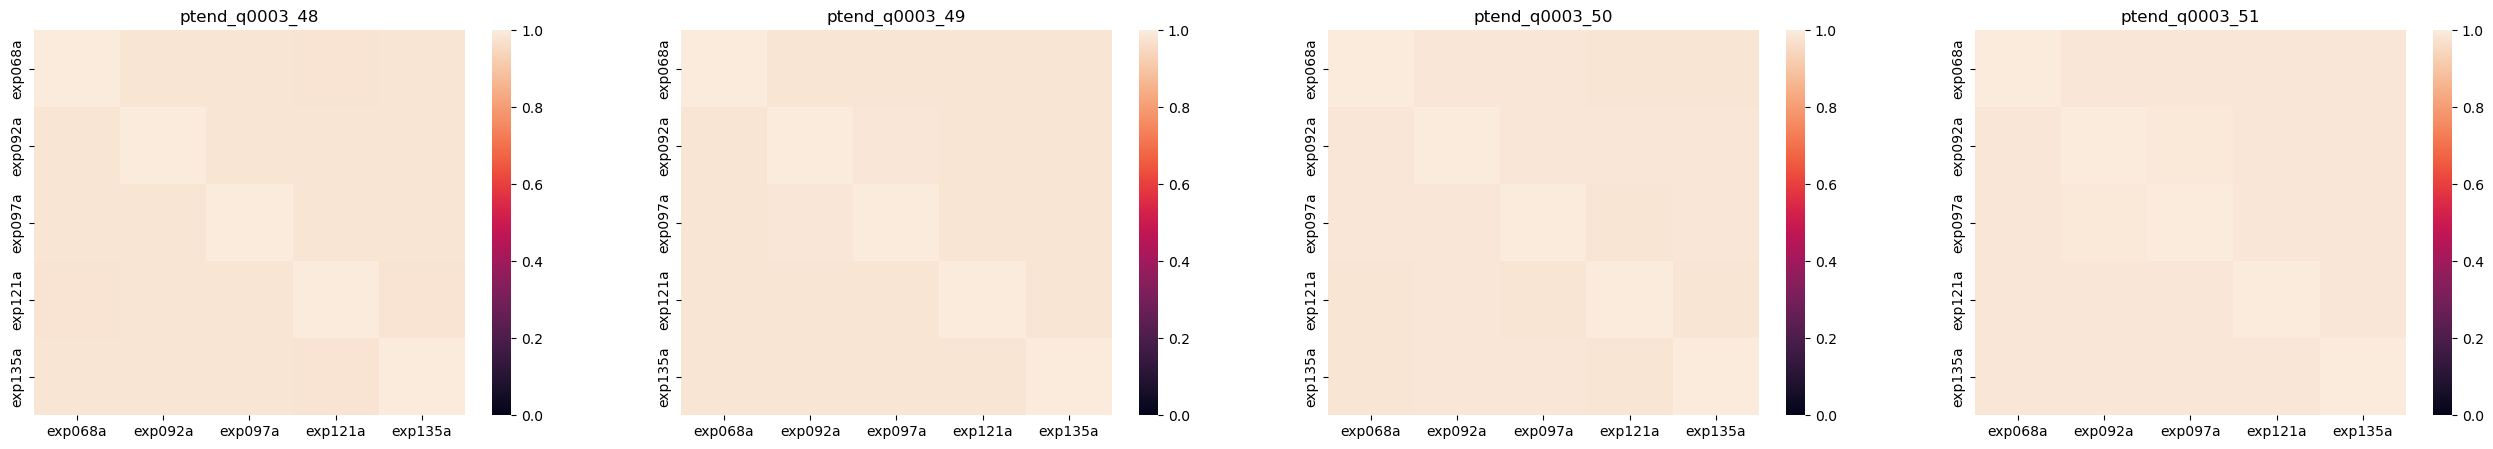

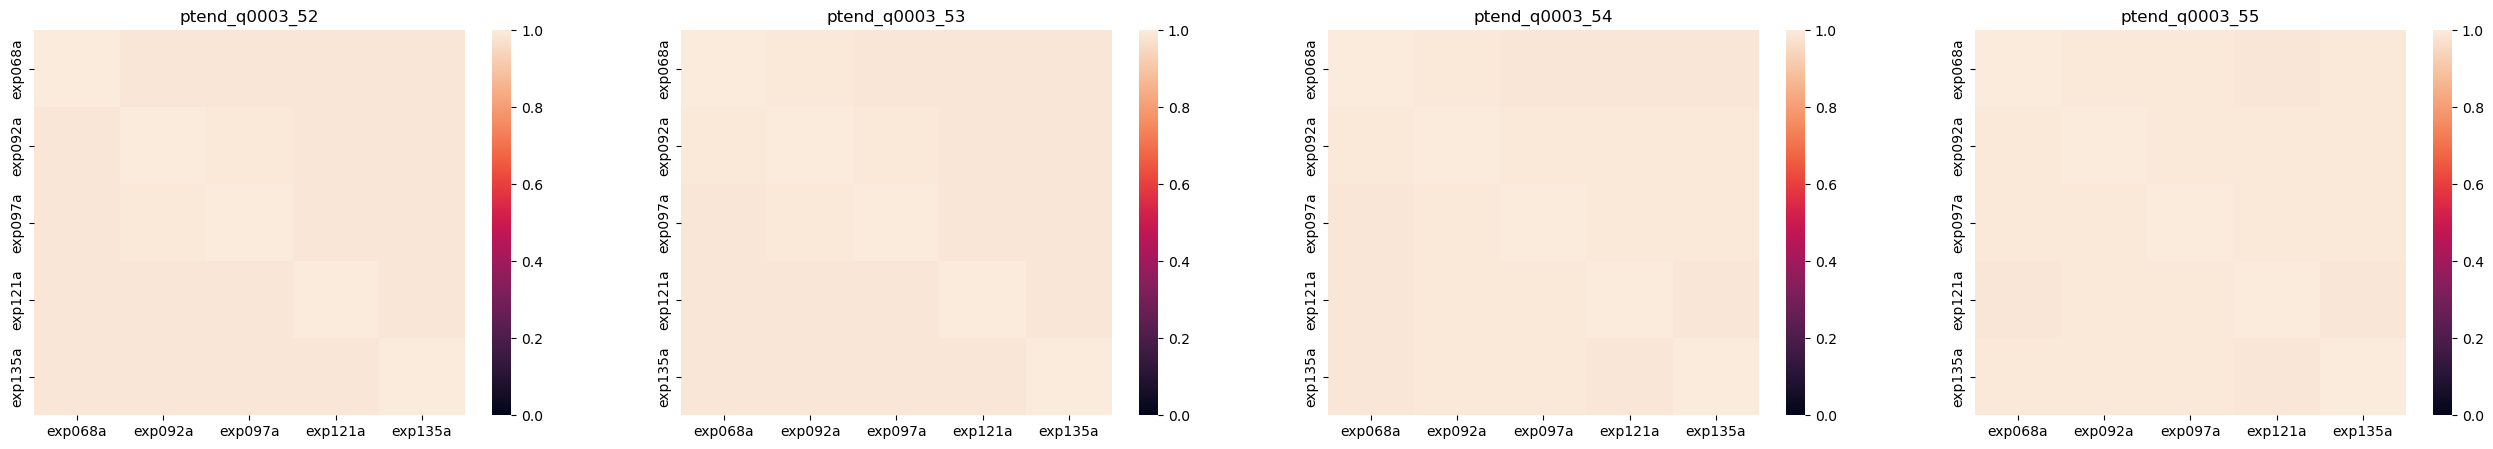

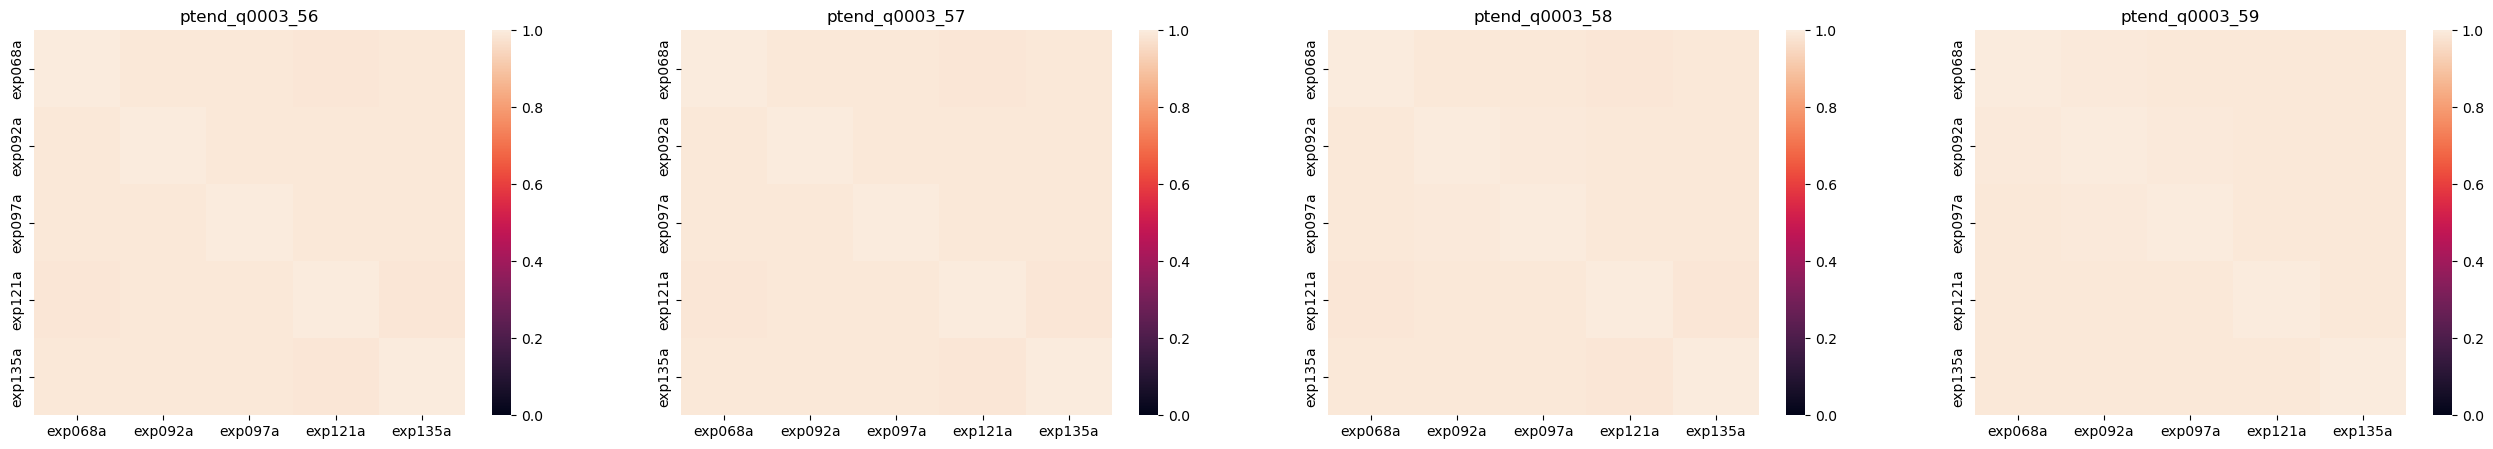

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


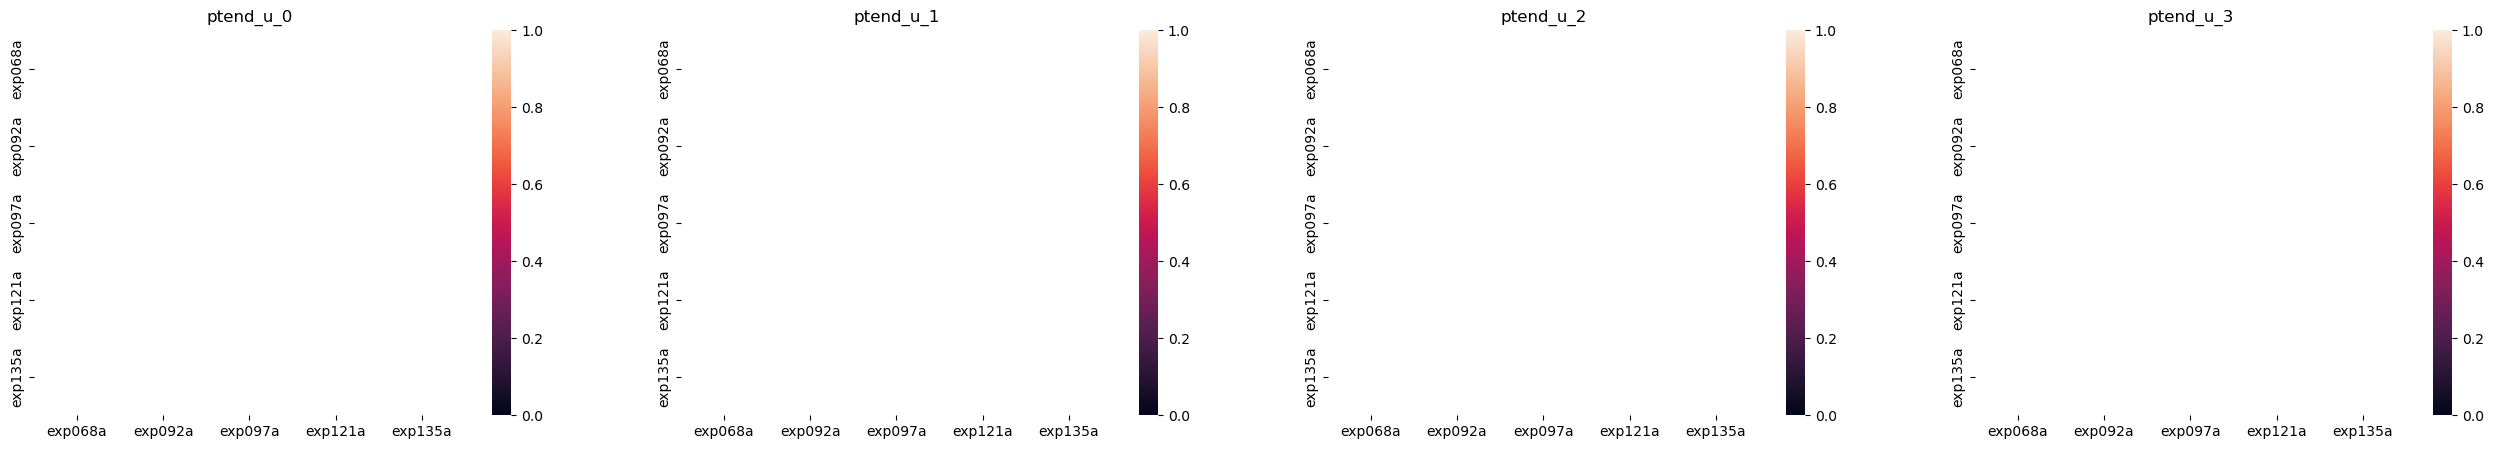

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


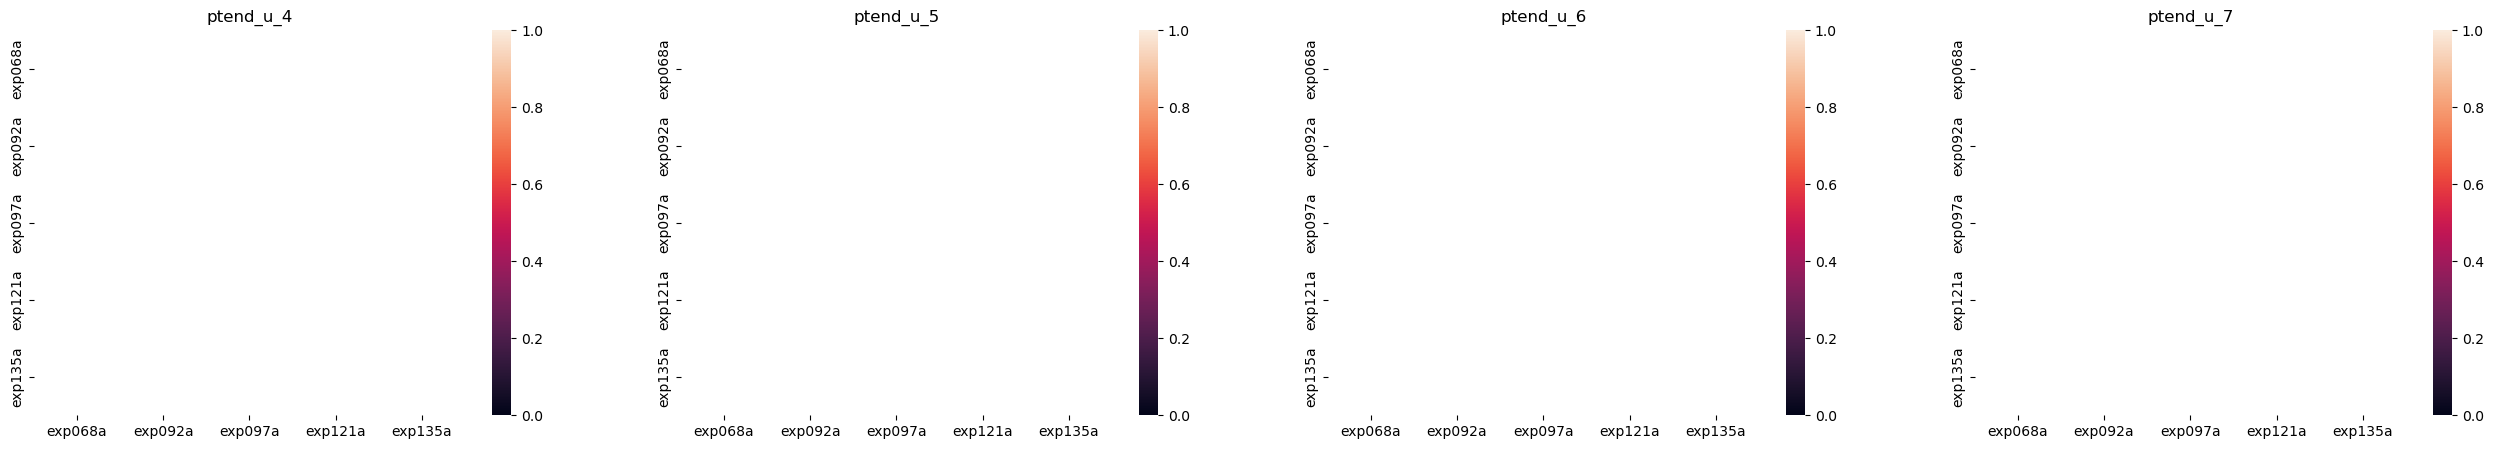

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


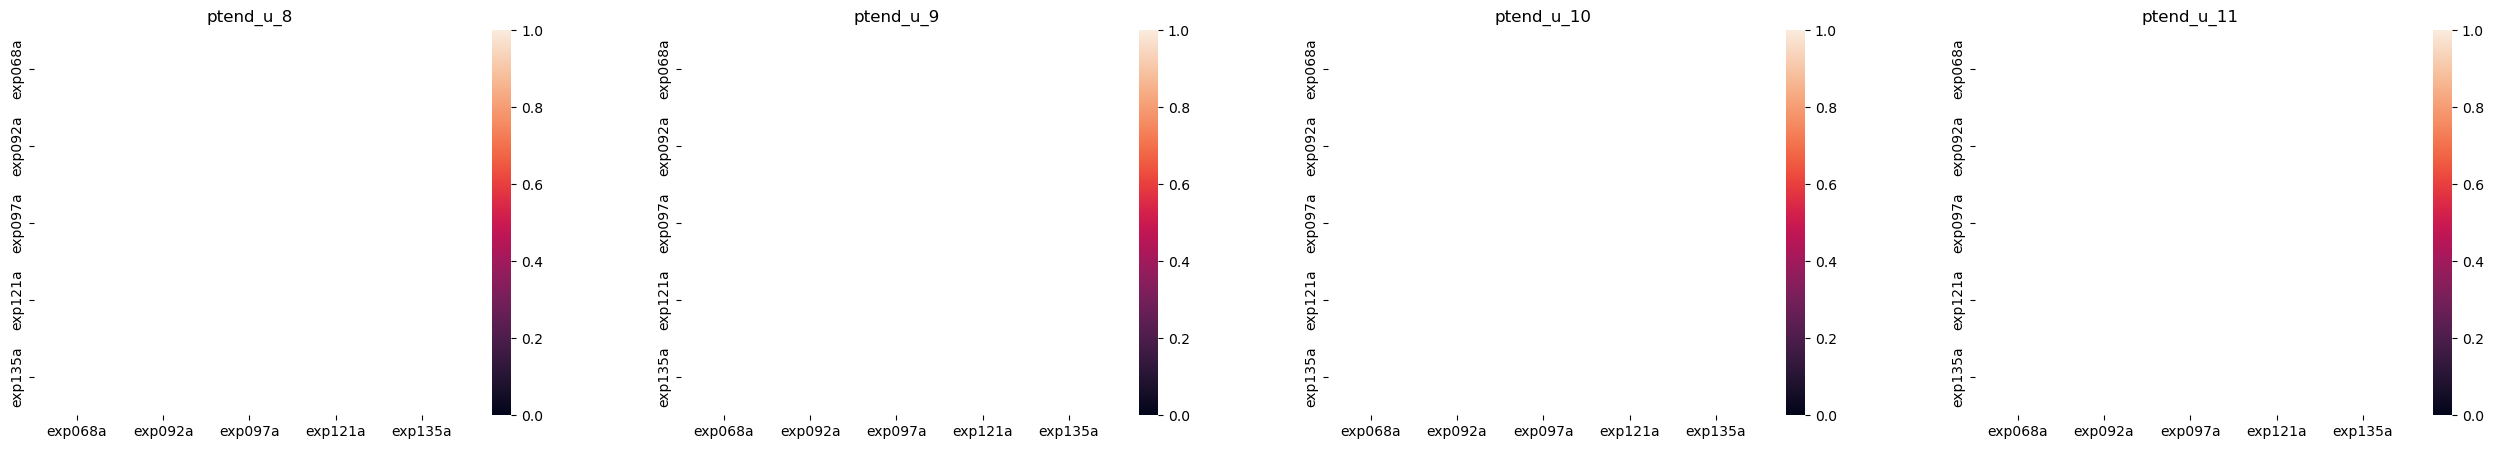

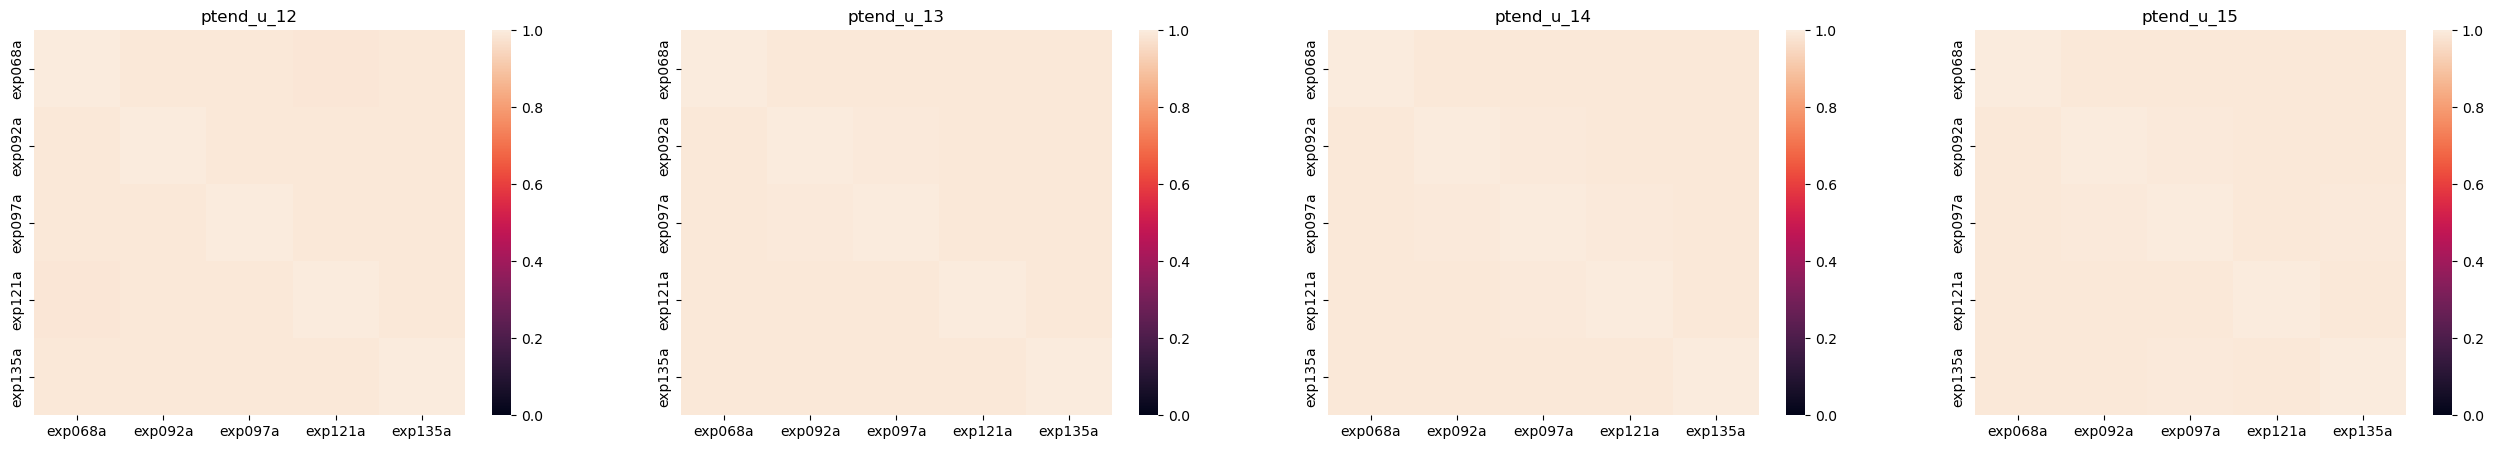

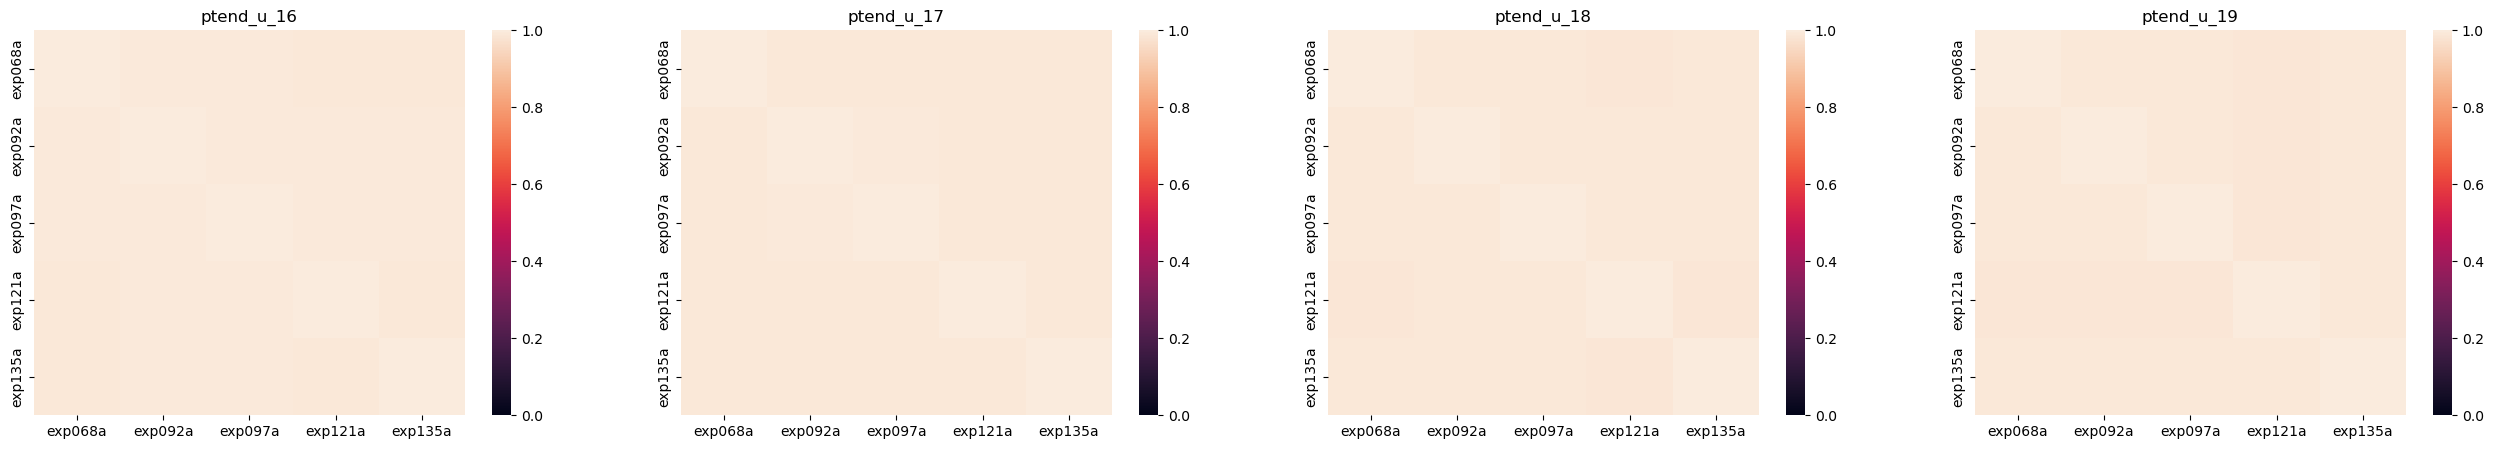

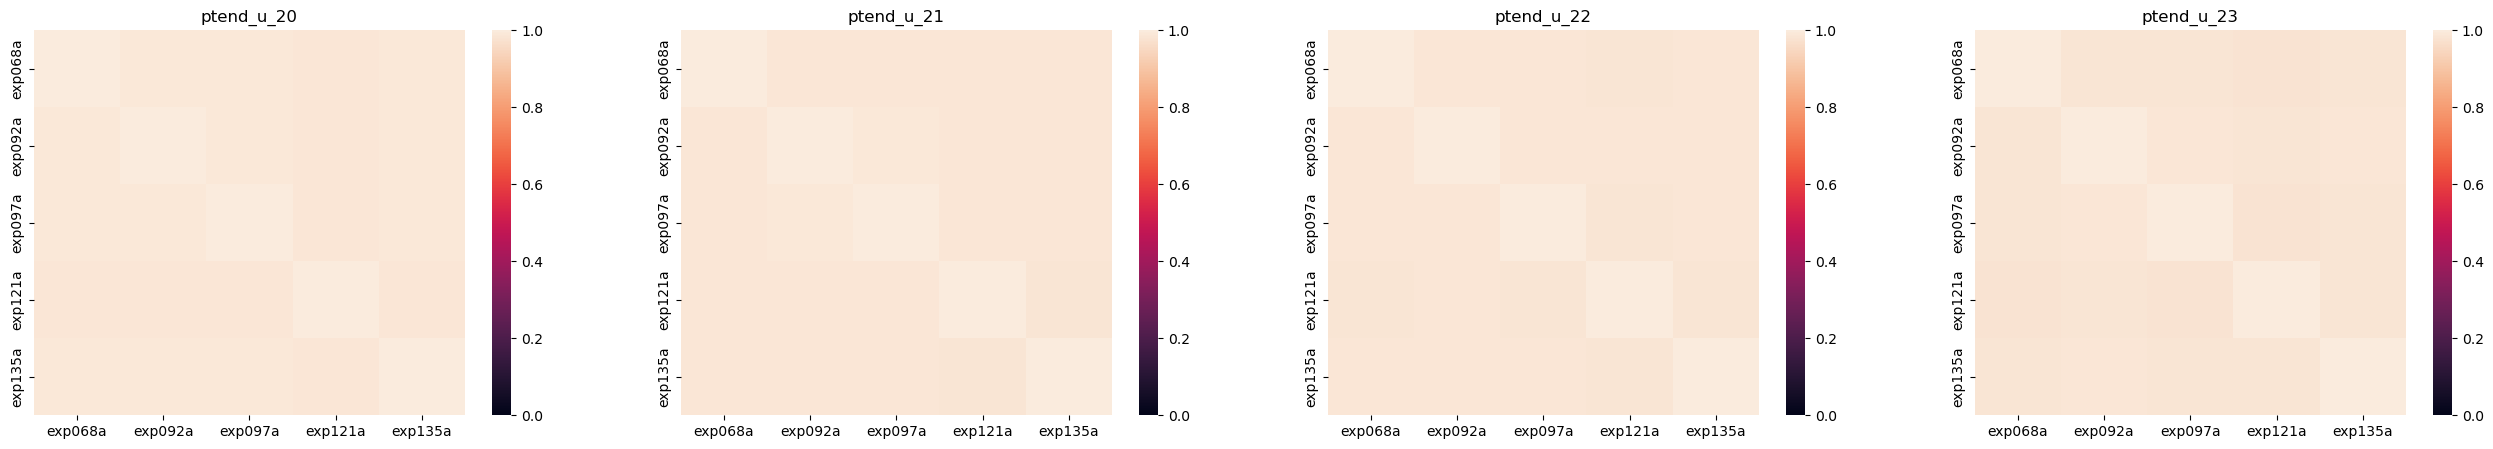

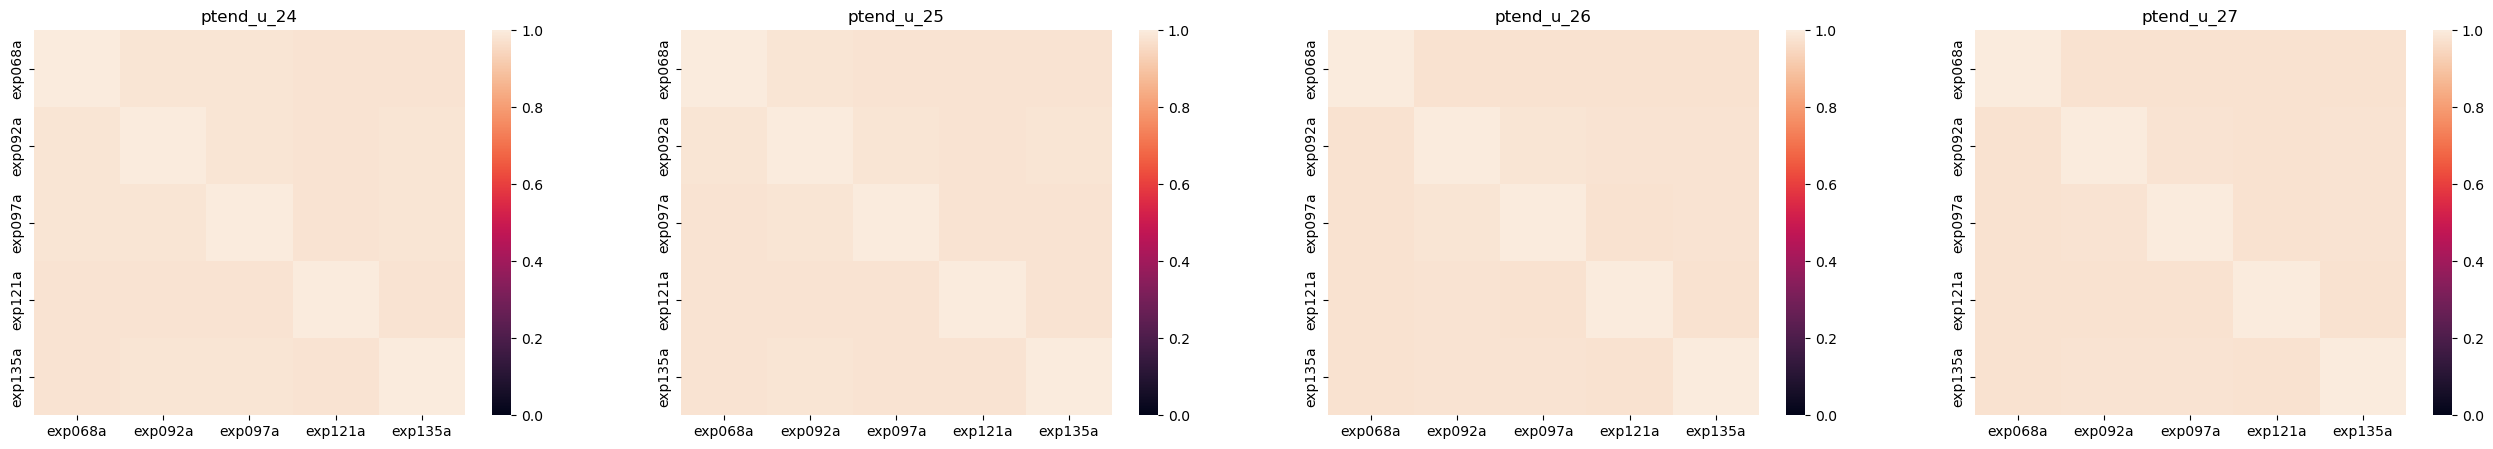

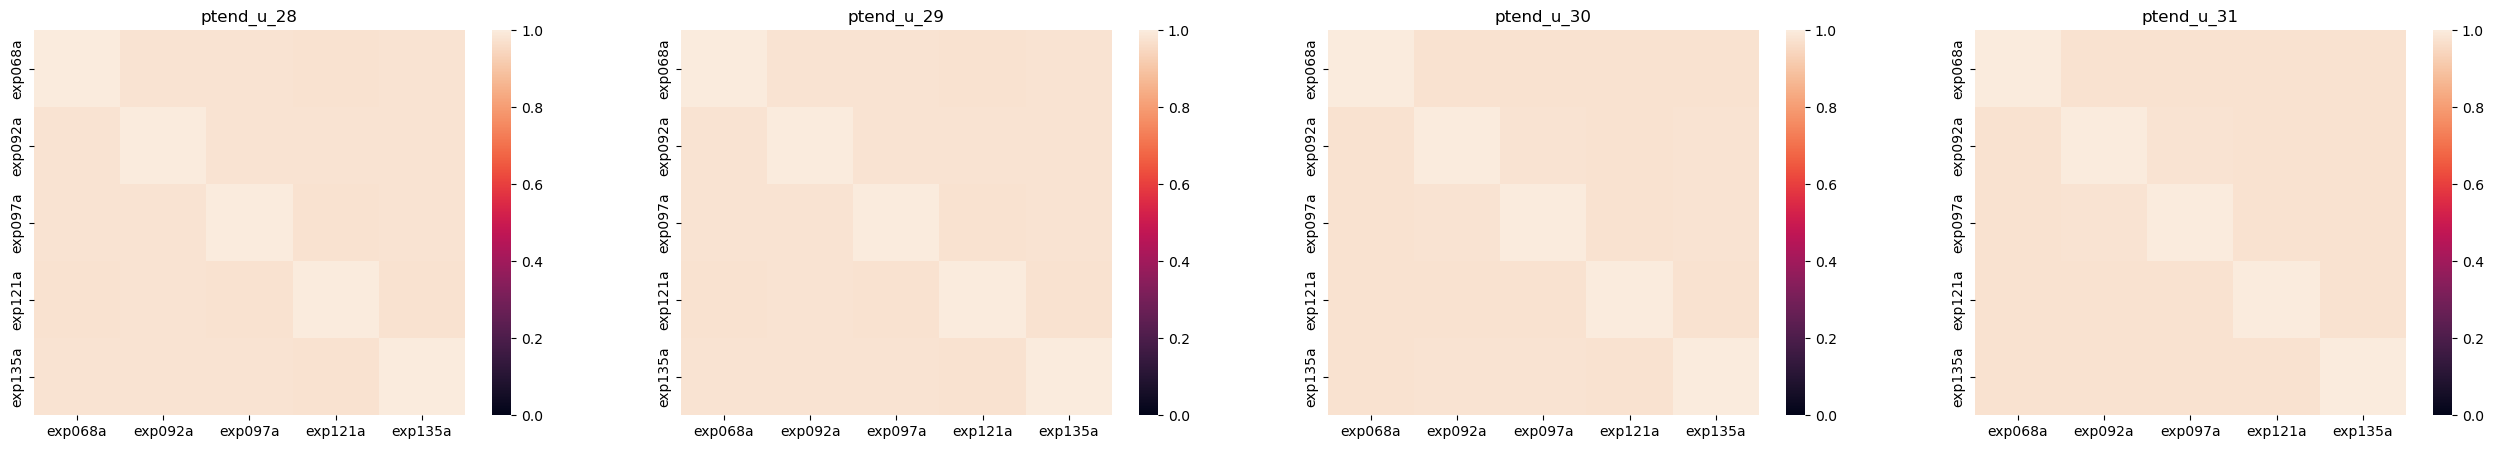

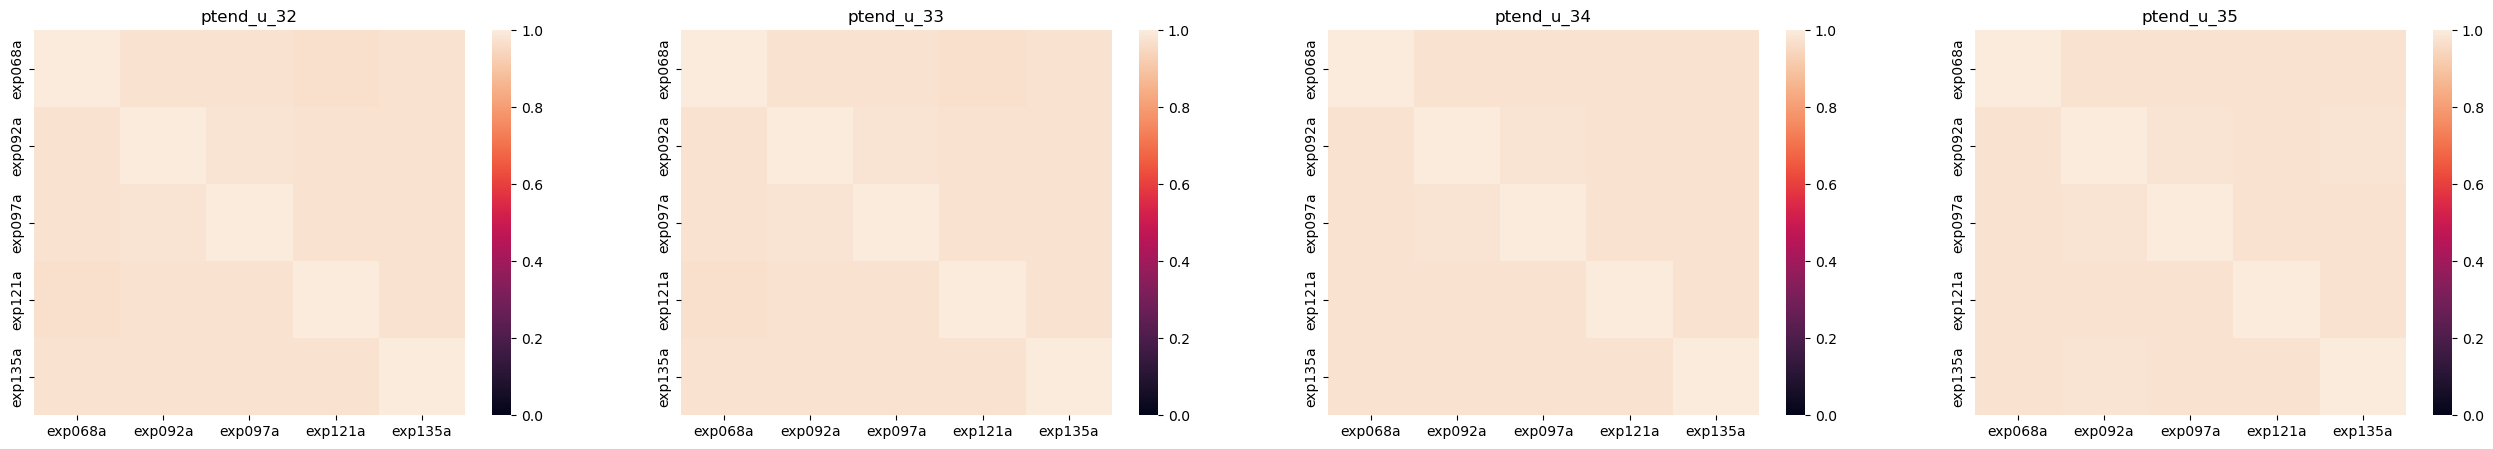

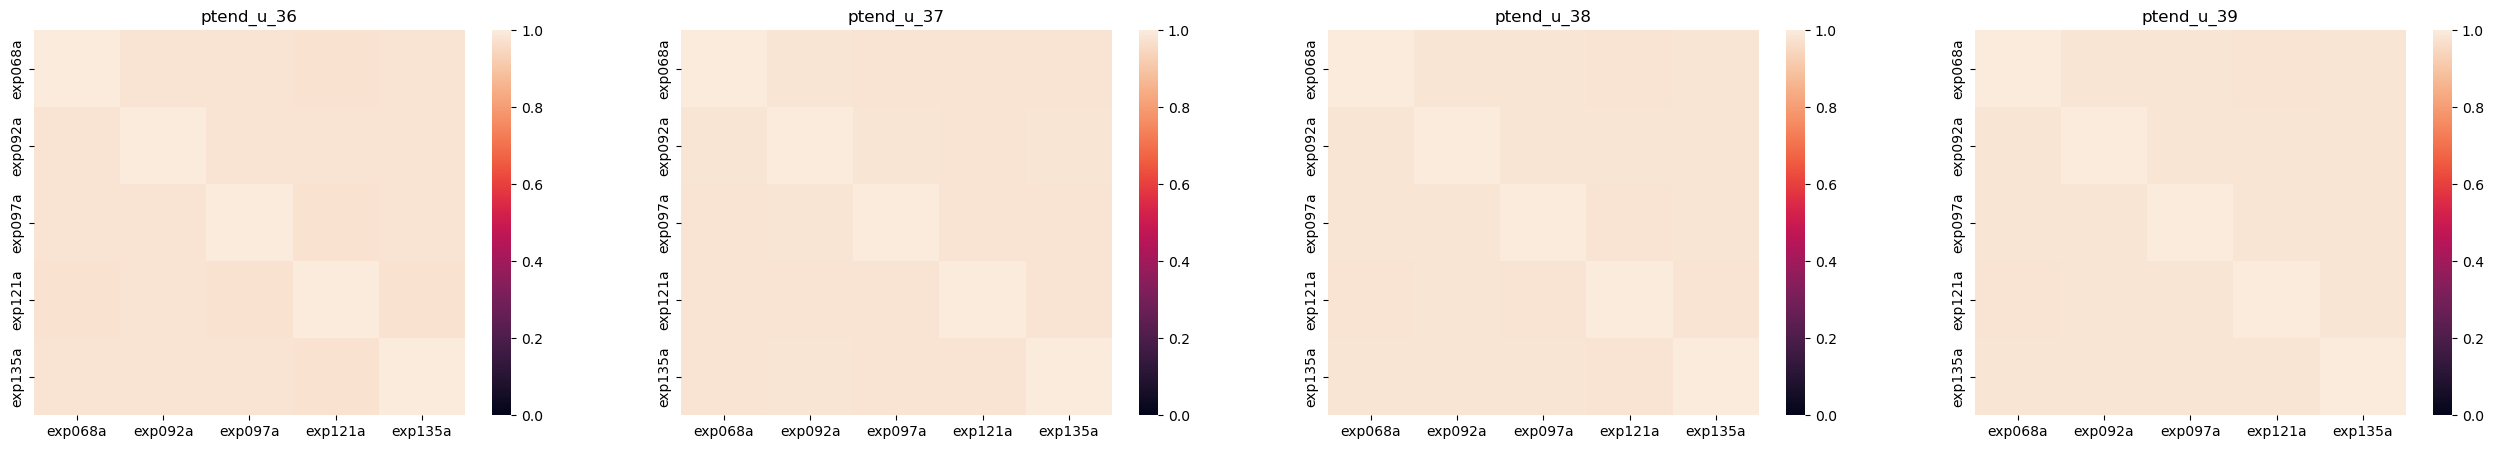

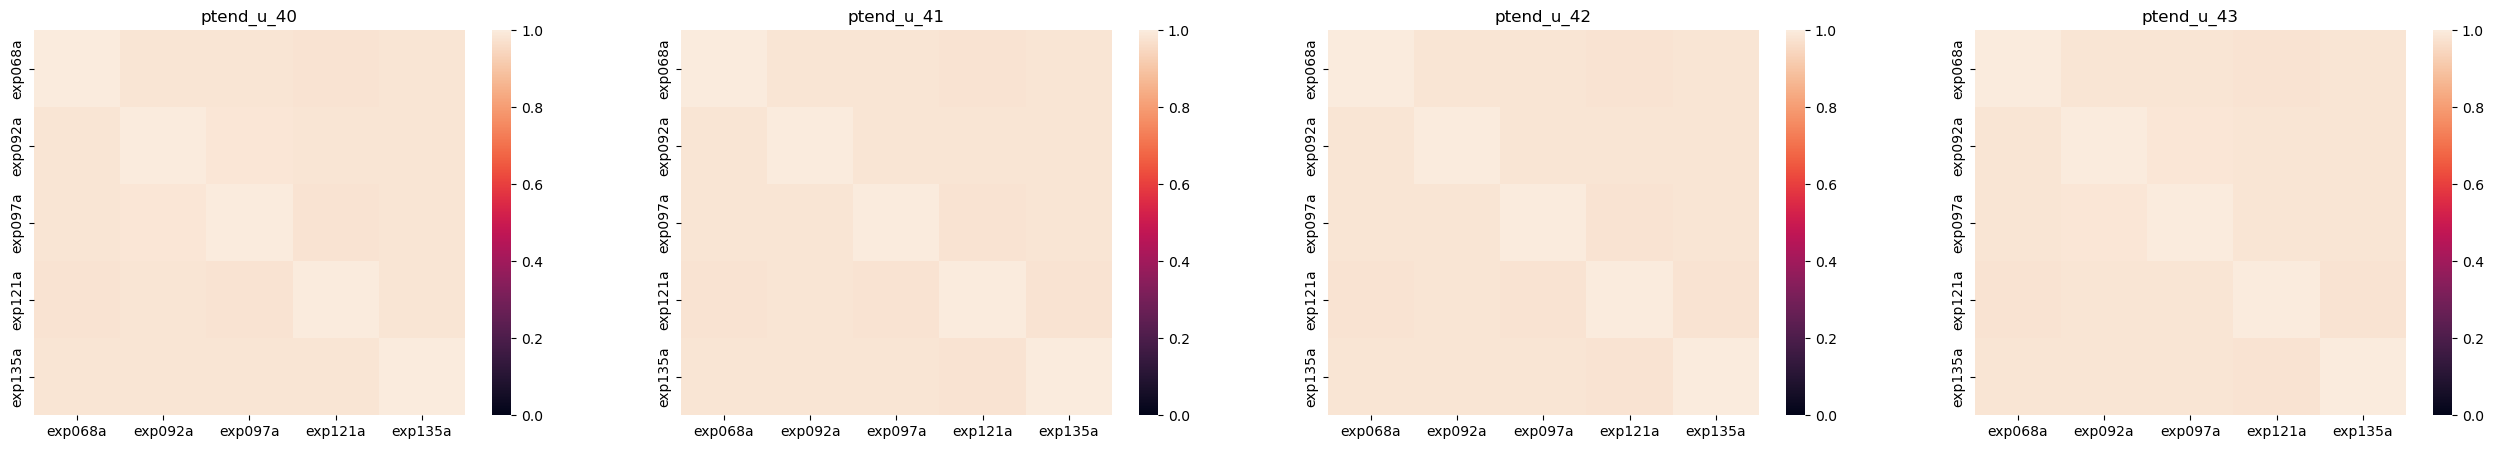

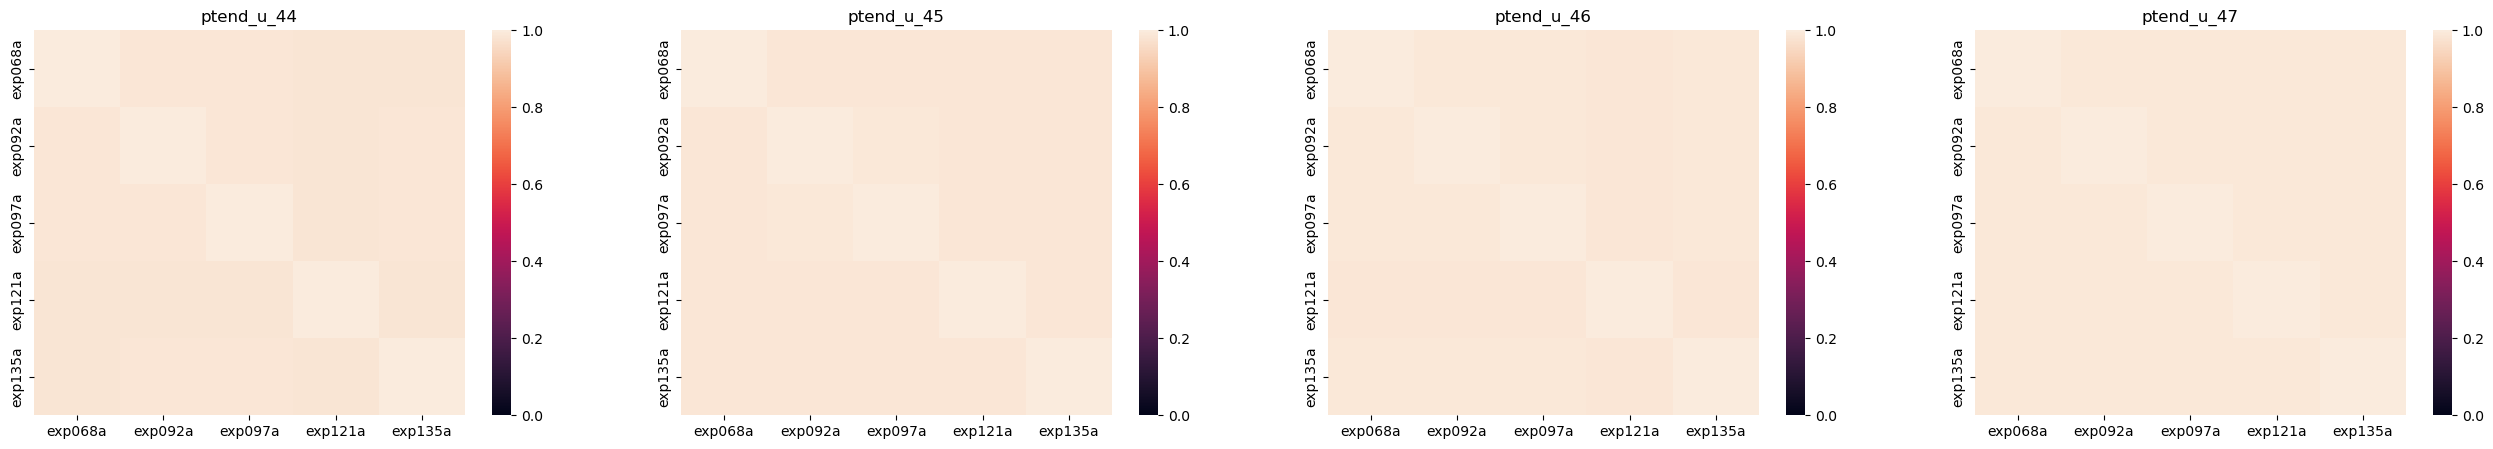

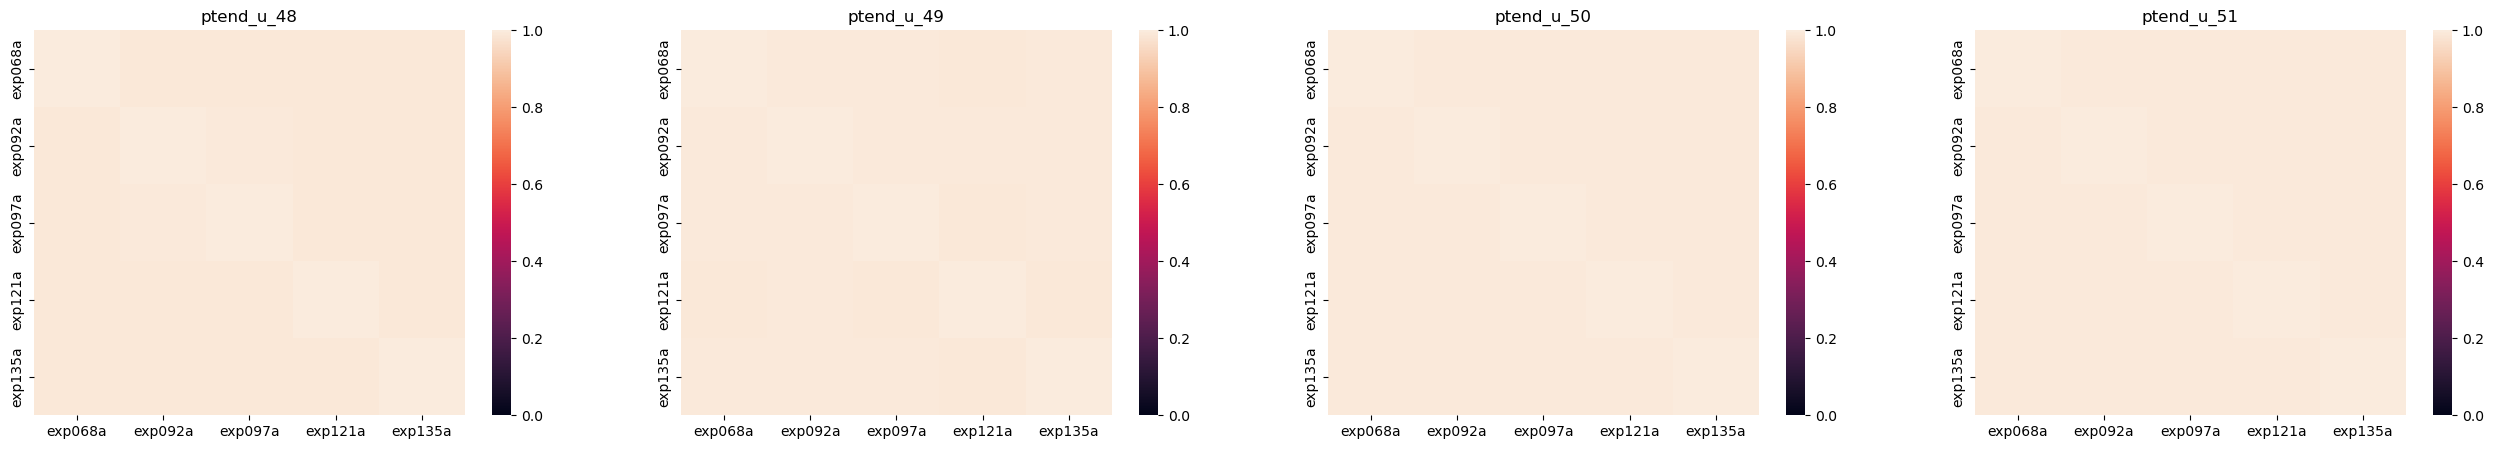

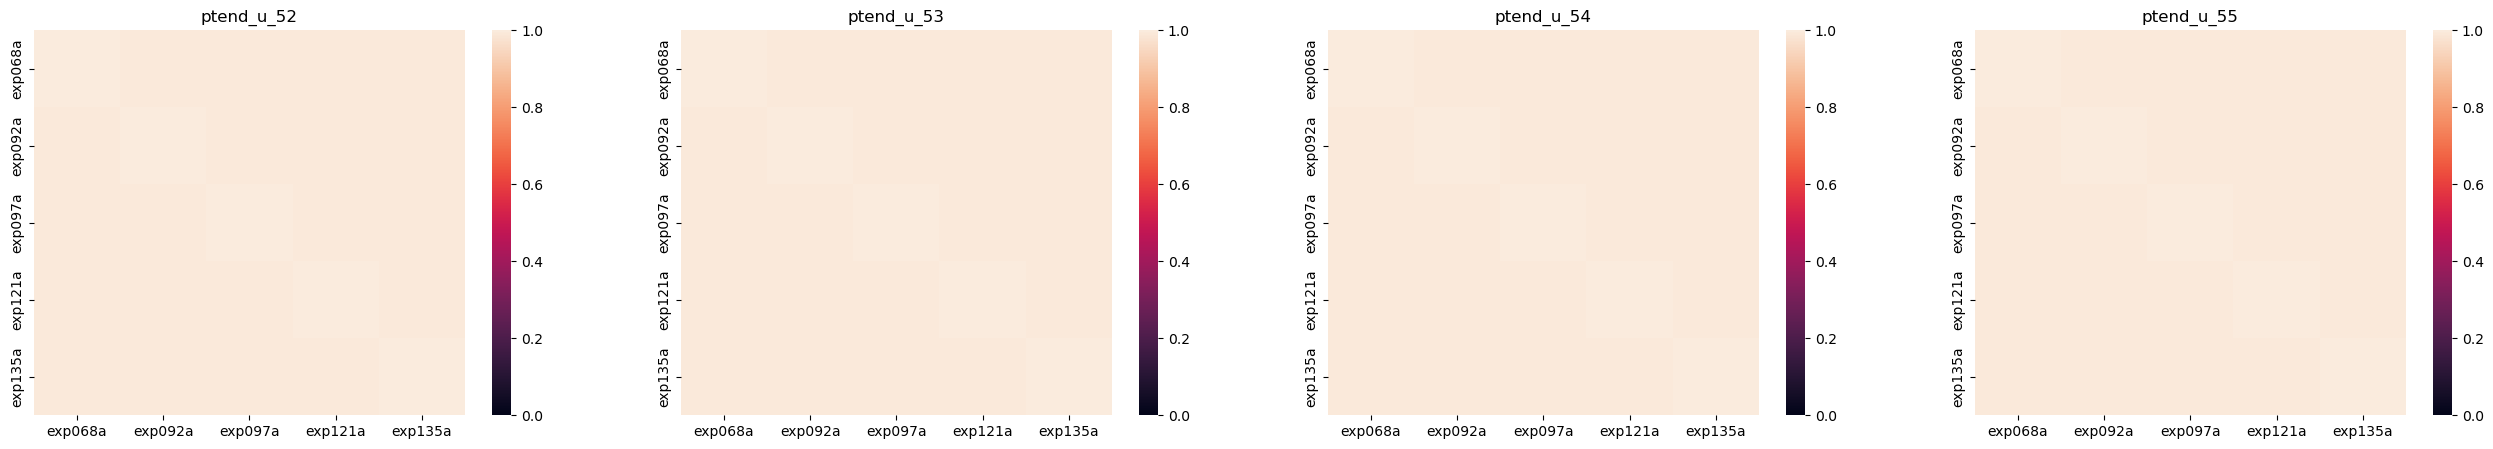

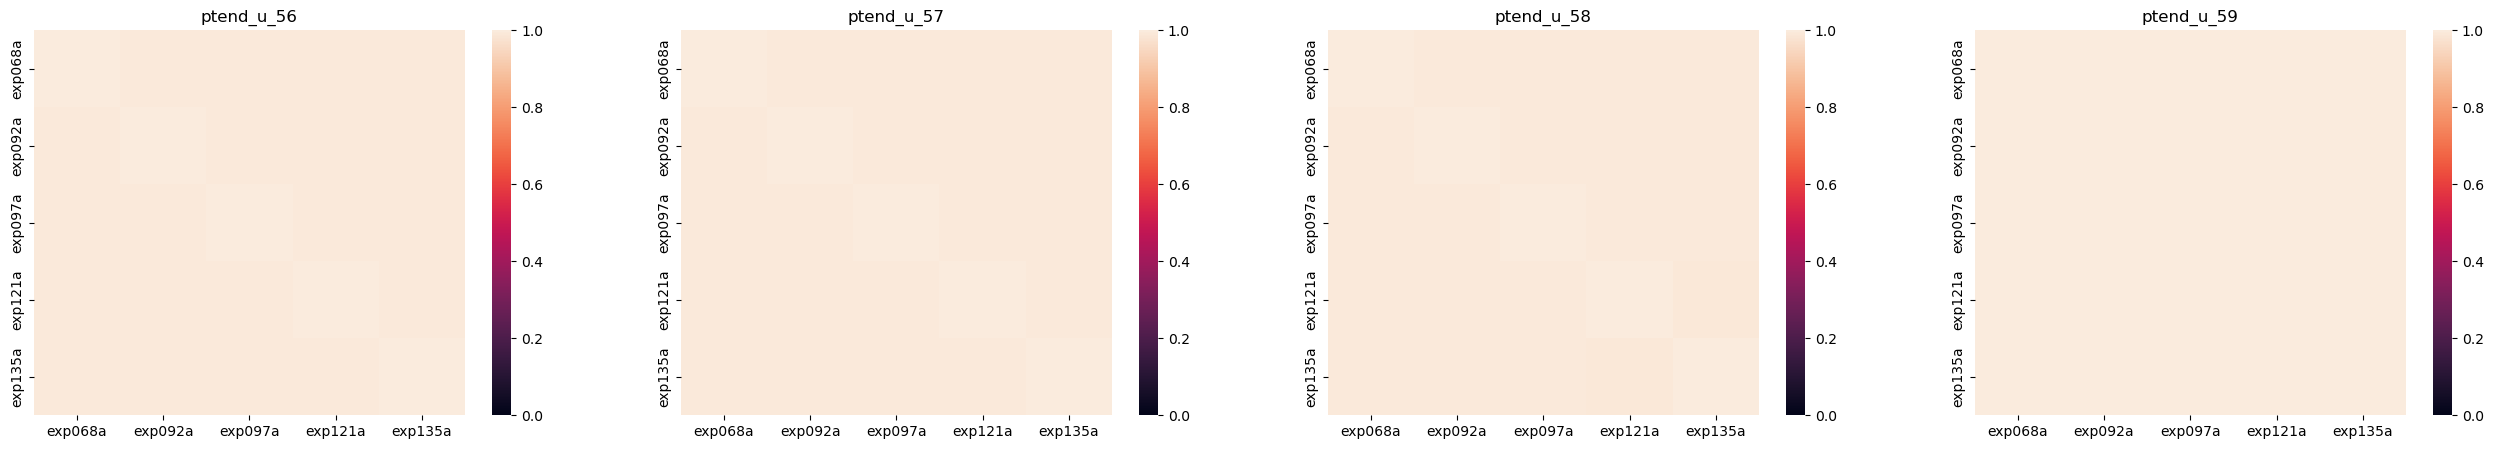

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


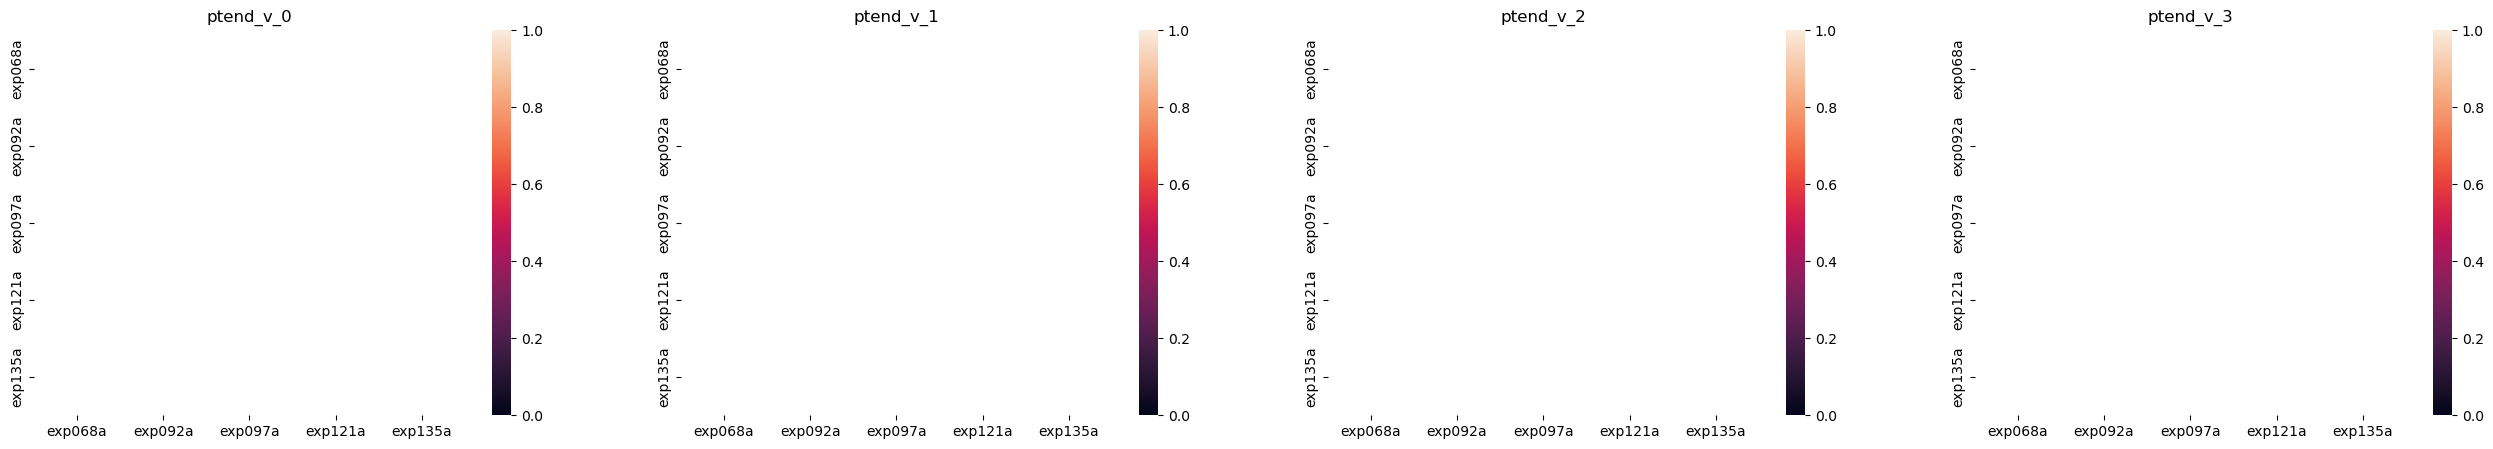

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


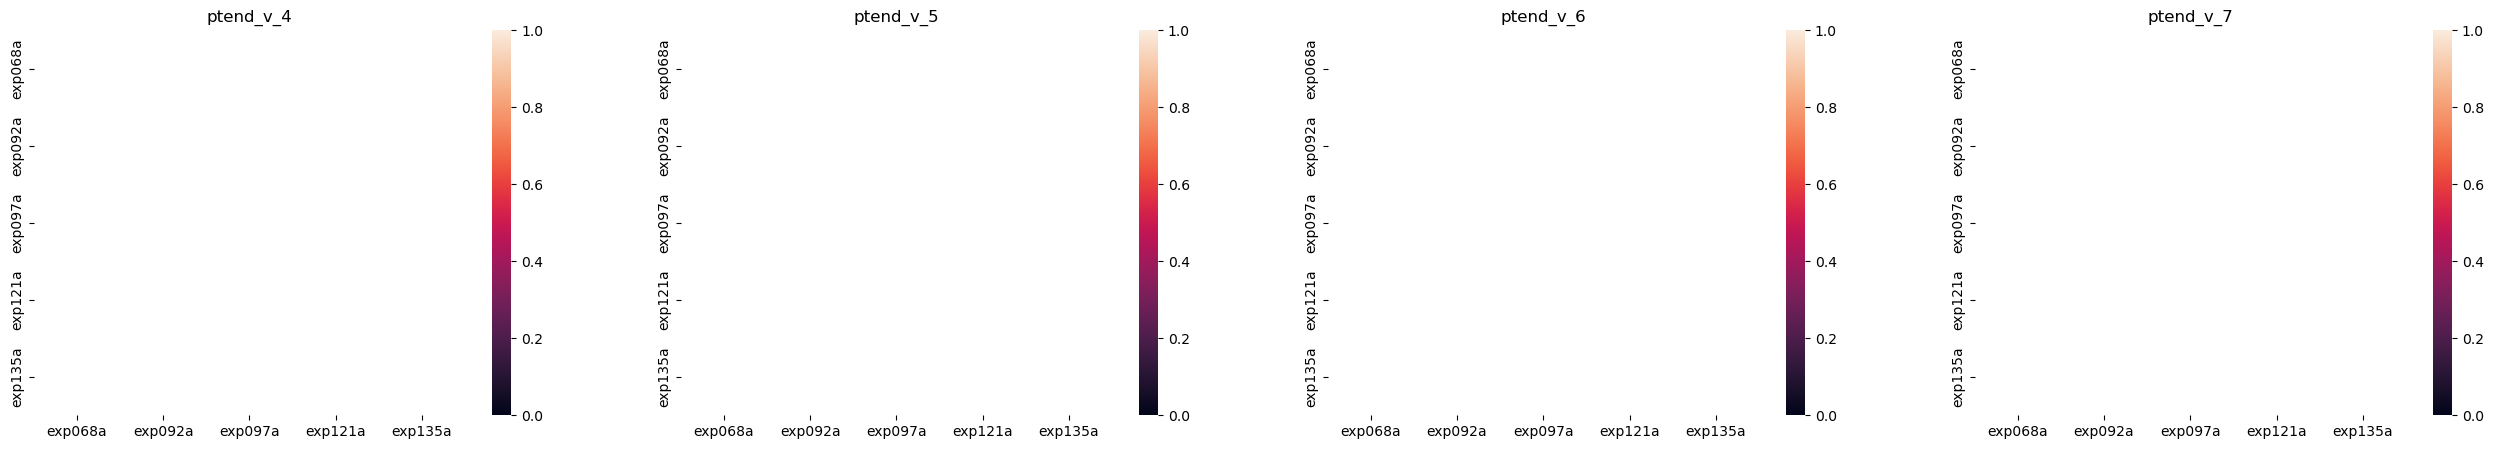

/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/mamba/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


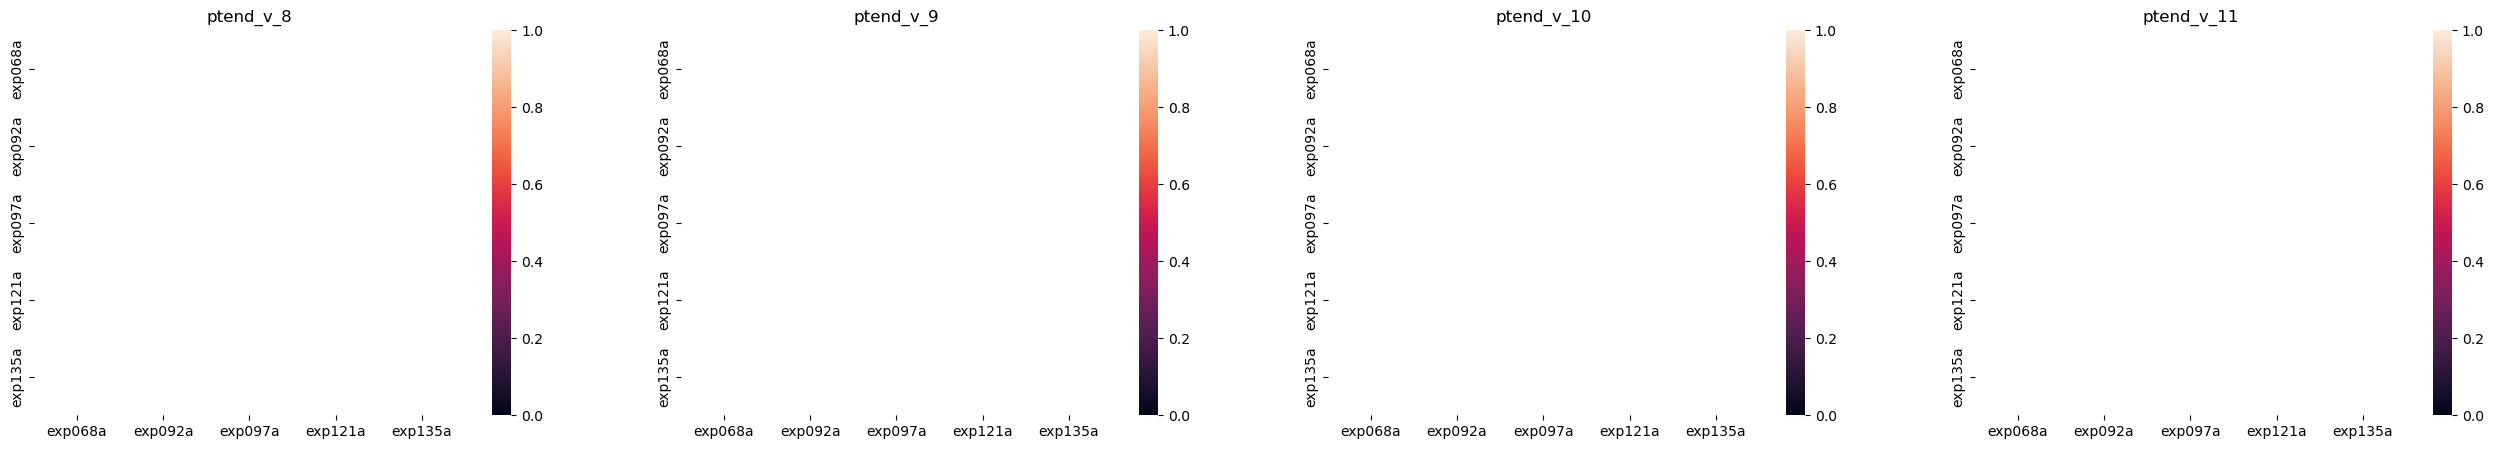

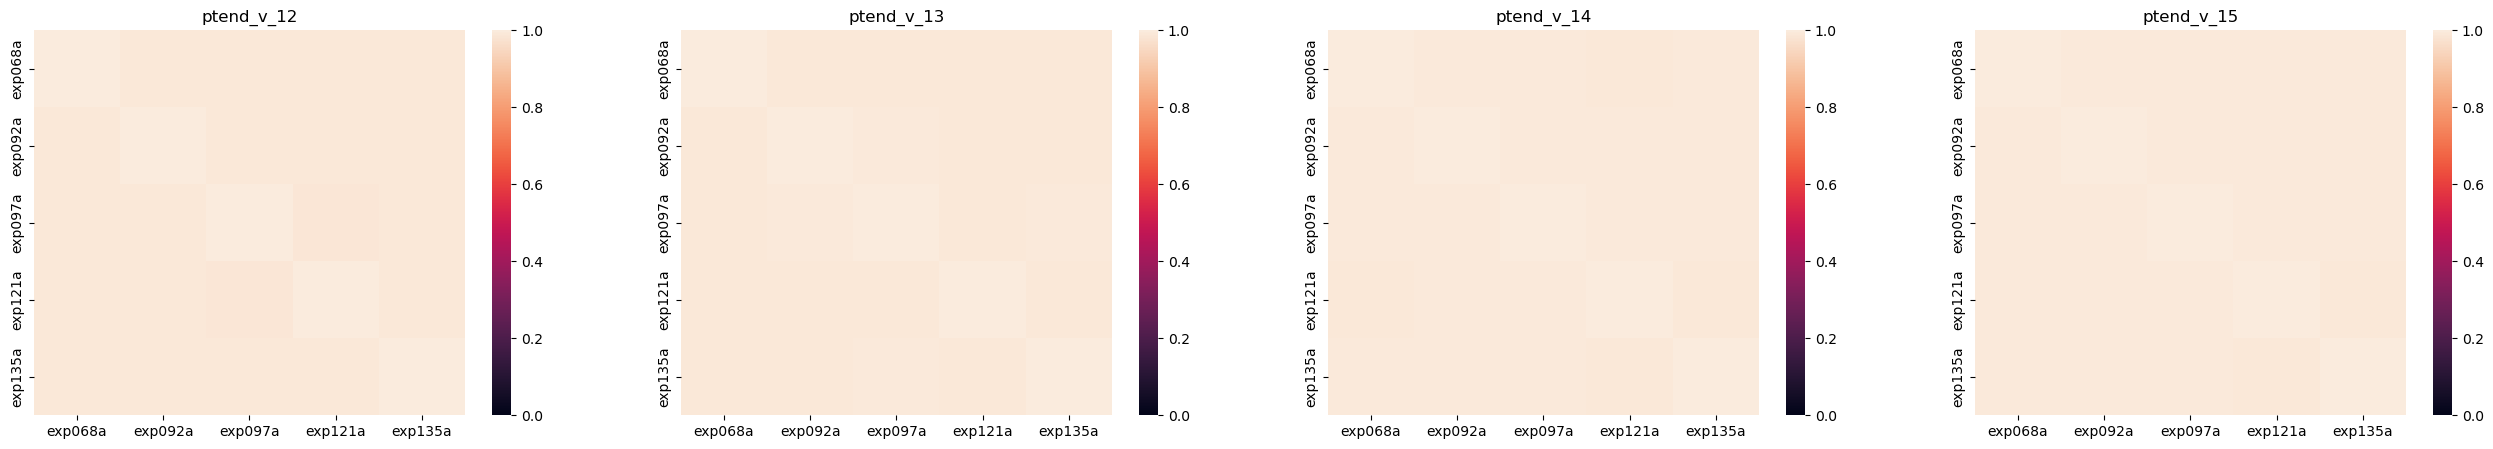

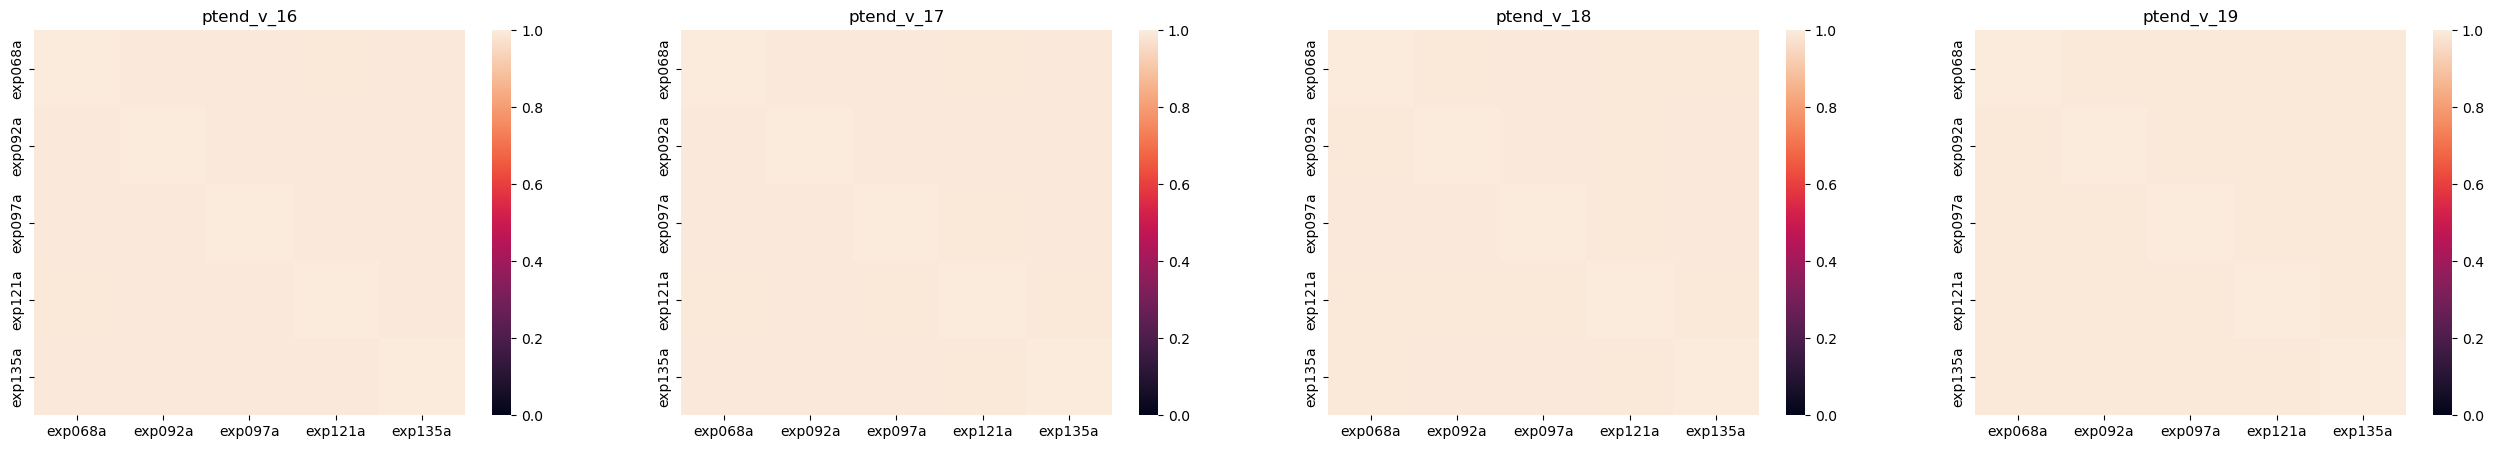

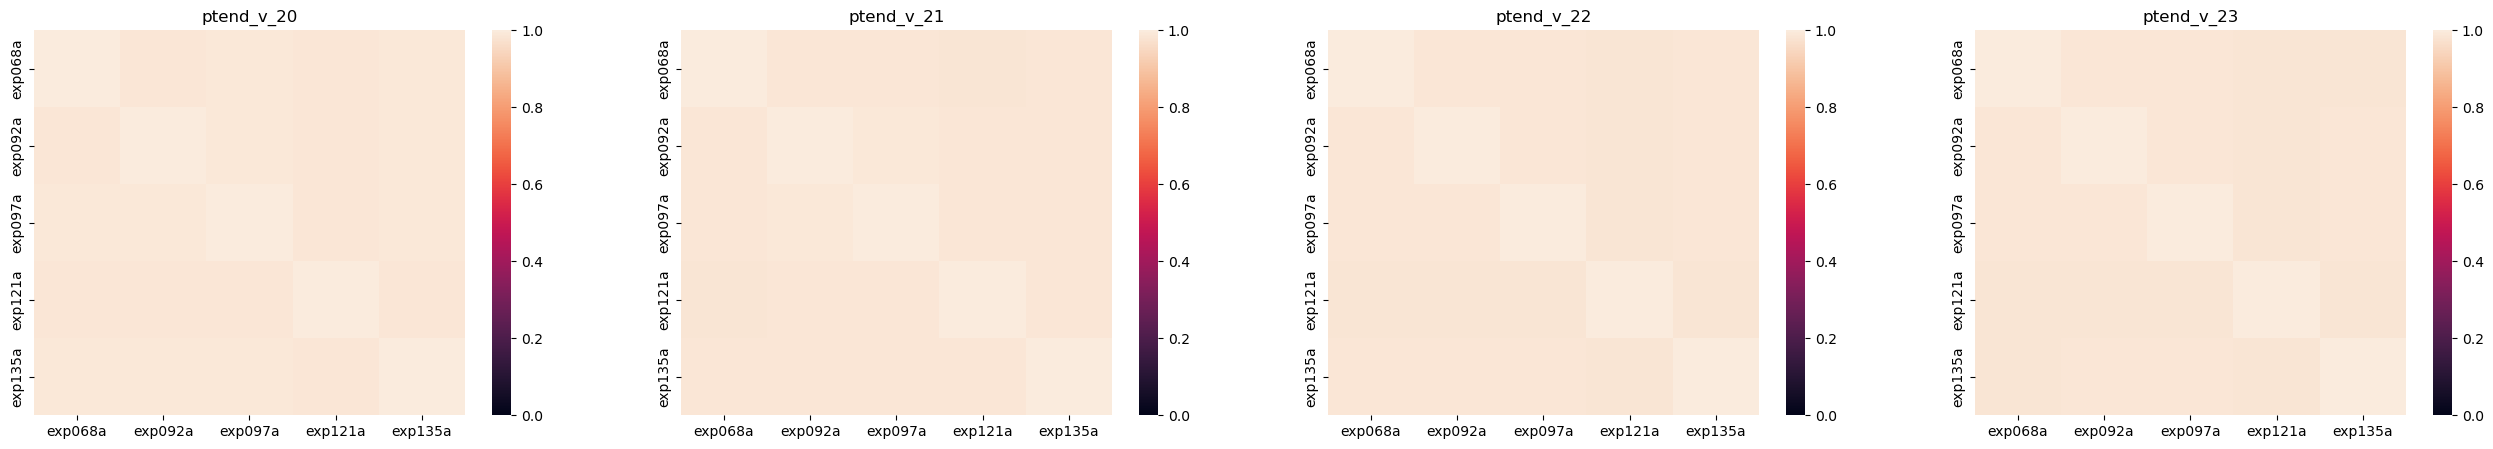

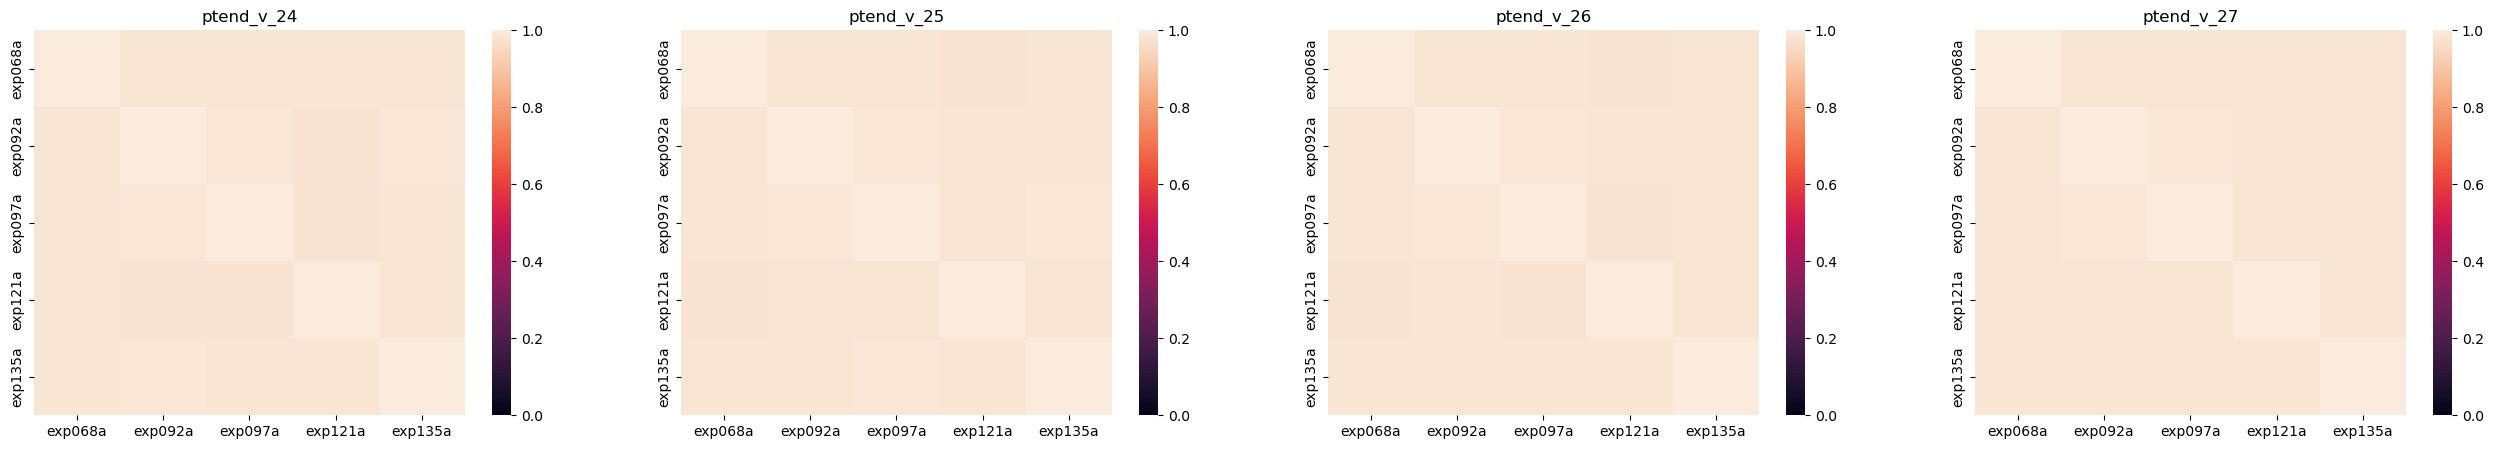

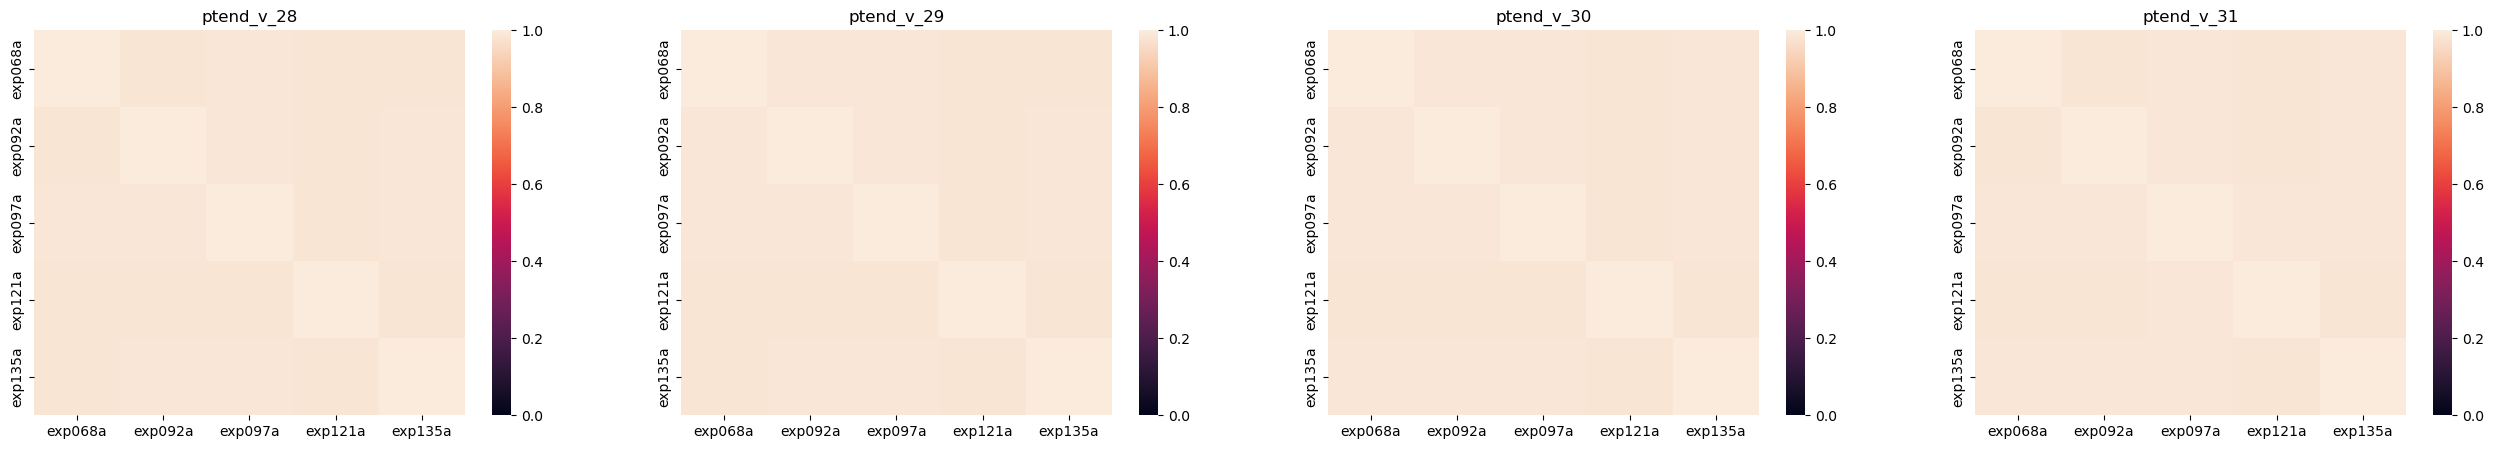

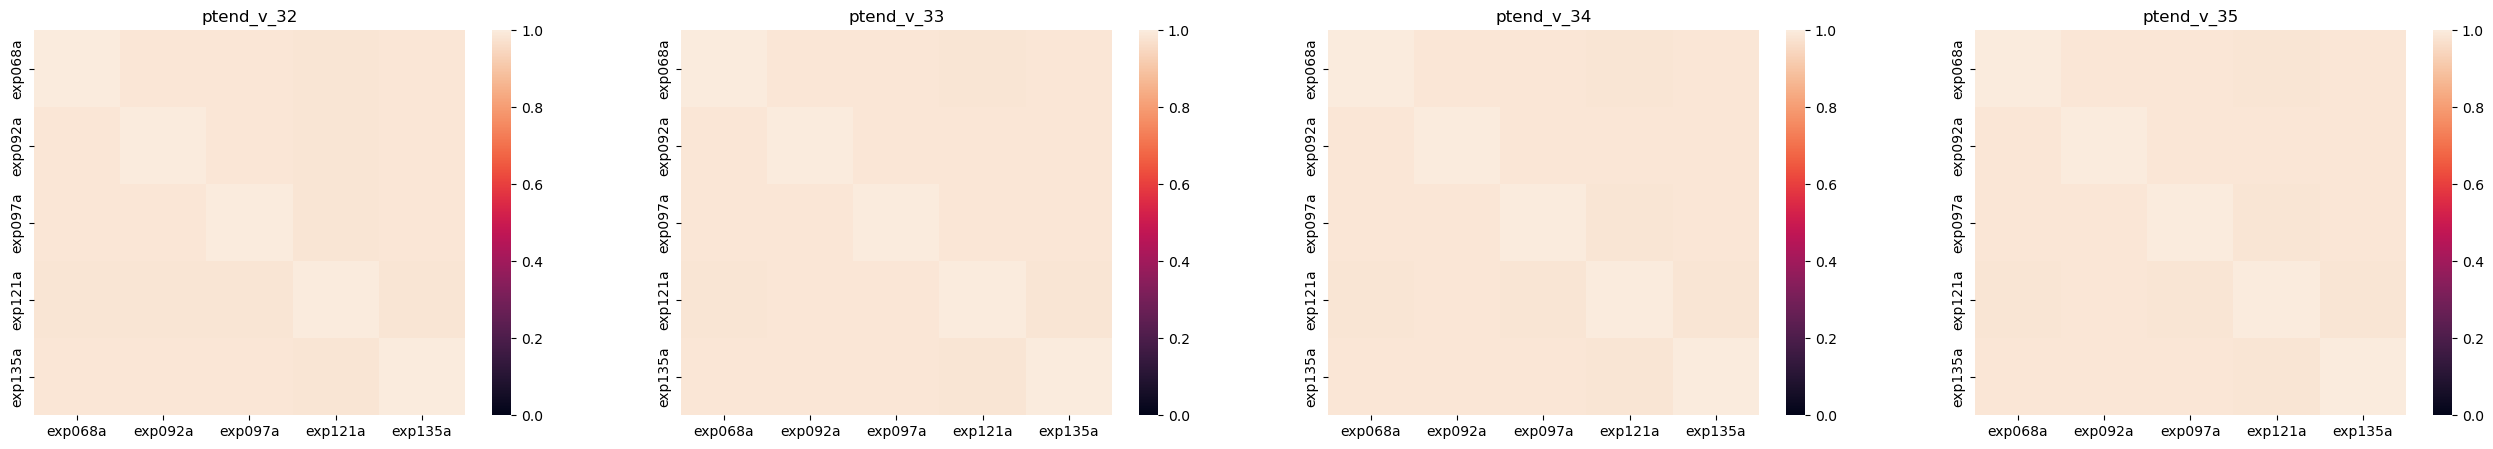

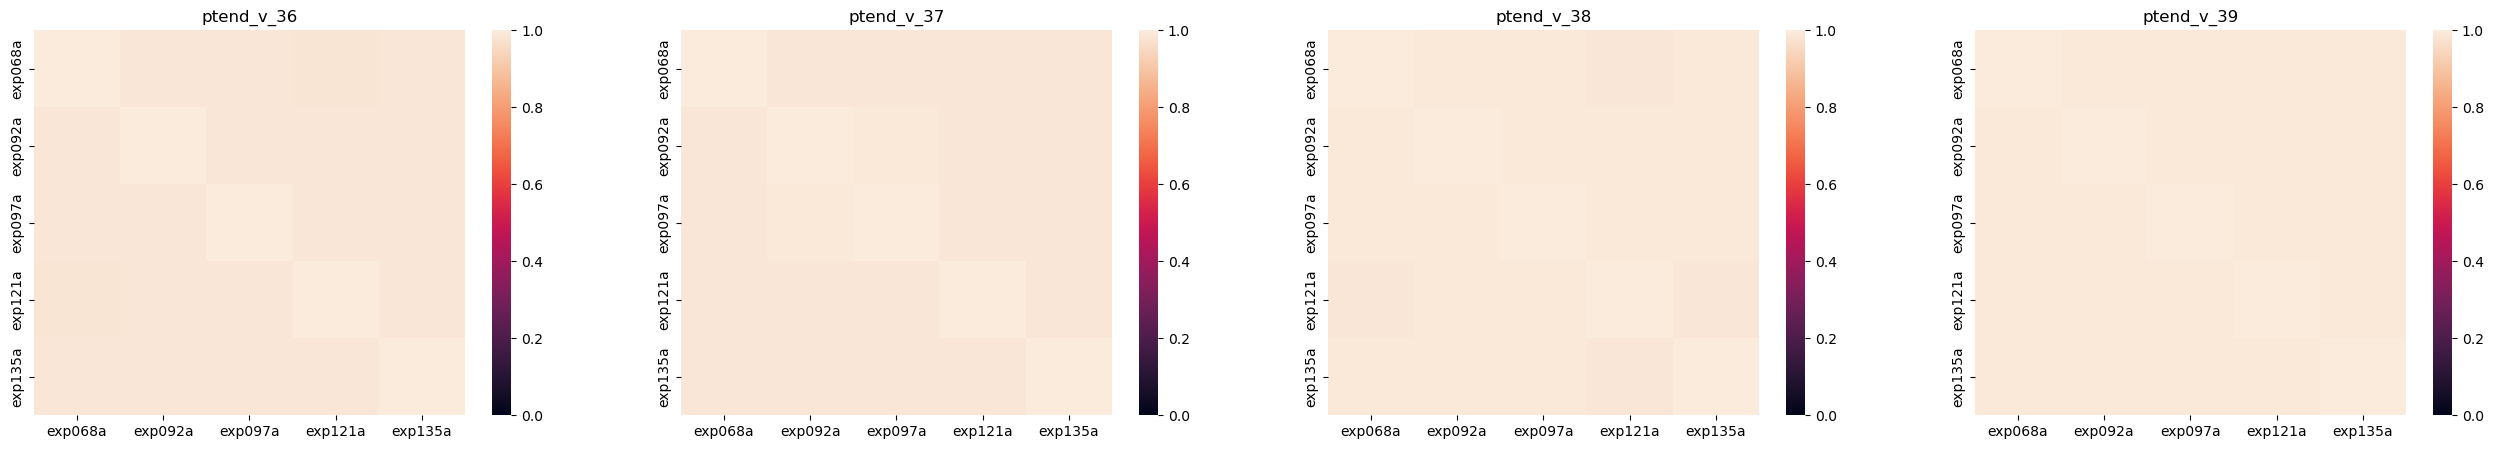

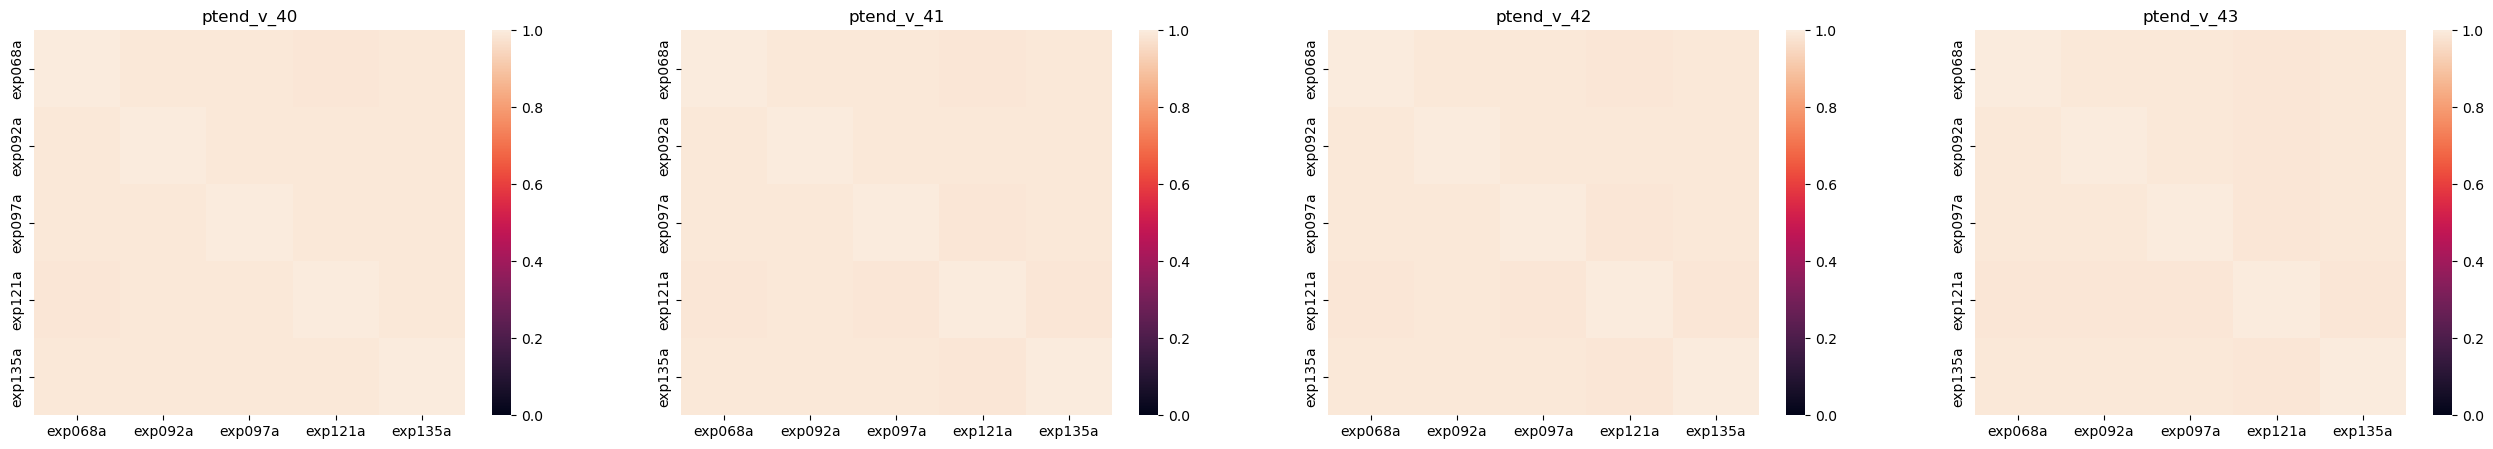

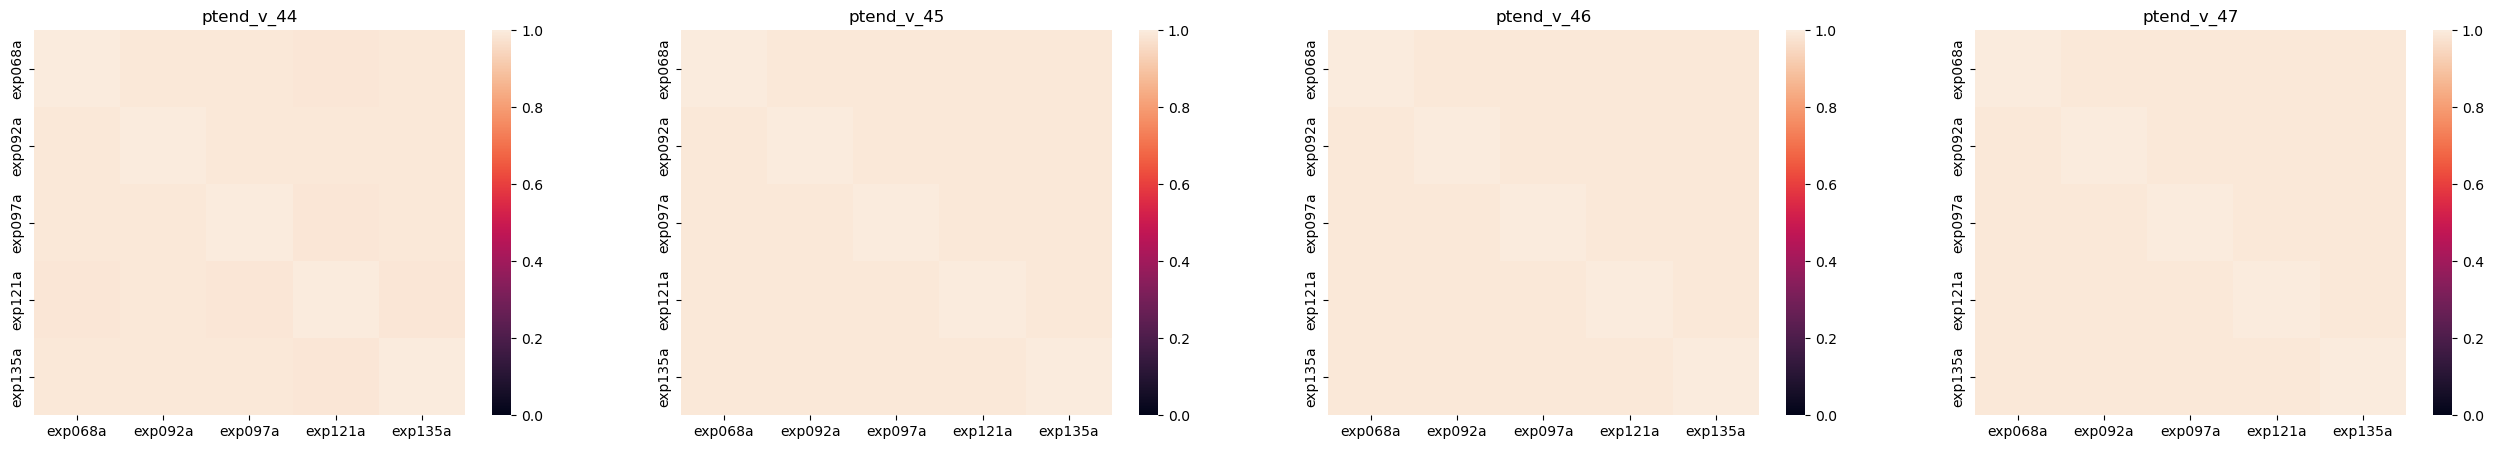

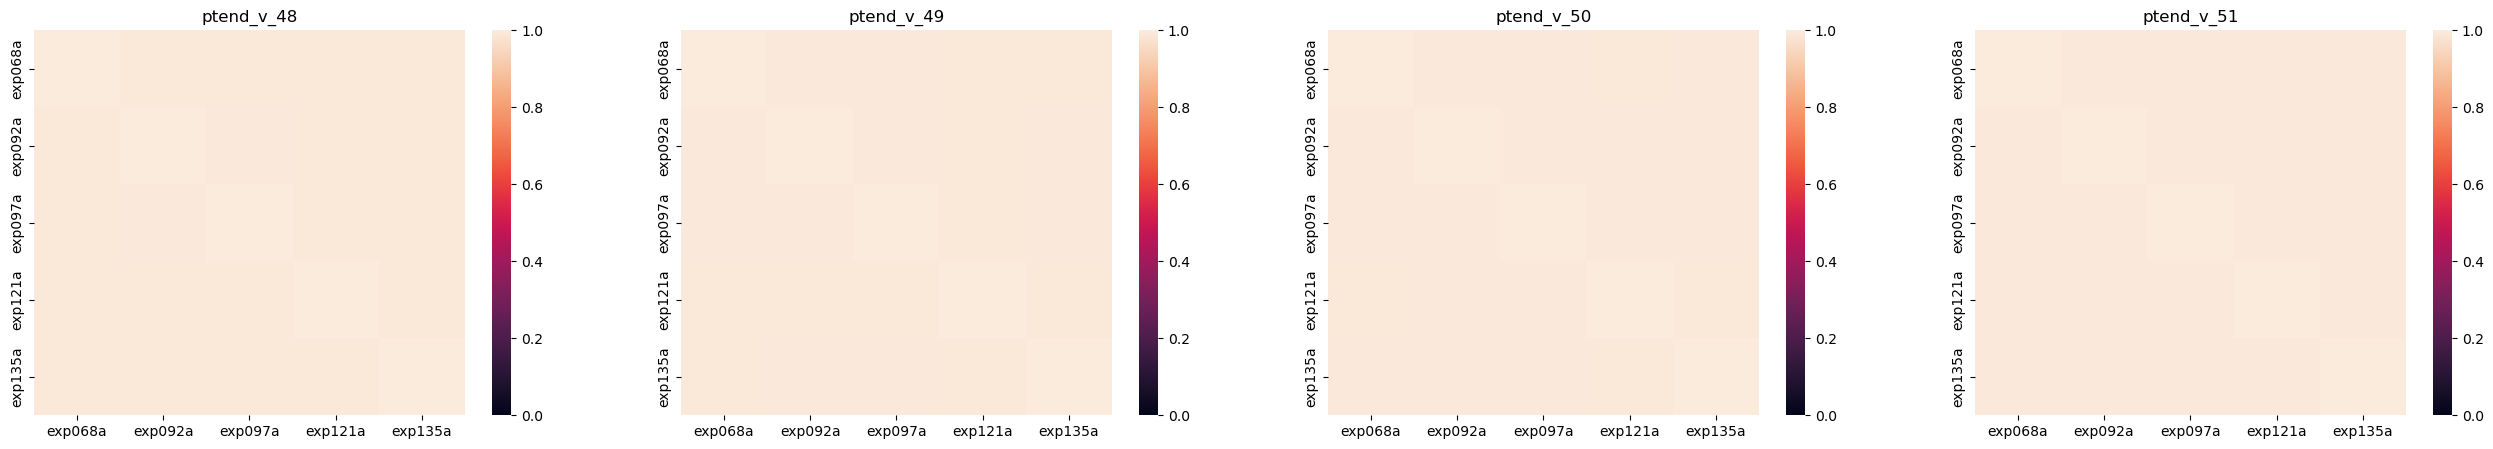

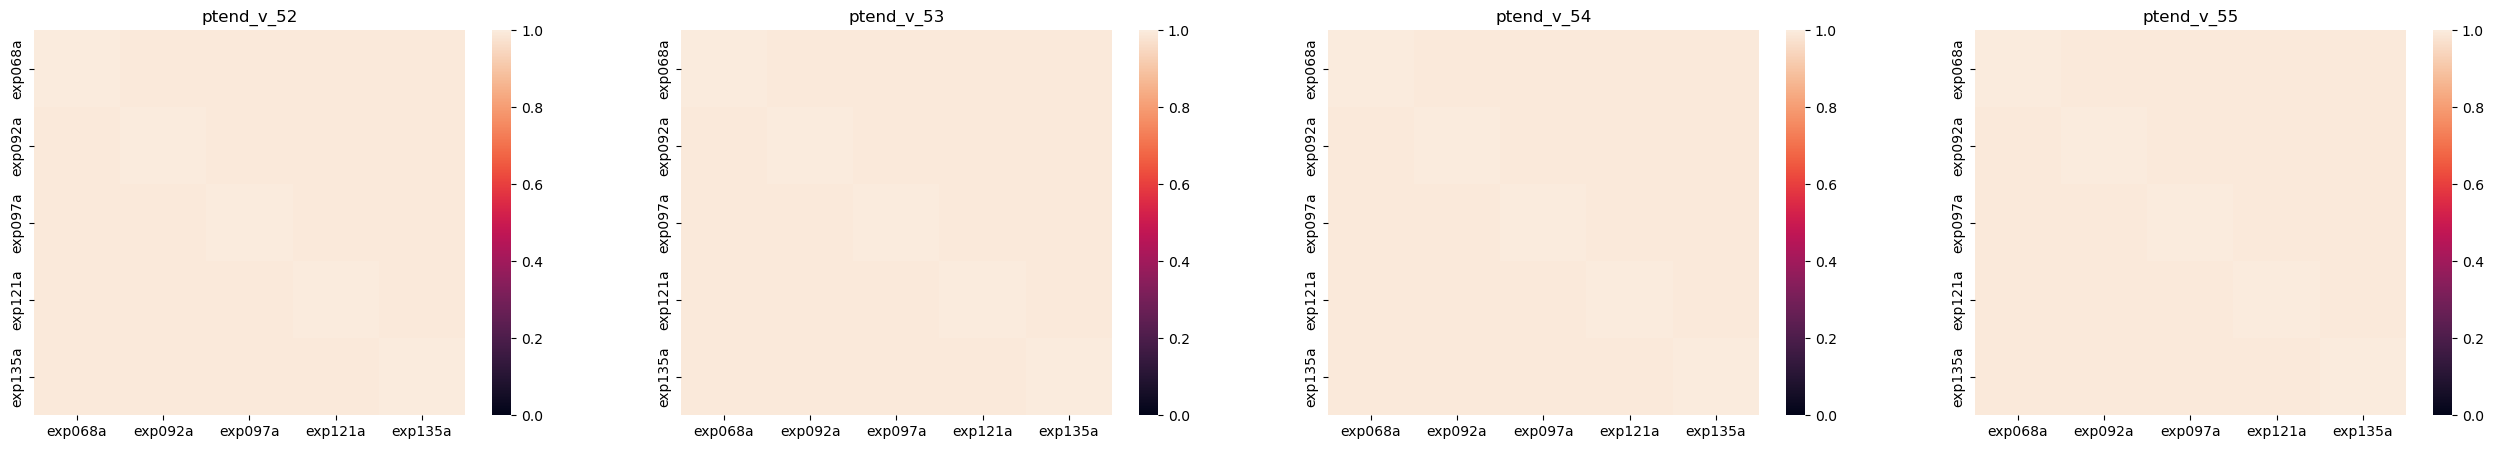

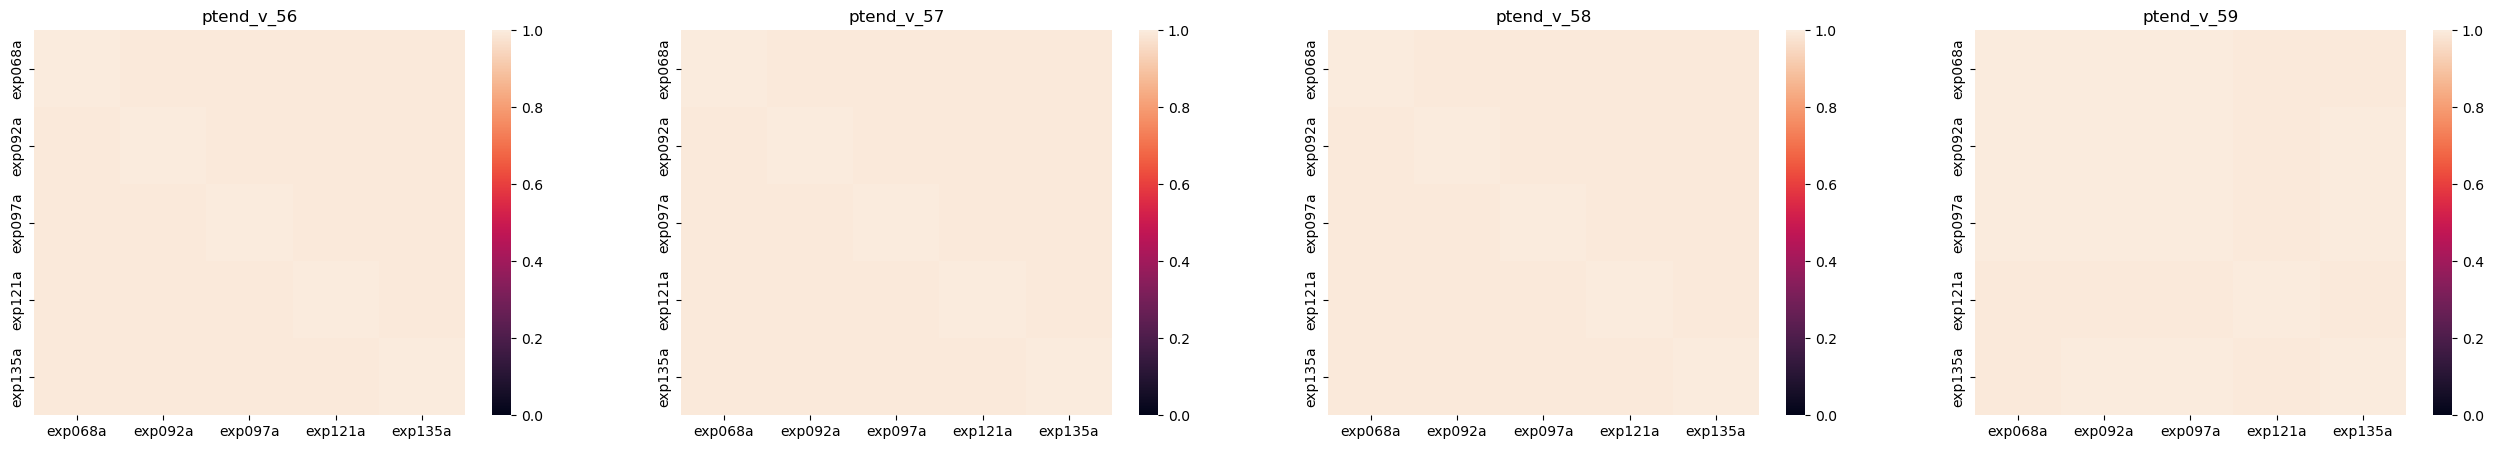

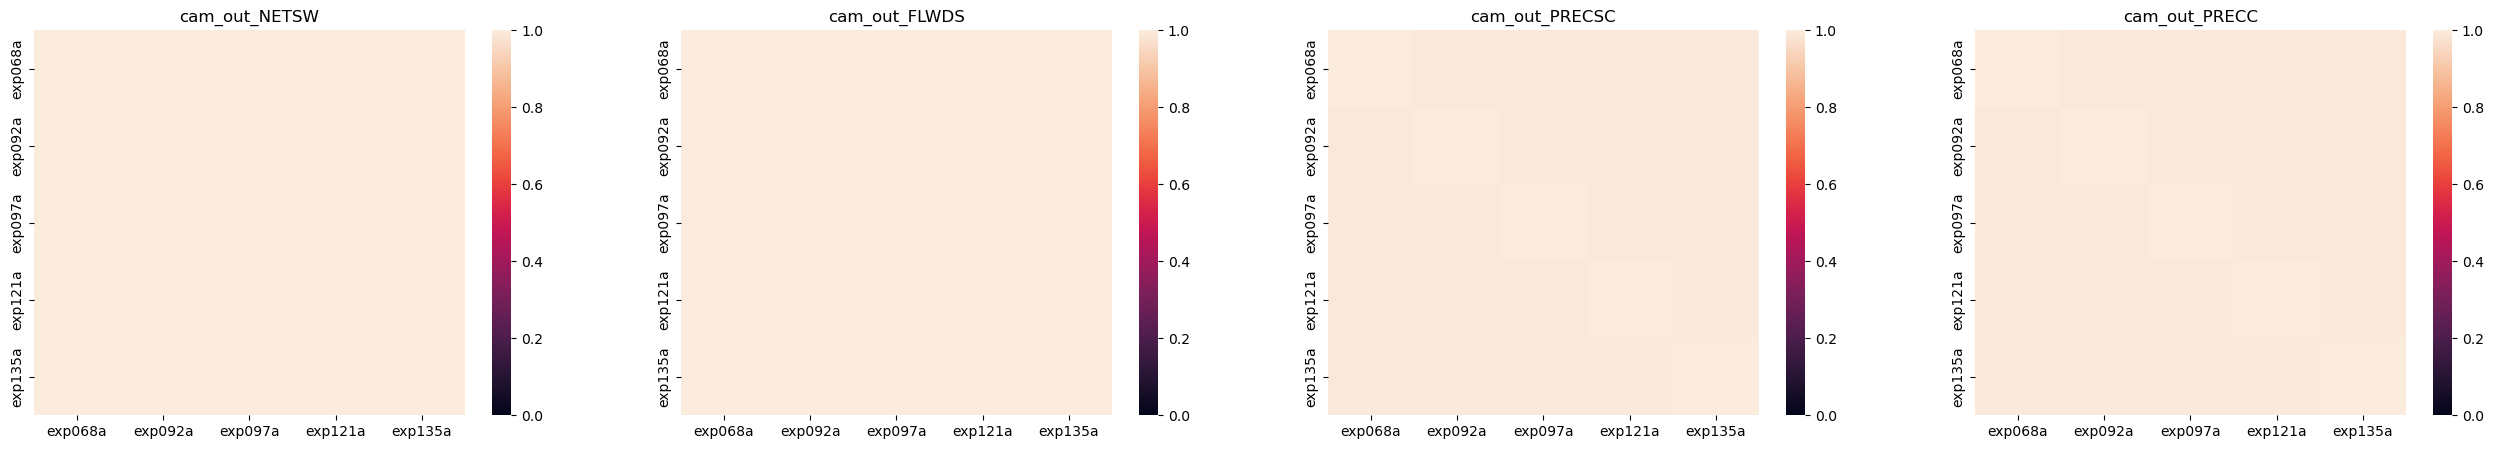

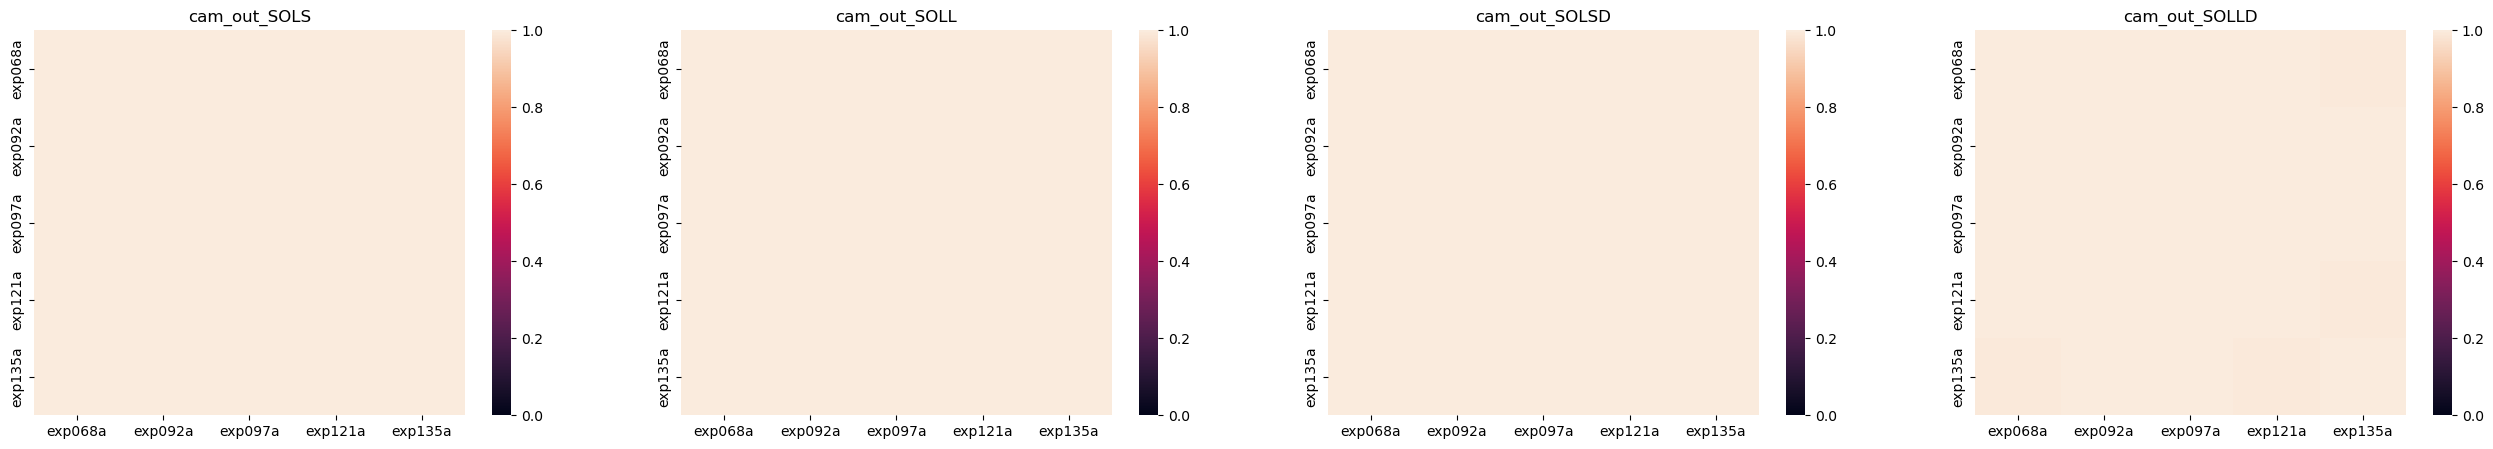

In [20]:
columns = dfs[0].columns[1:]
n_cols = 4
for i in range(0, len(columns), n_cols):
    sub_cols = columns[i:i+n_cols]
    fig = plt.figure(figsize=(8*n_cols, 5))
    for j, col in enumerate(sub_cols):
        sub_df = pl.concat(
            [
                dfs[k].select(pl.col(col).alias(f"{col}_{k}"))
                for k in range(len(dfs))
            ],
            how="horizontal",
        )
        corr = np.corrcoef(sub_df.to_numpy().T)
        ax = fig.add_subplot(1, n_cols, j+1)
        sns.heatmap(corr, xticklabels=tags, yticklabels=tags, vmin=0, vmax=1, ax=ax)
        ax.set_title(col)
    plt.show()